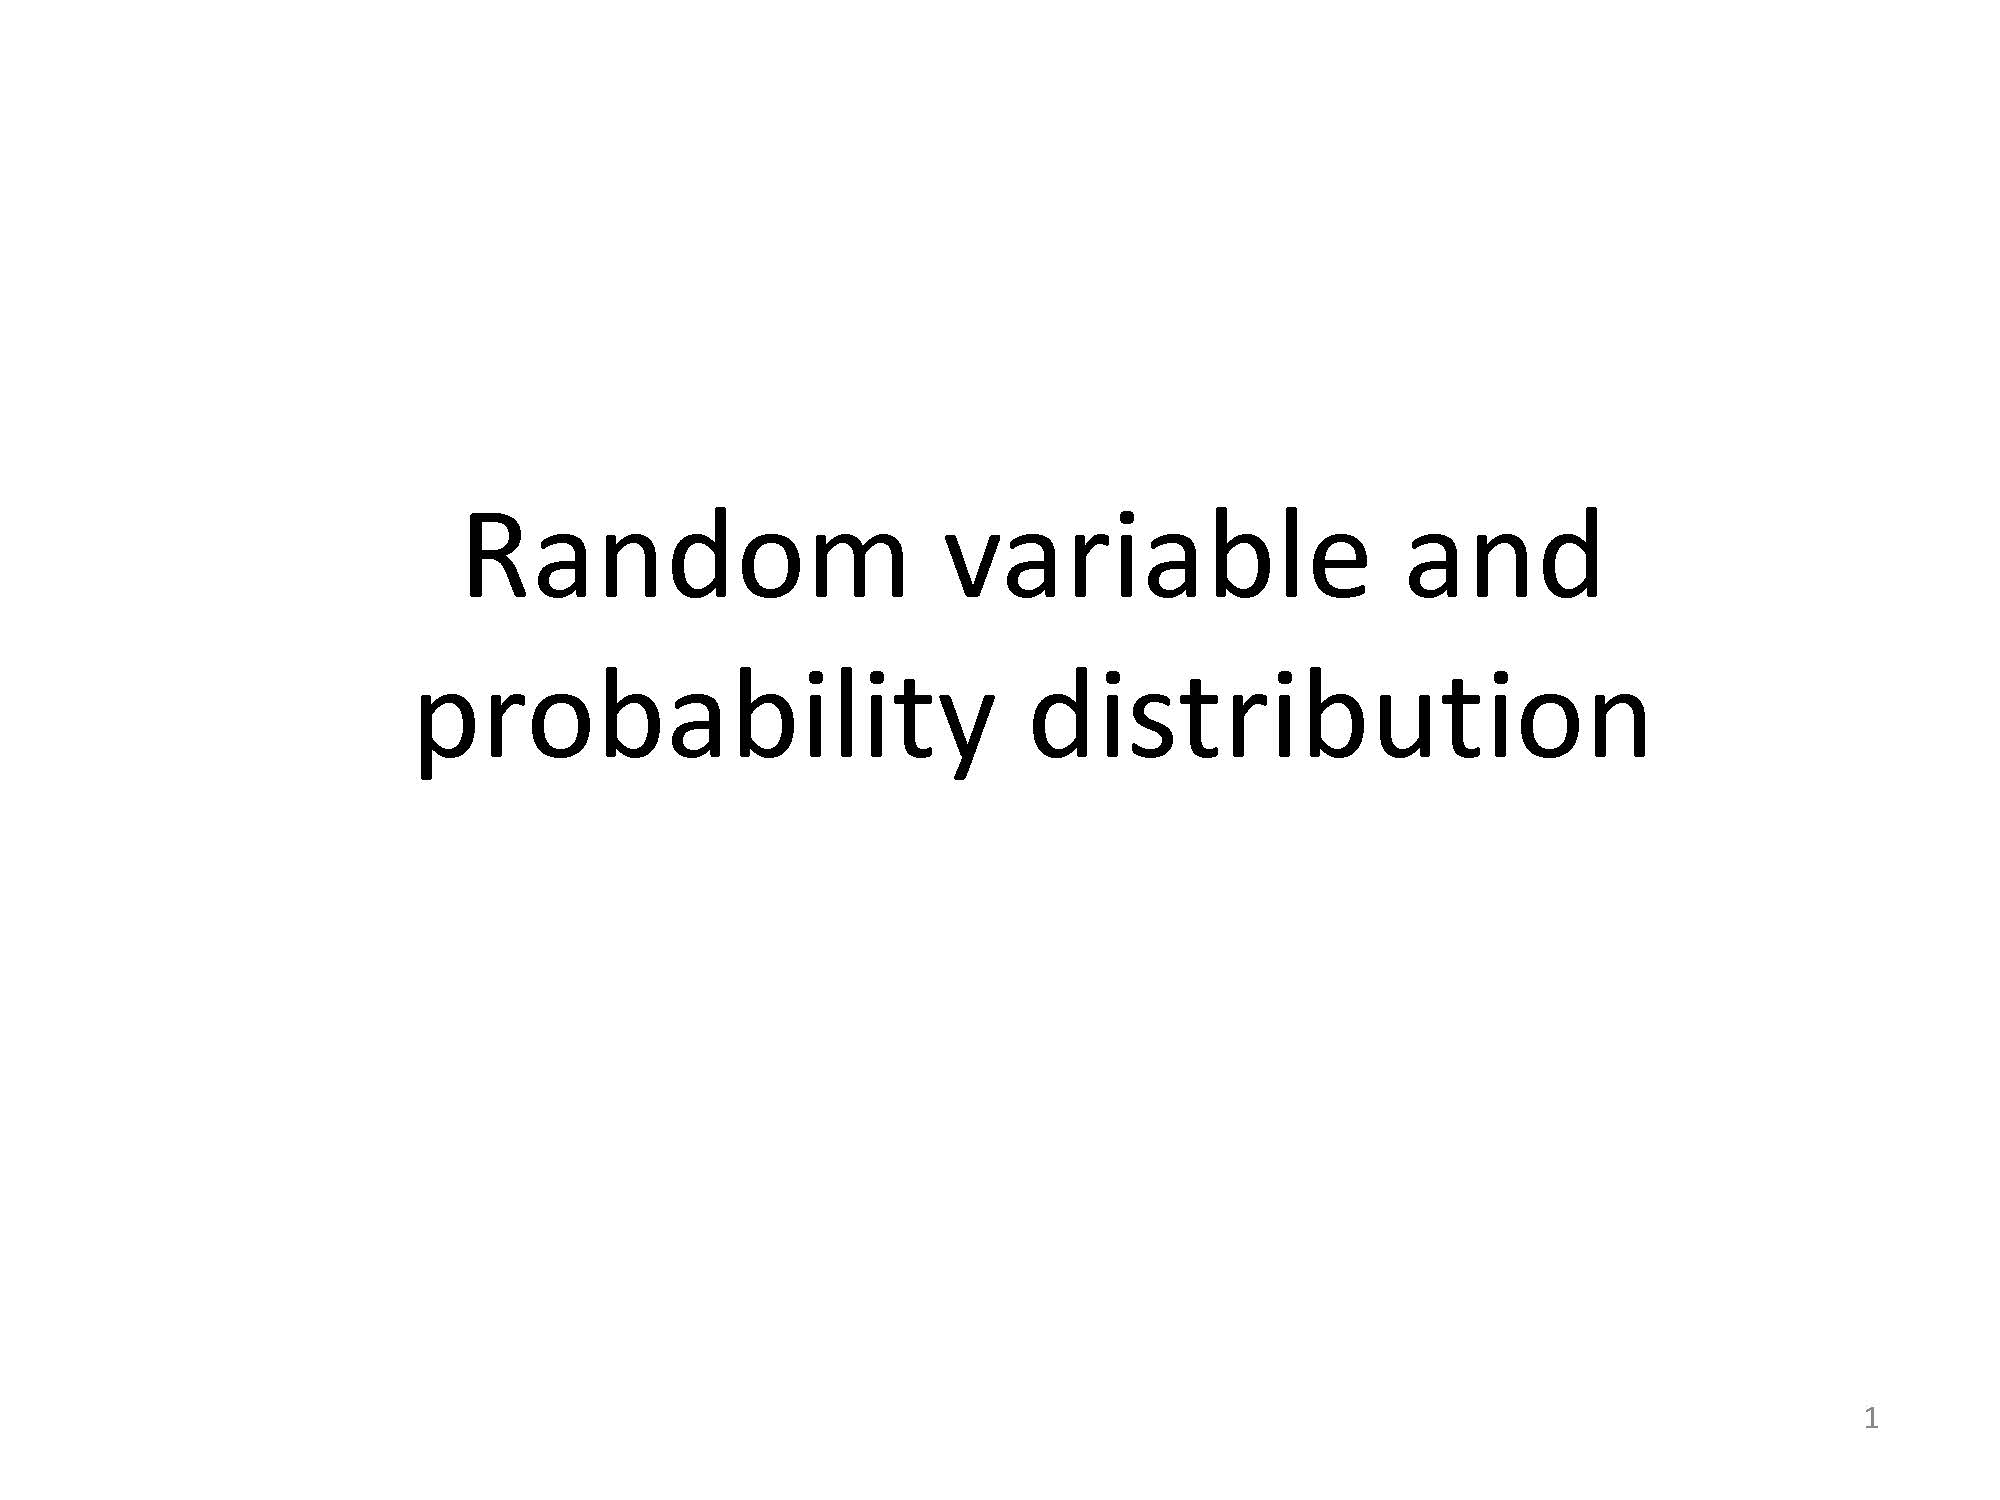
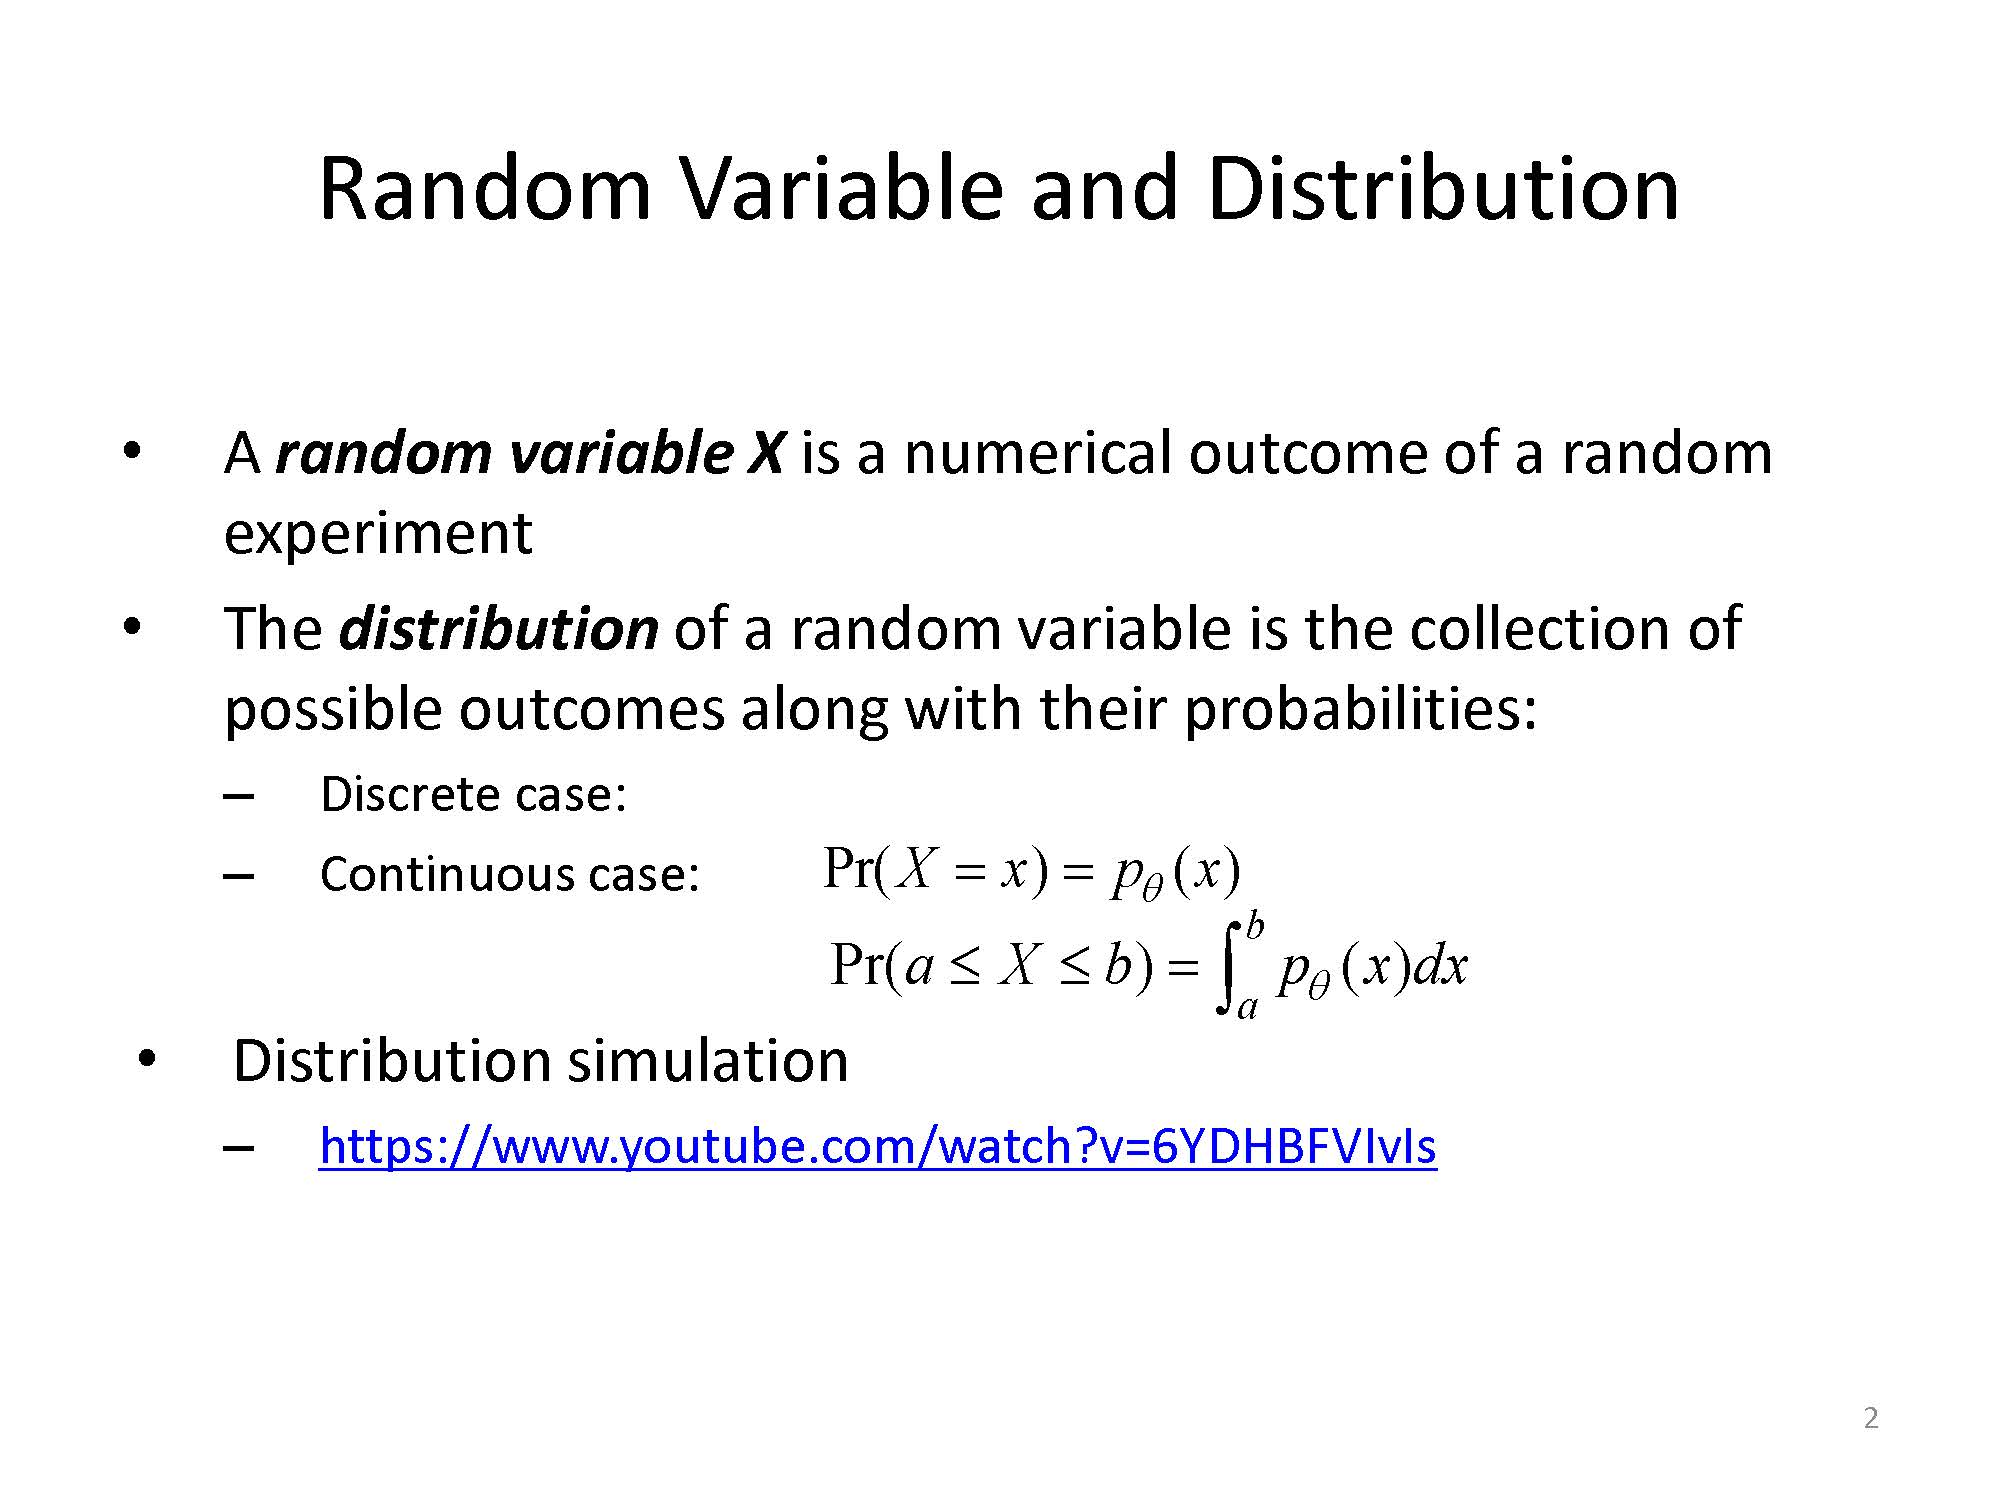
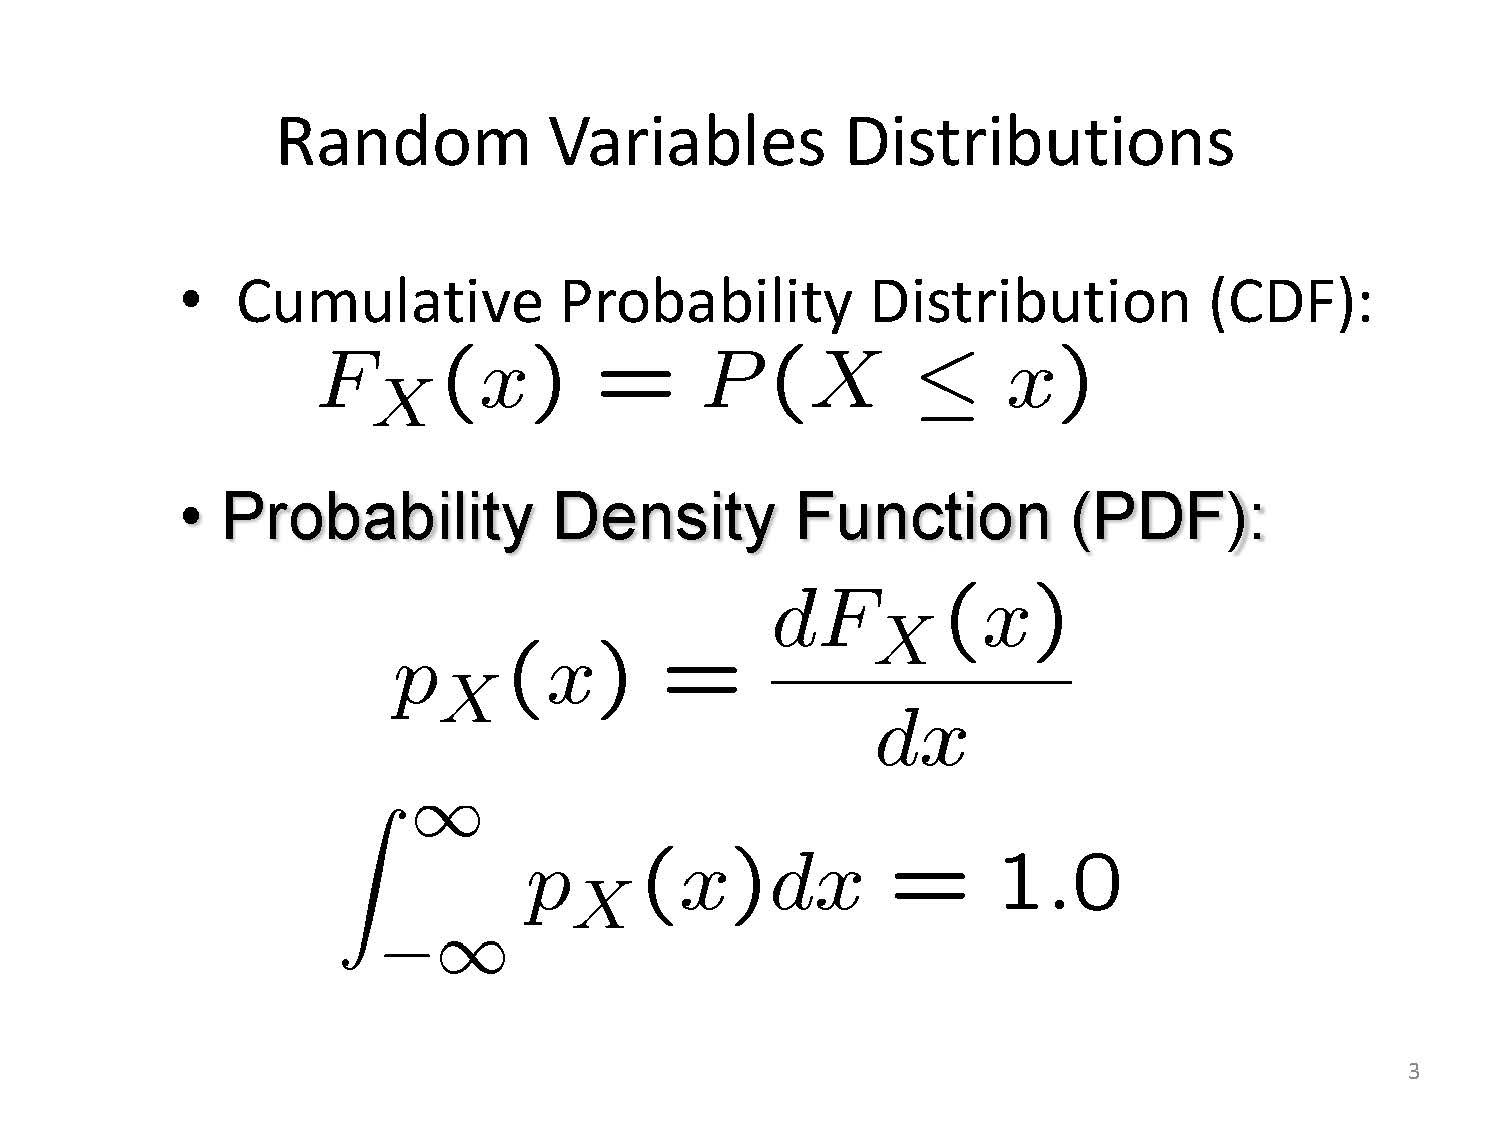
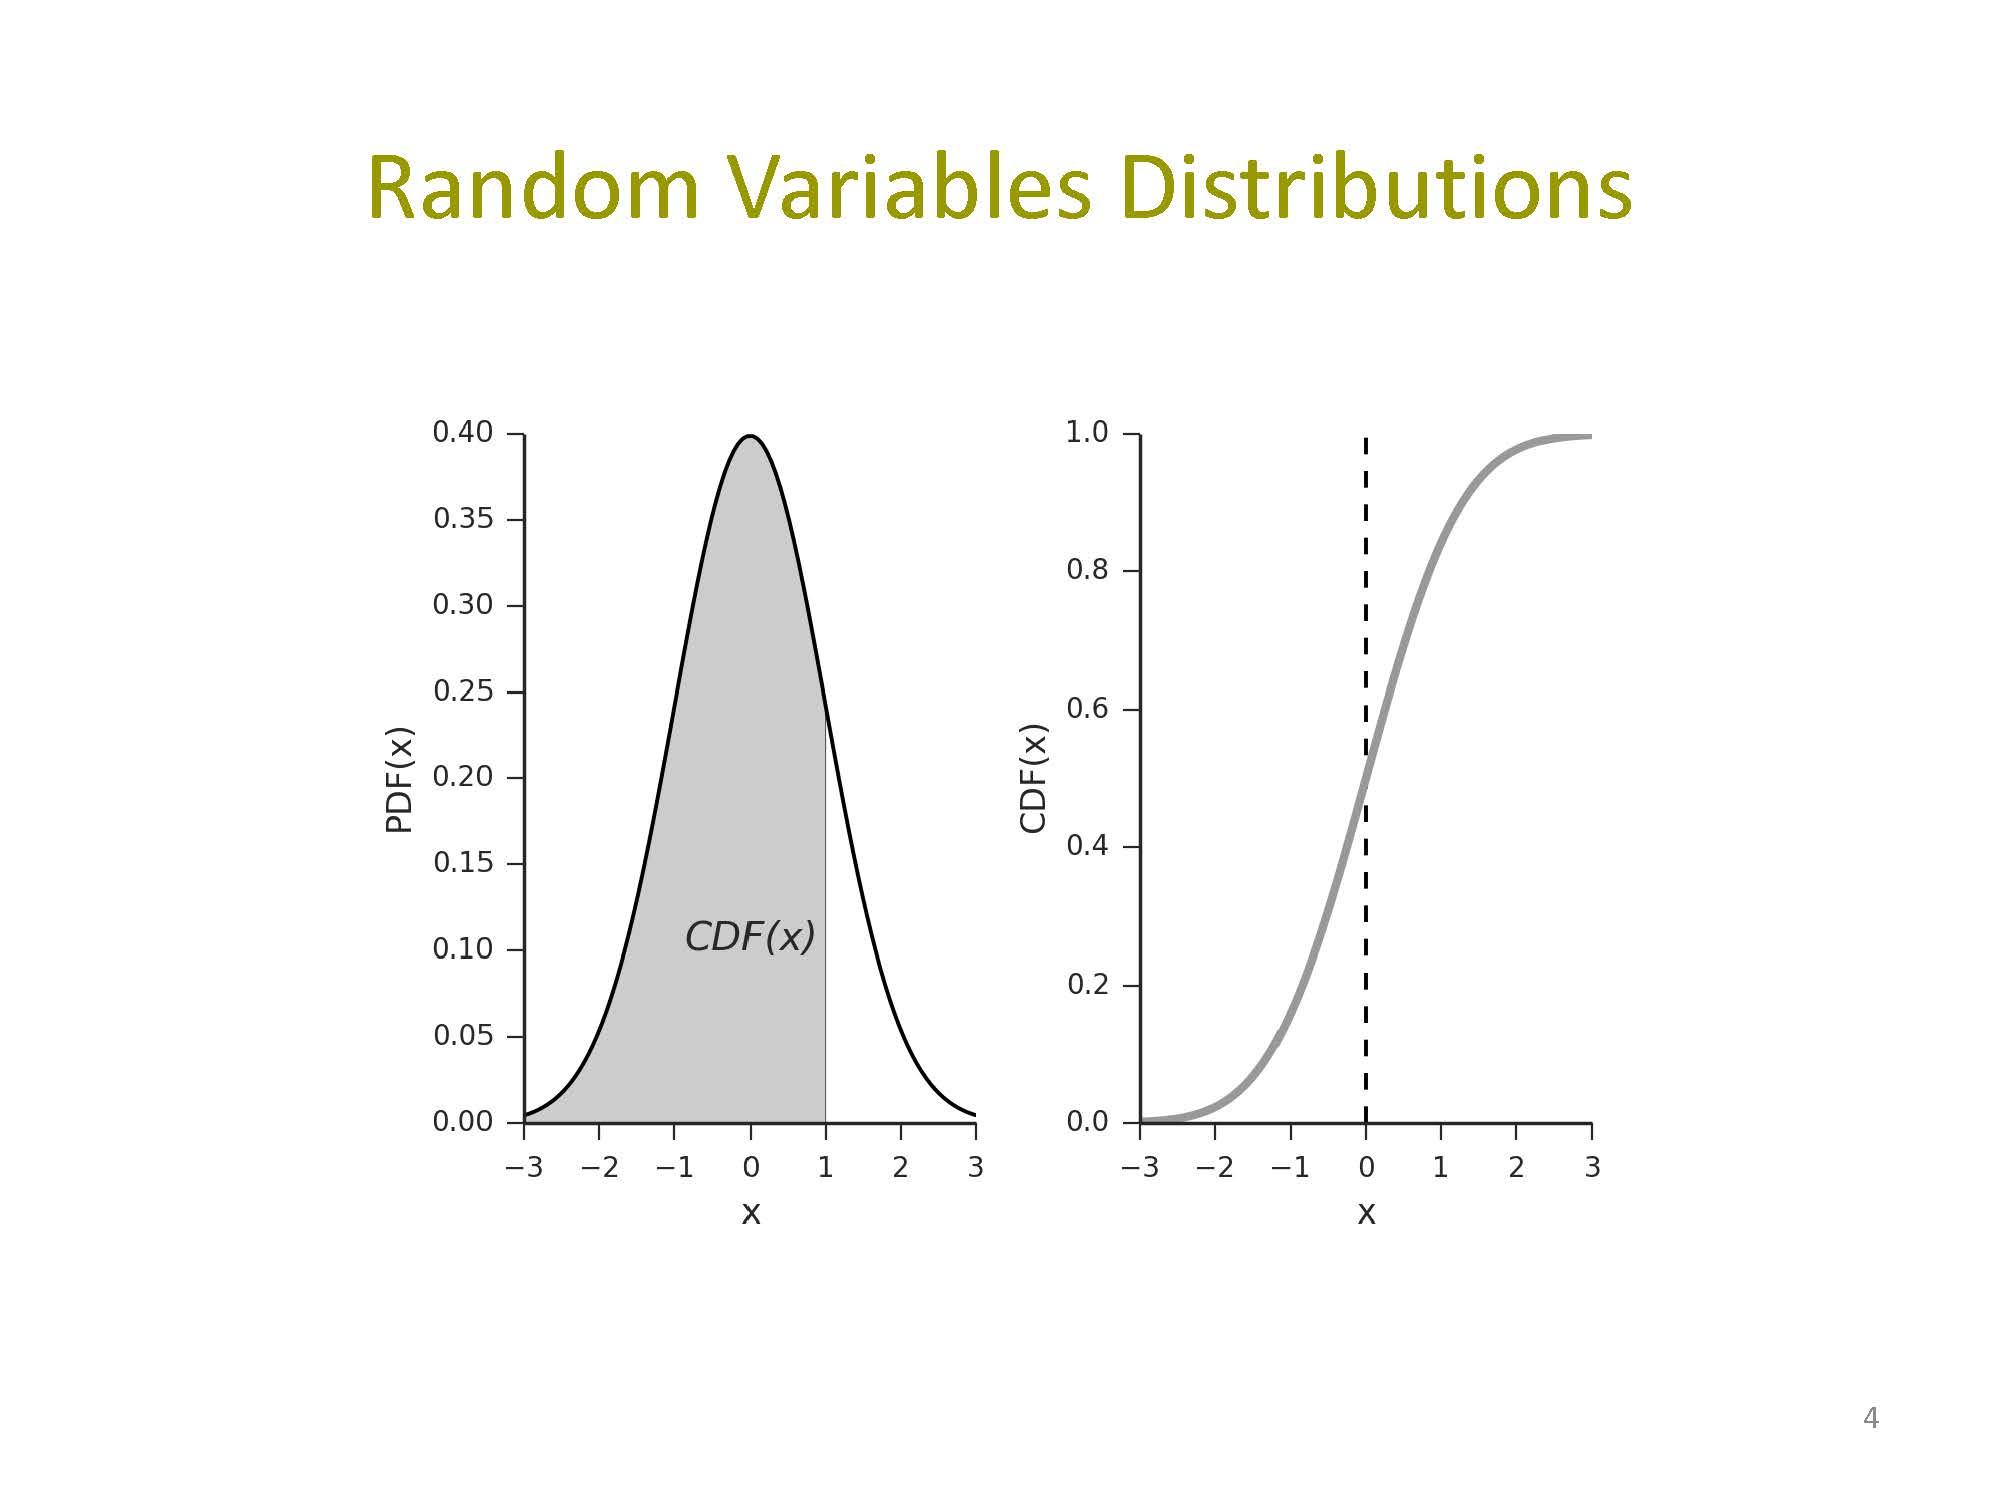
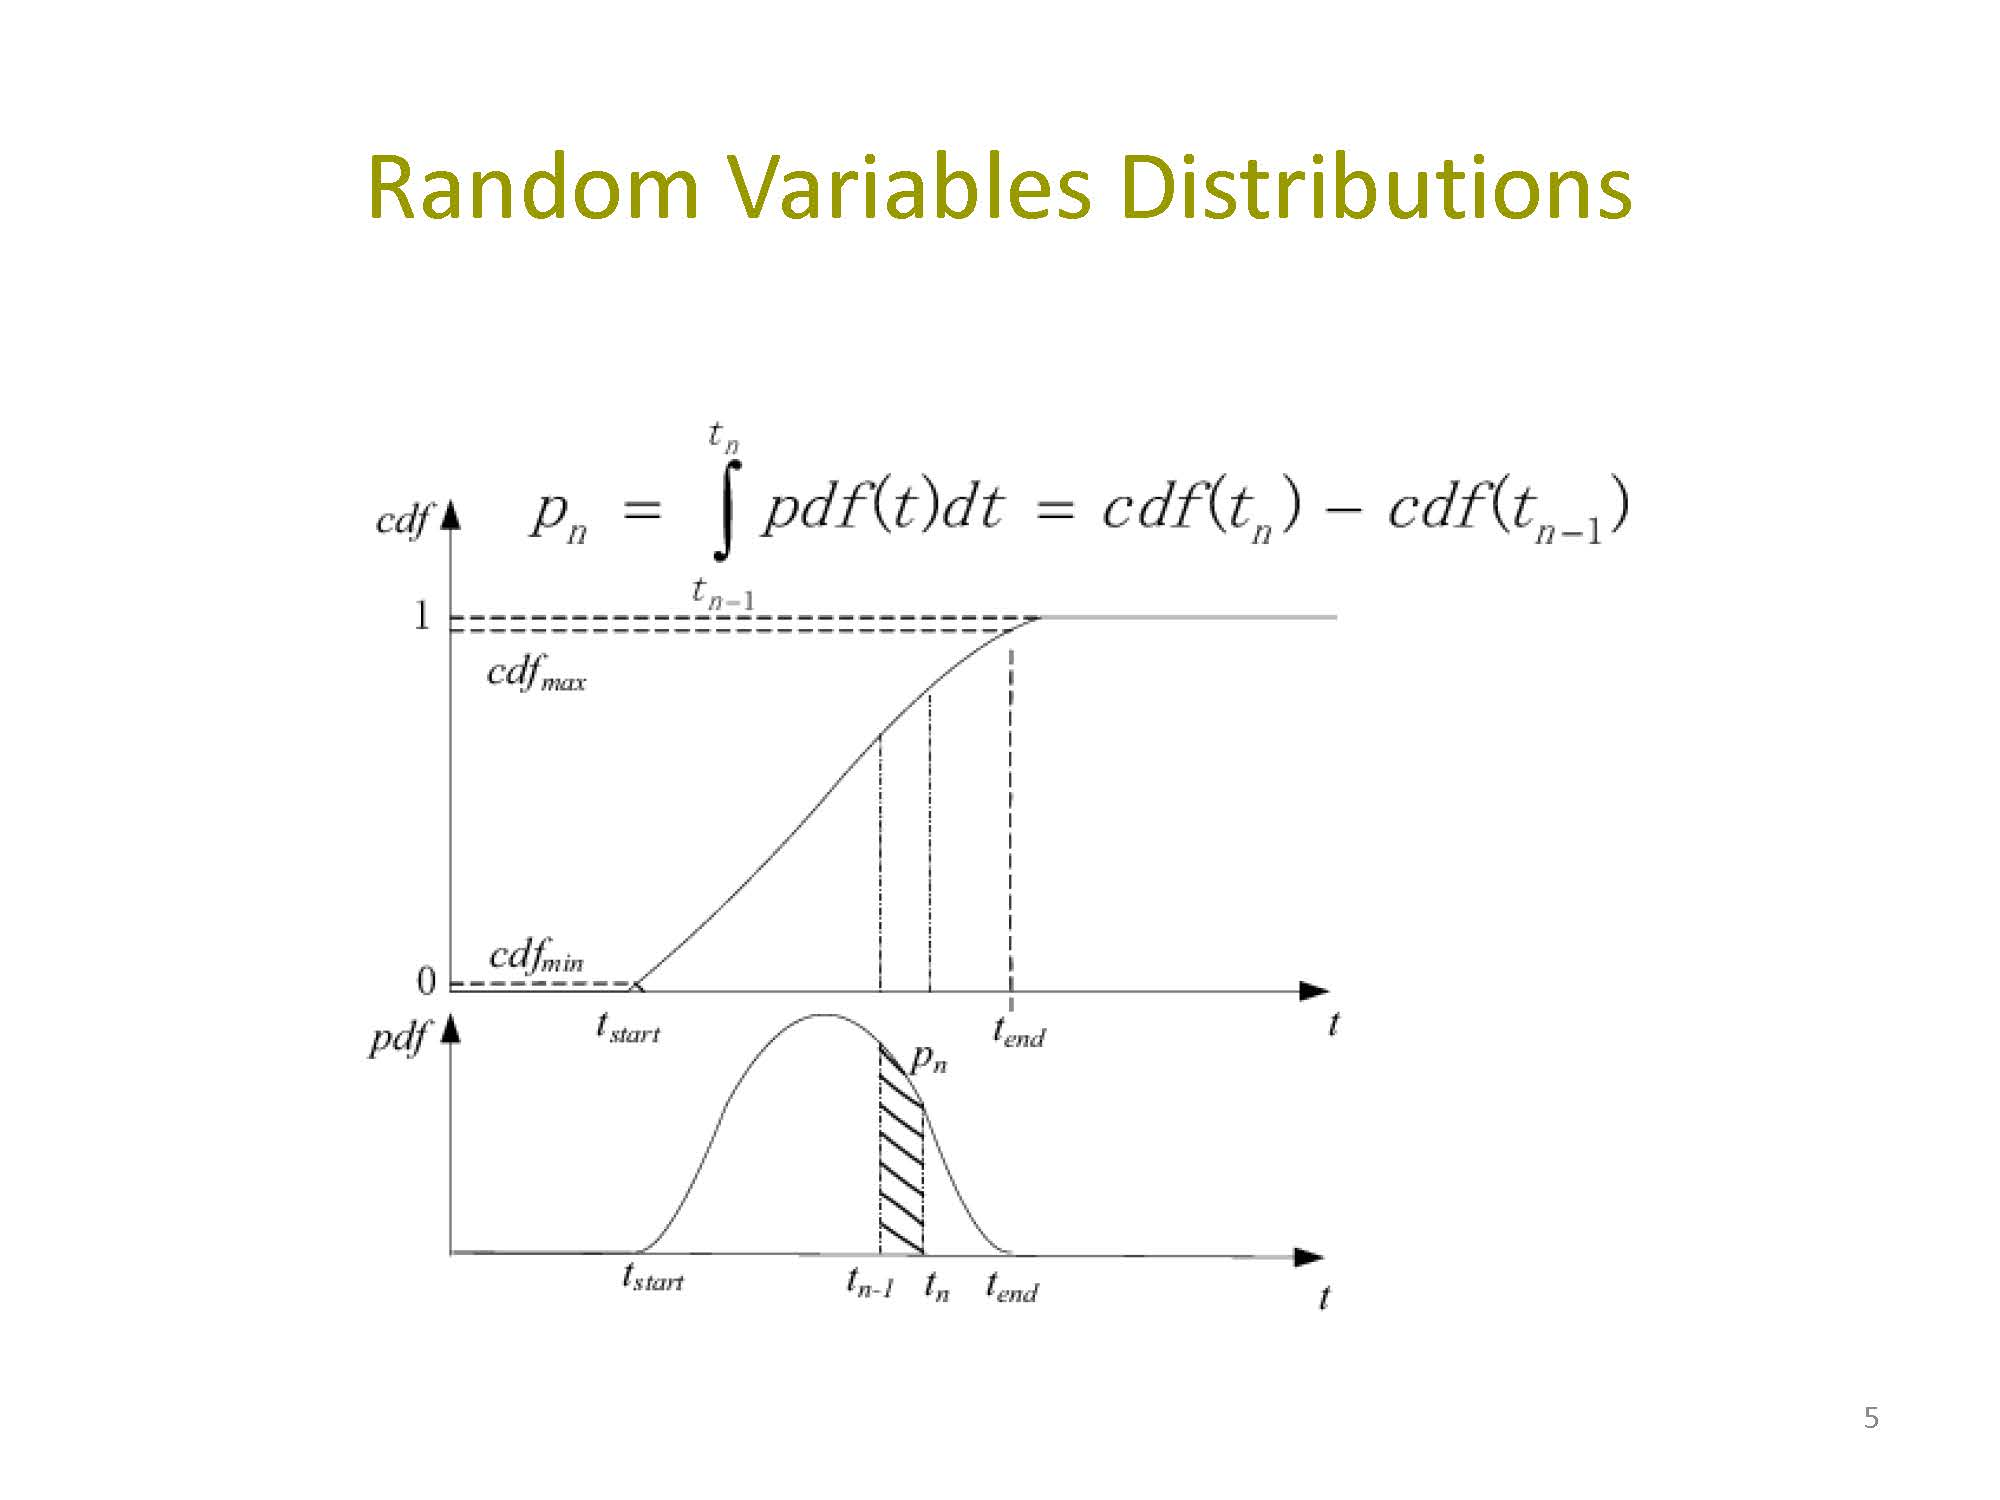
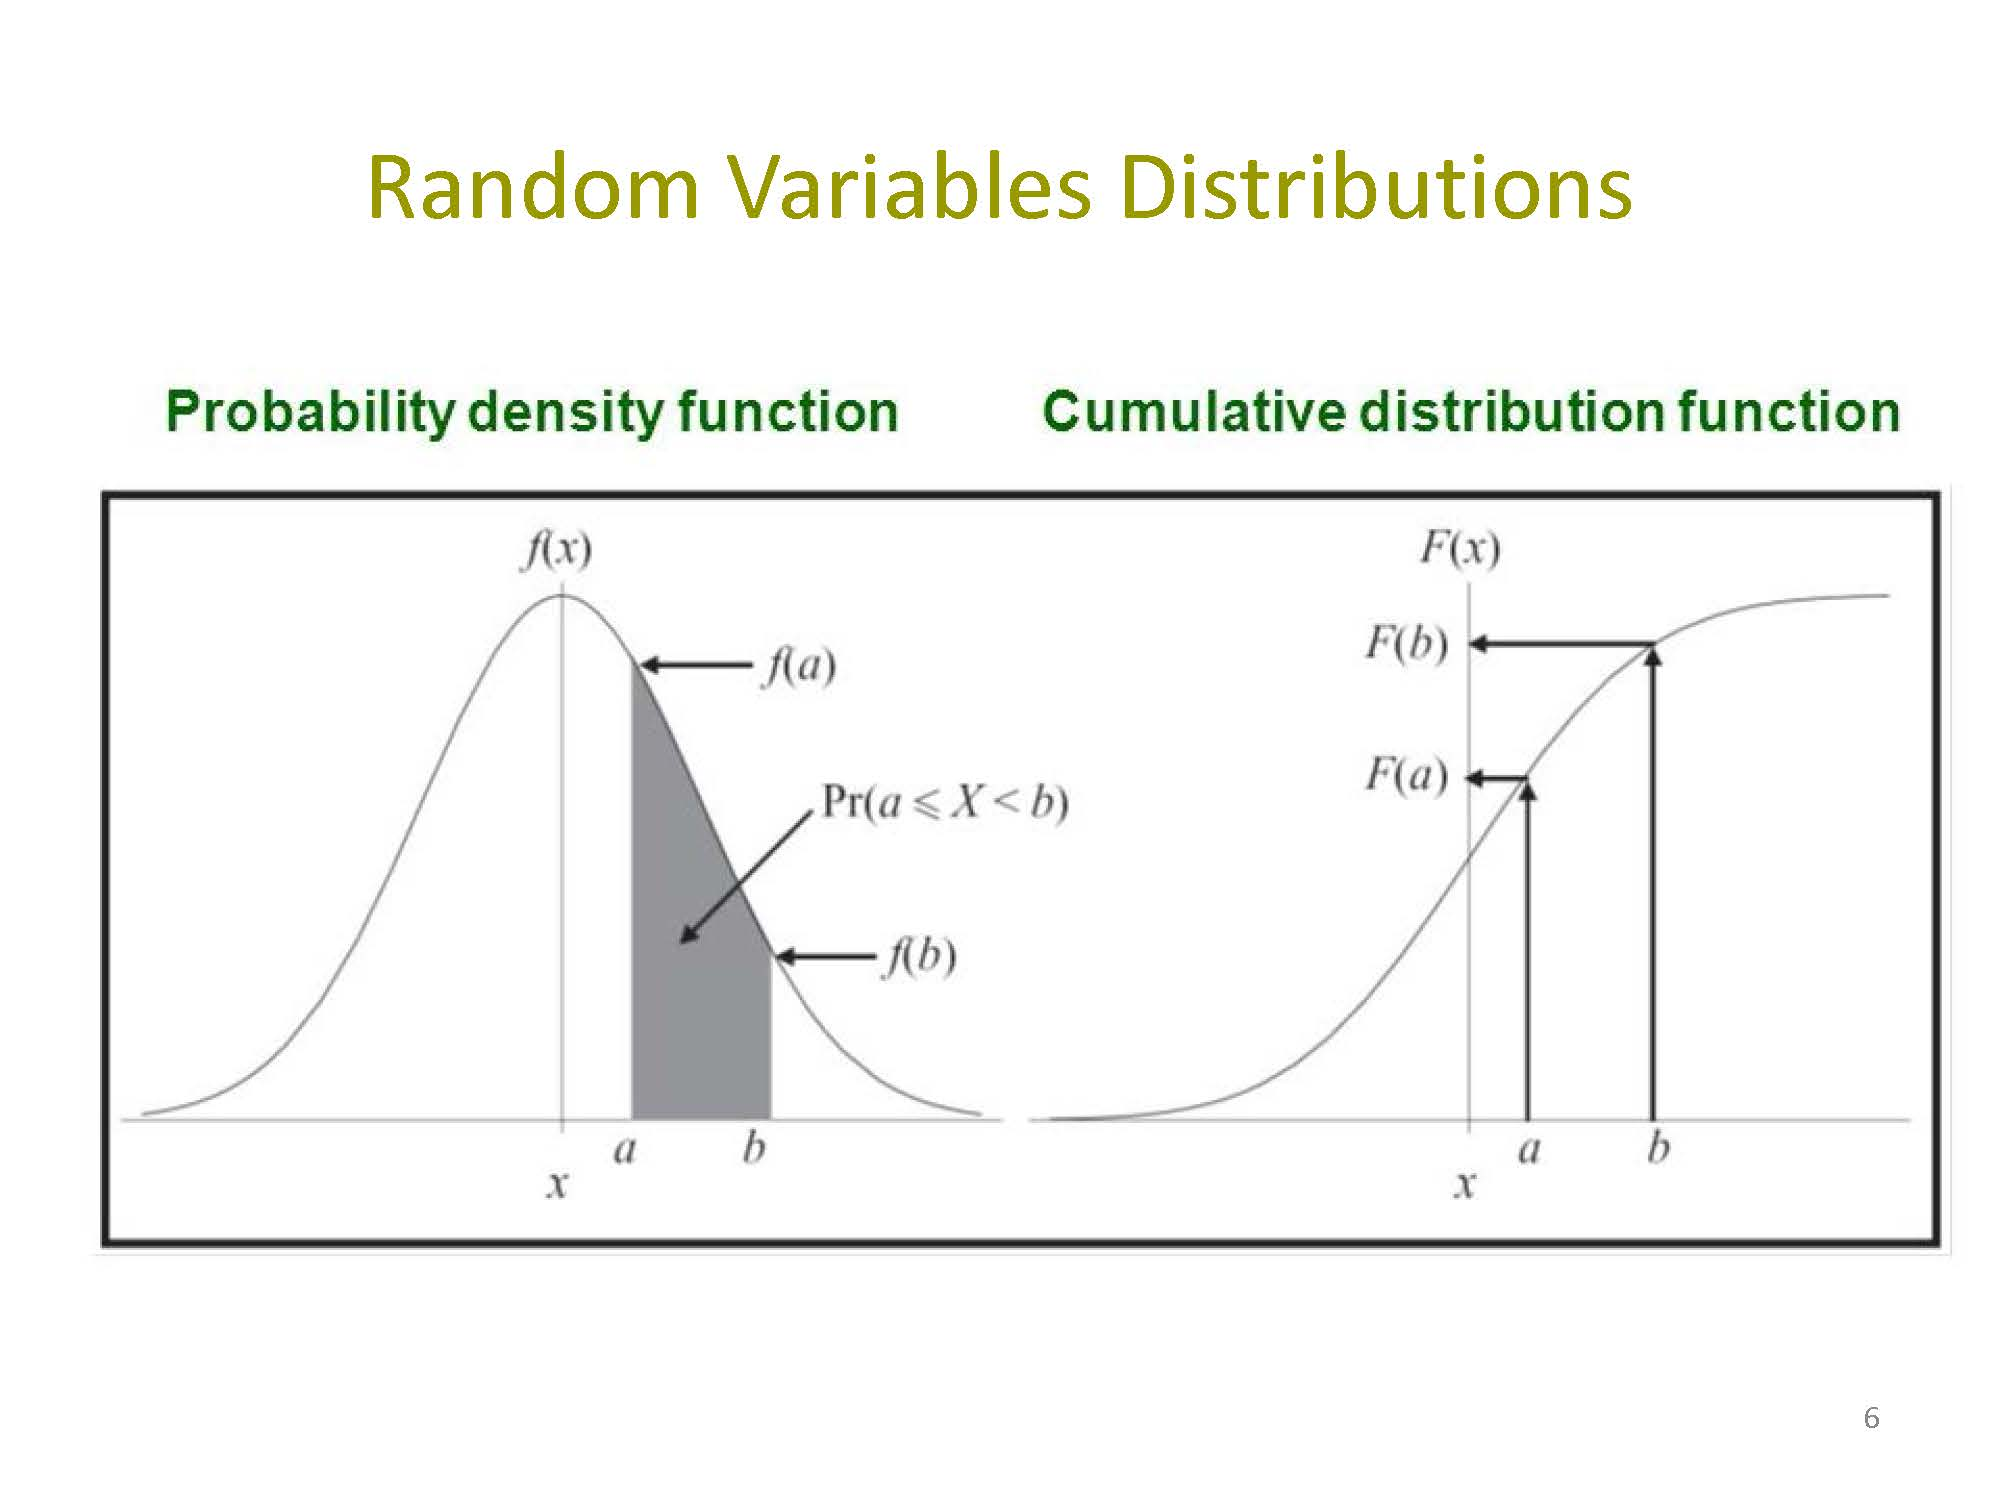

### Galton Board

https://www.youtube.com/watch?v=6YDHBFVIvIs


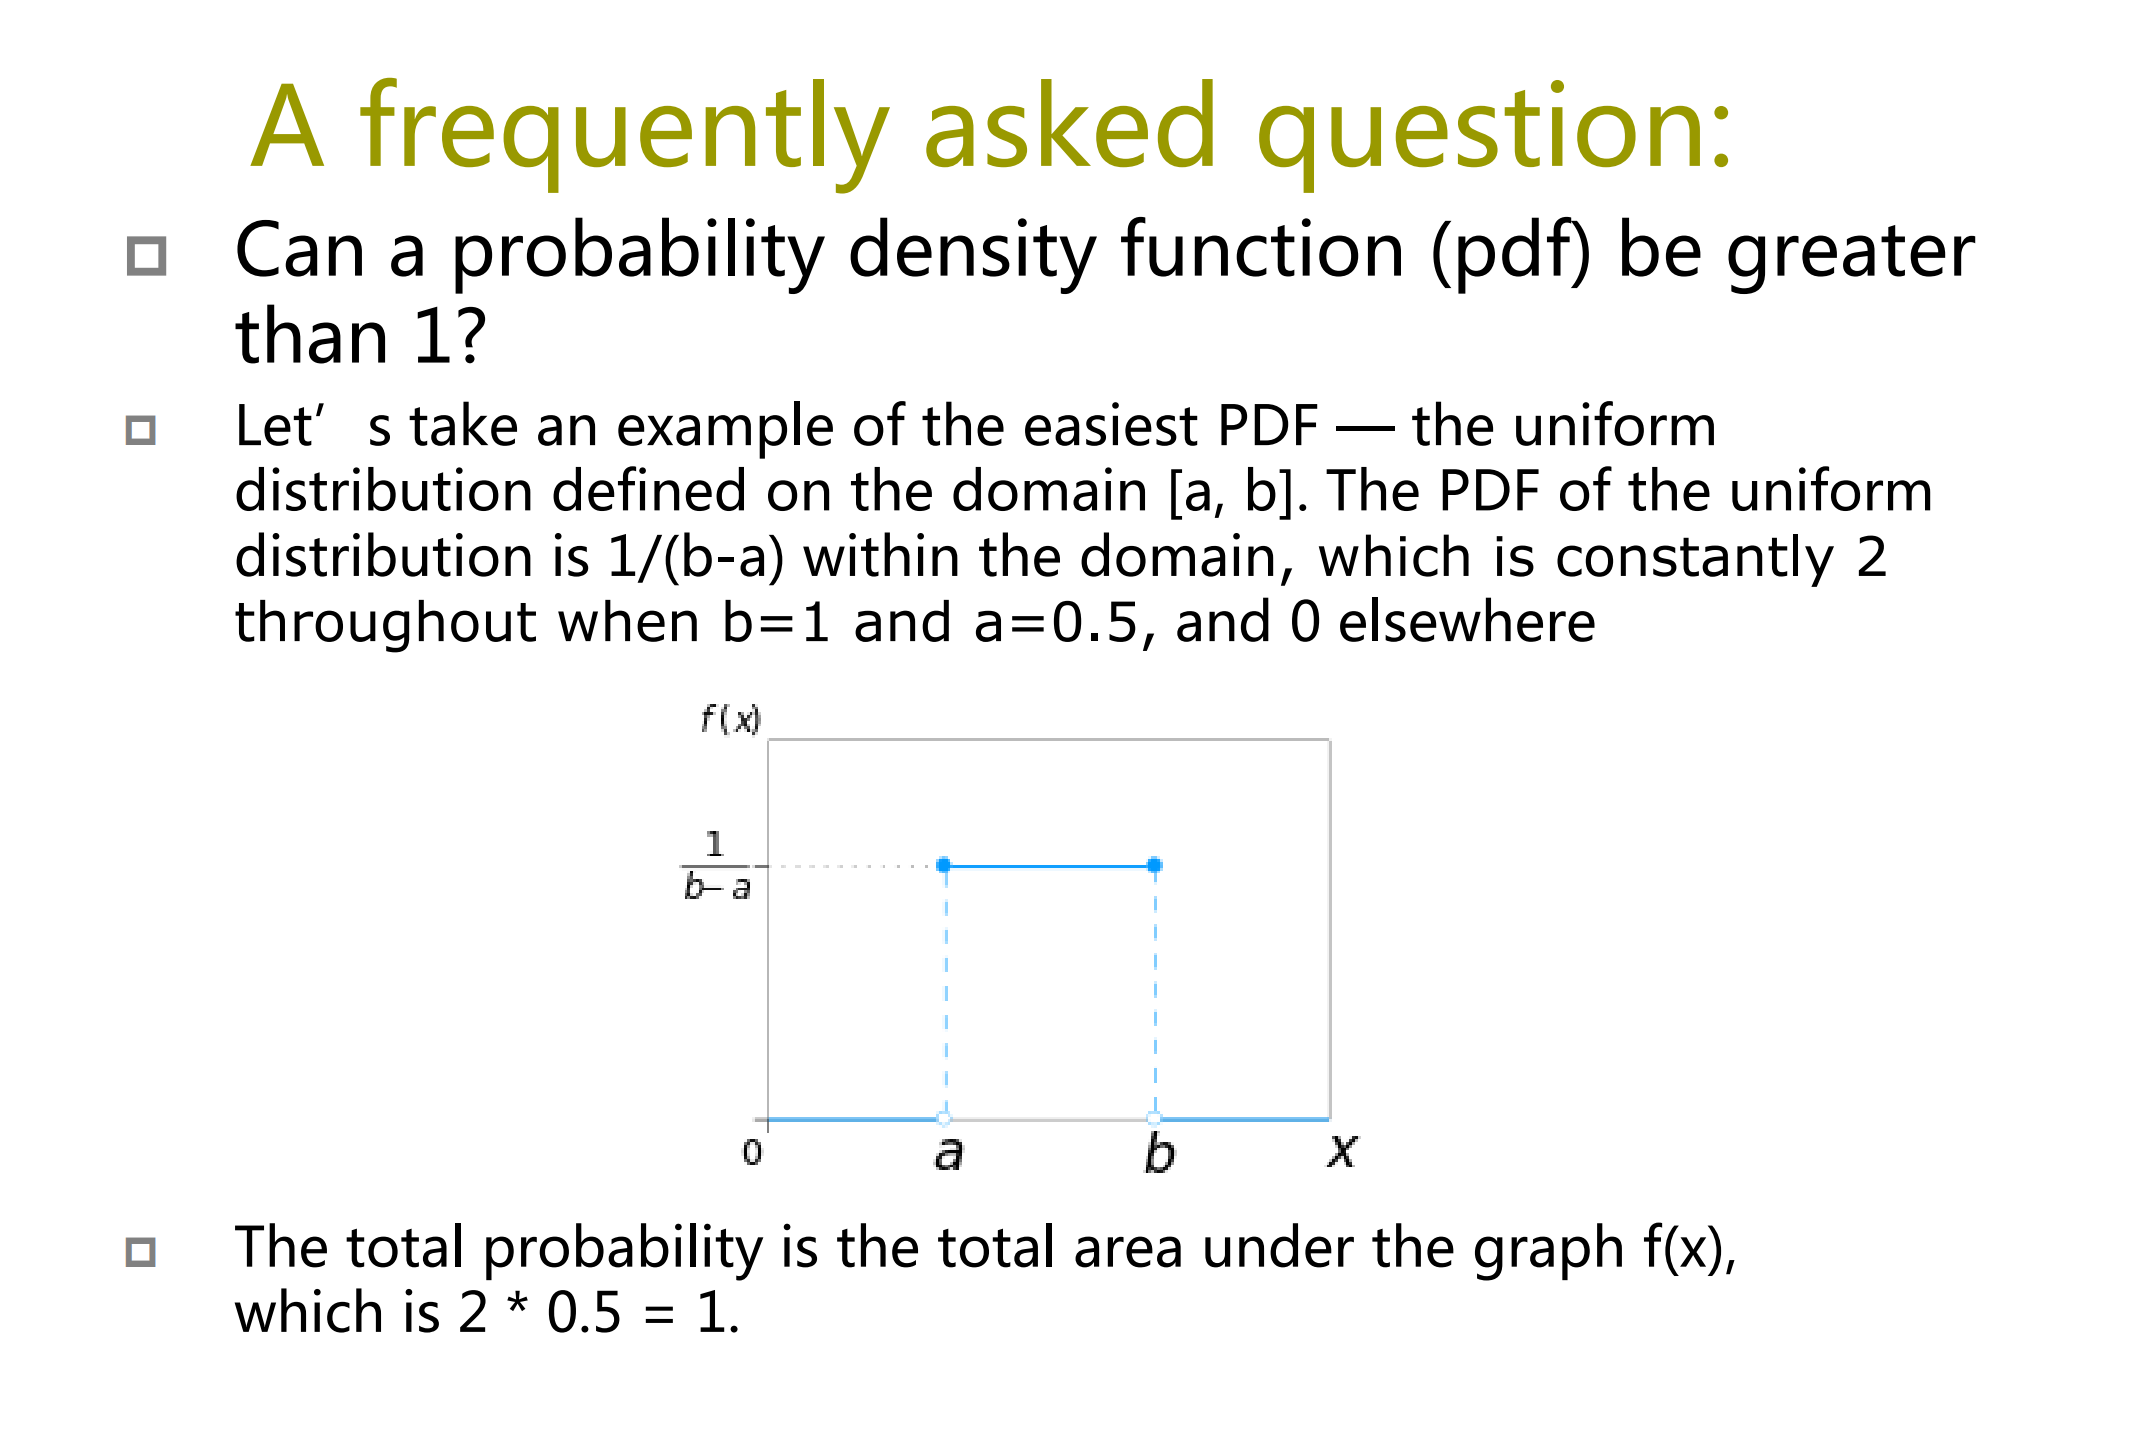

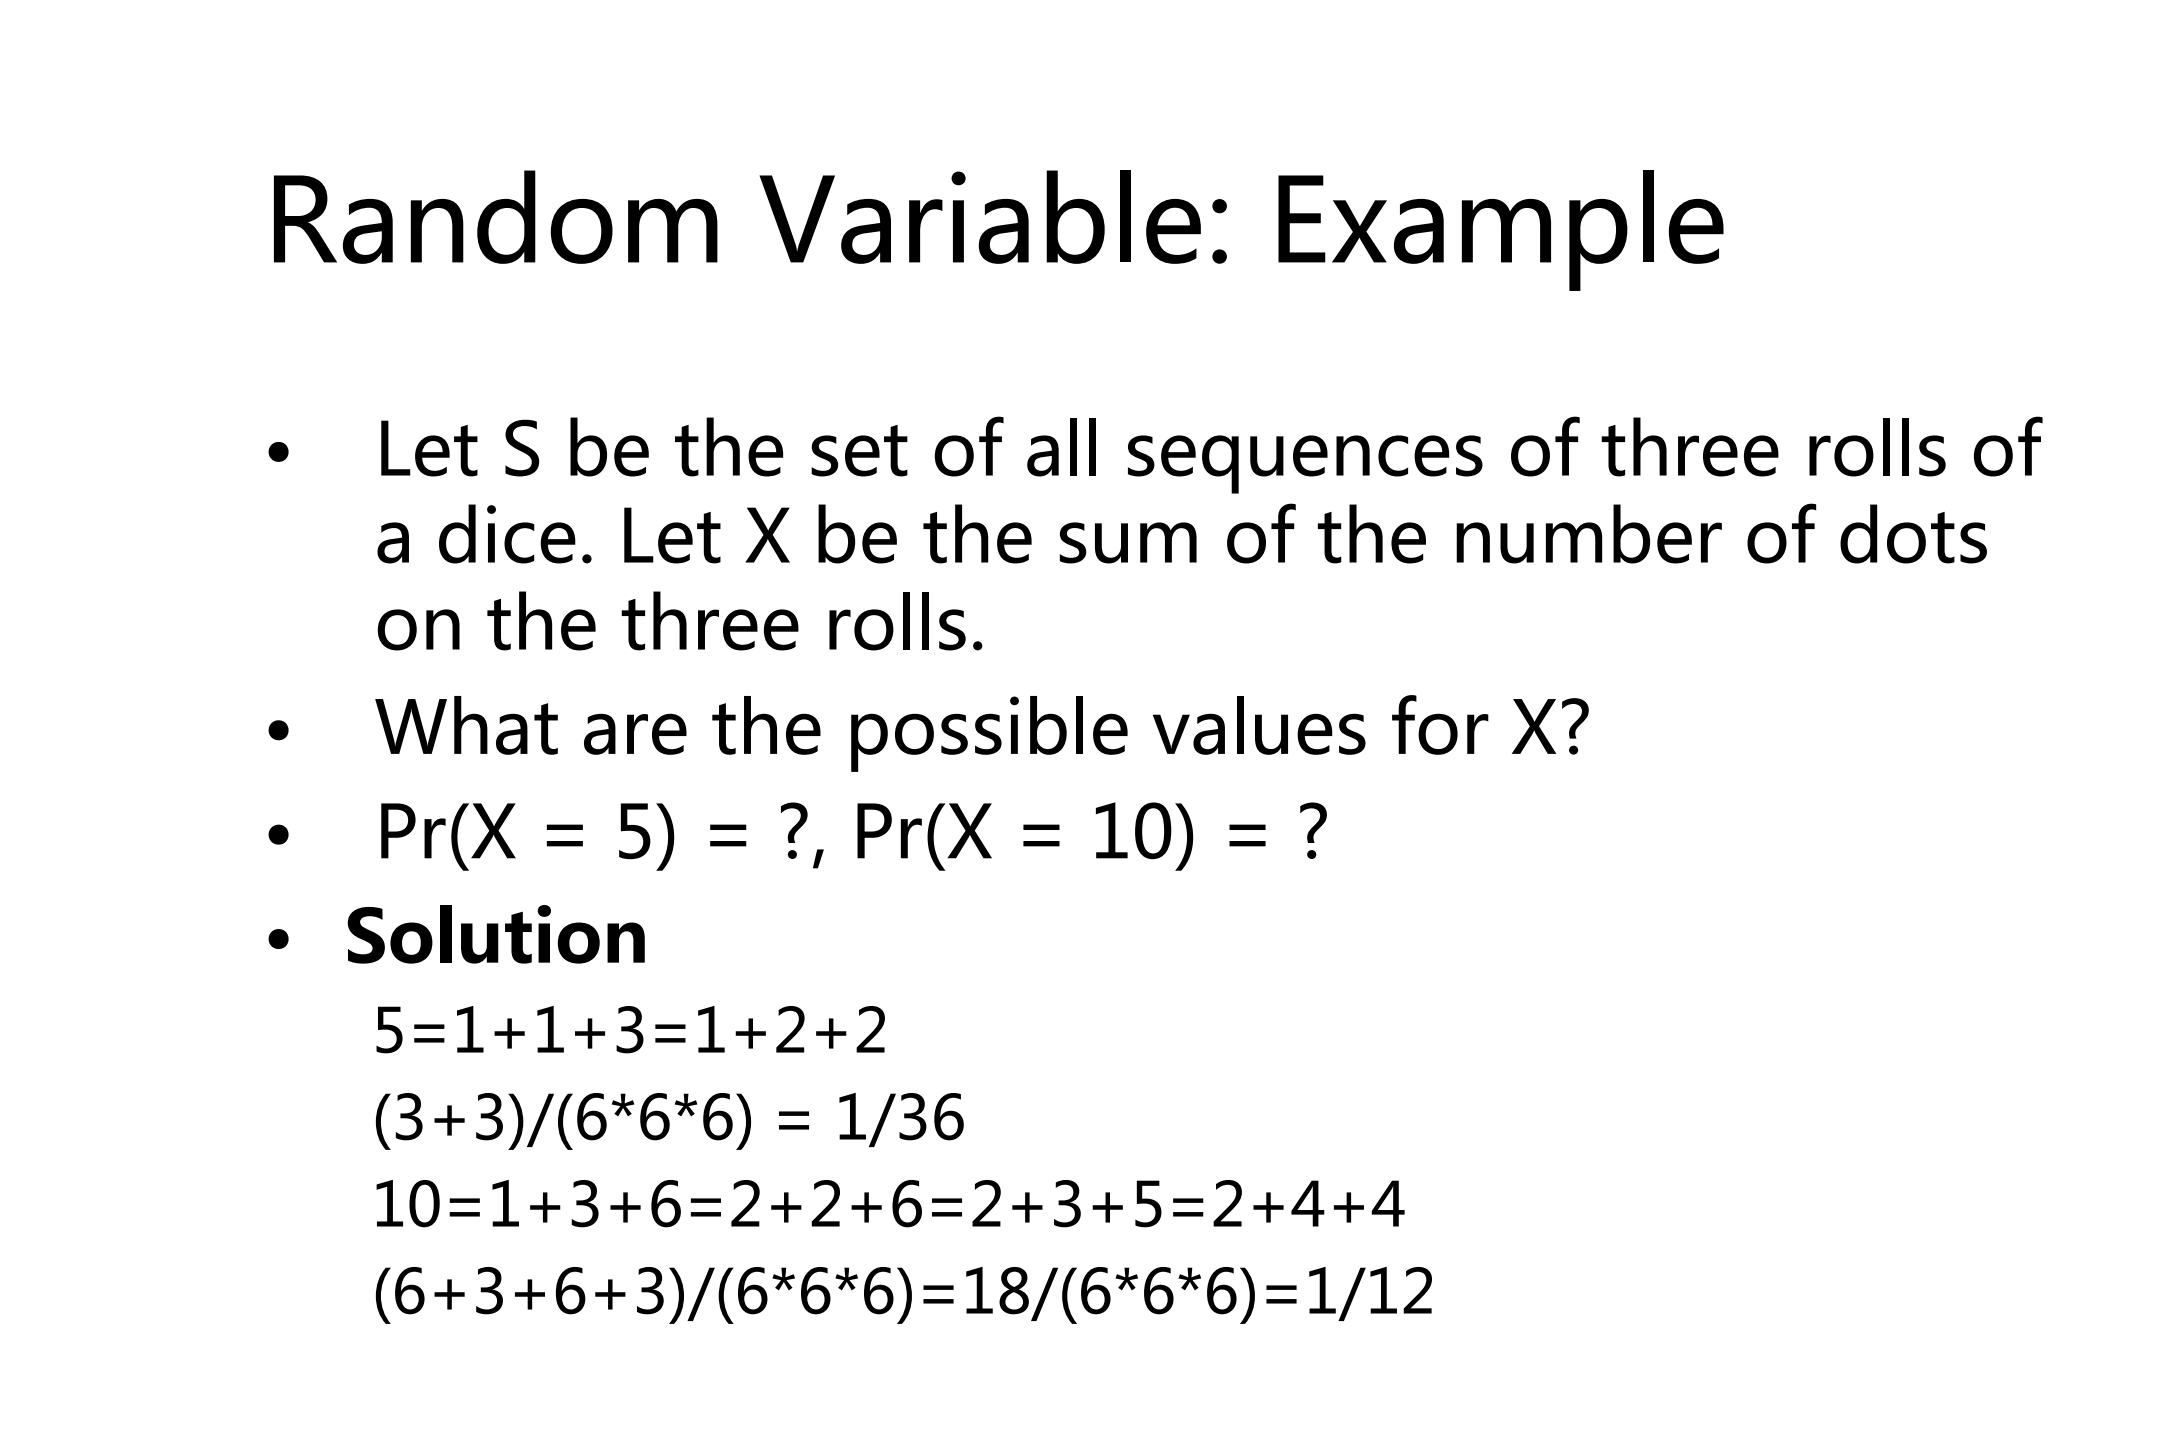

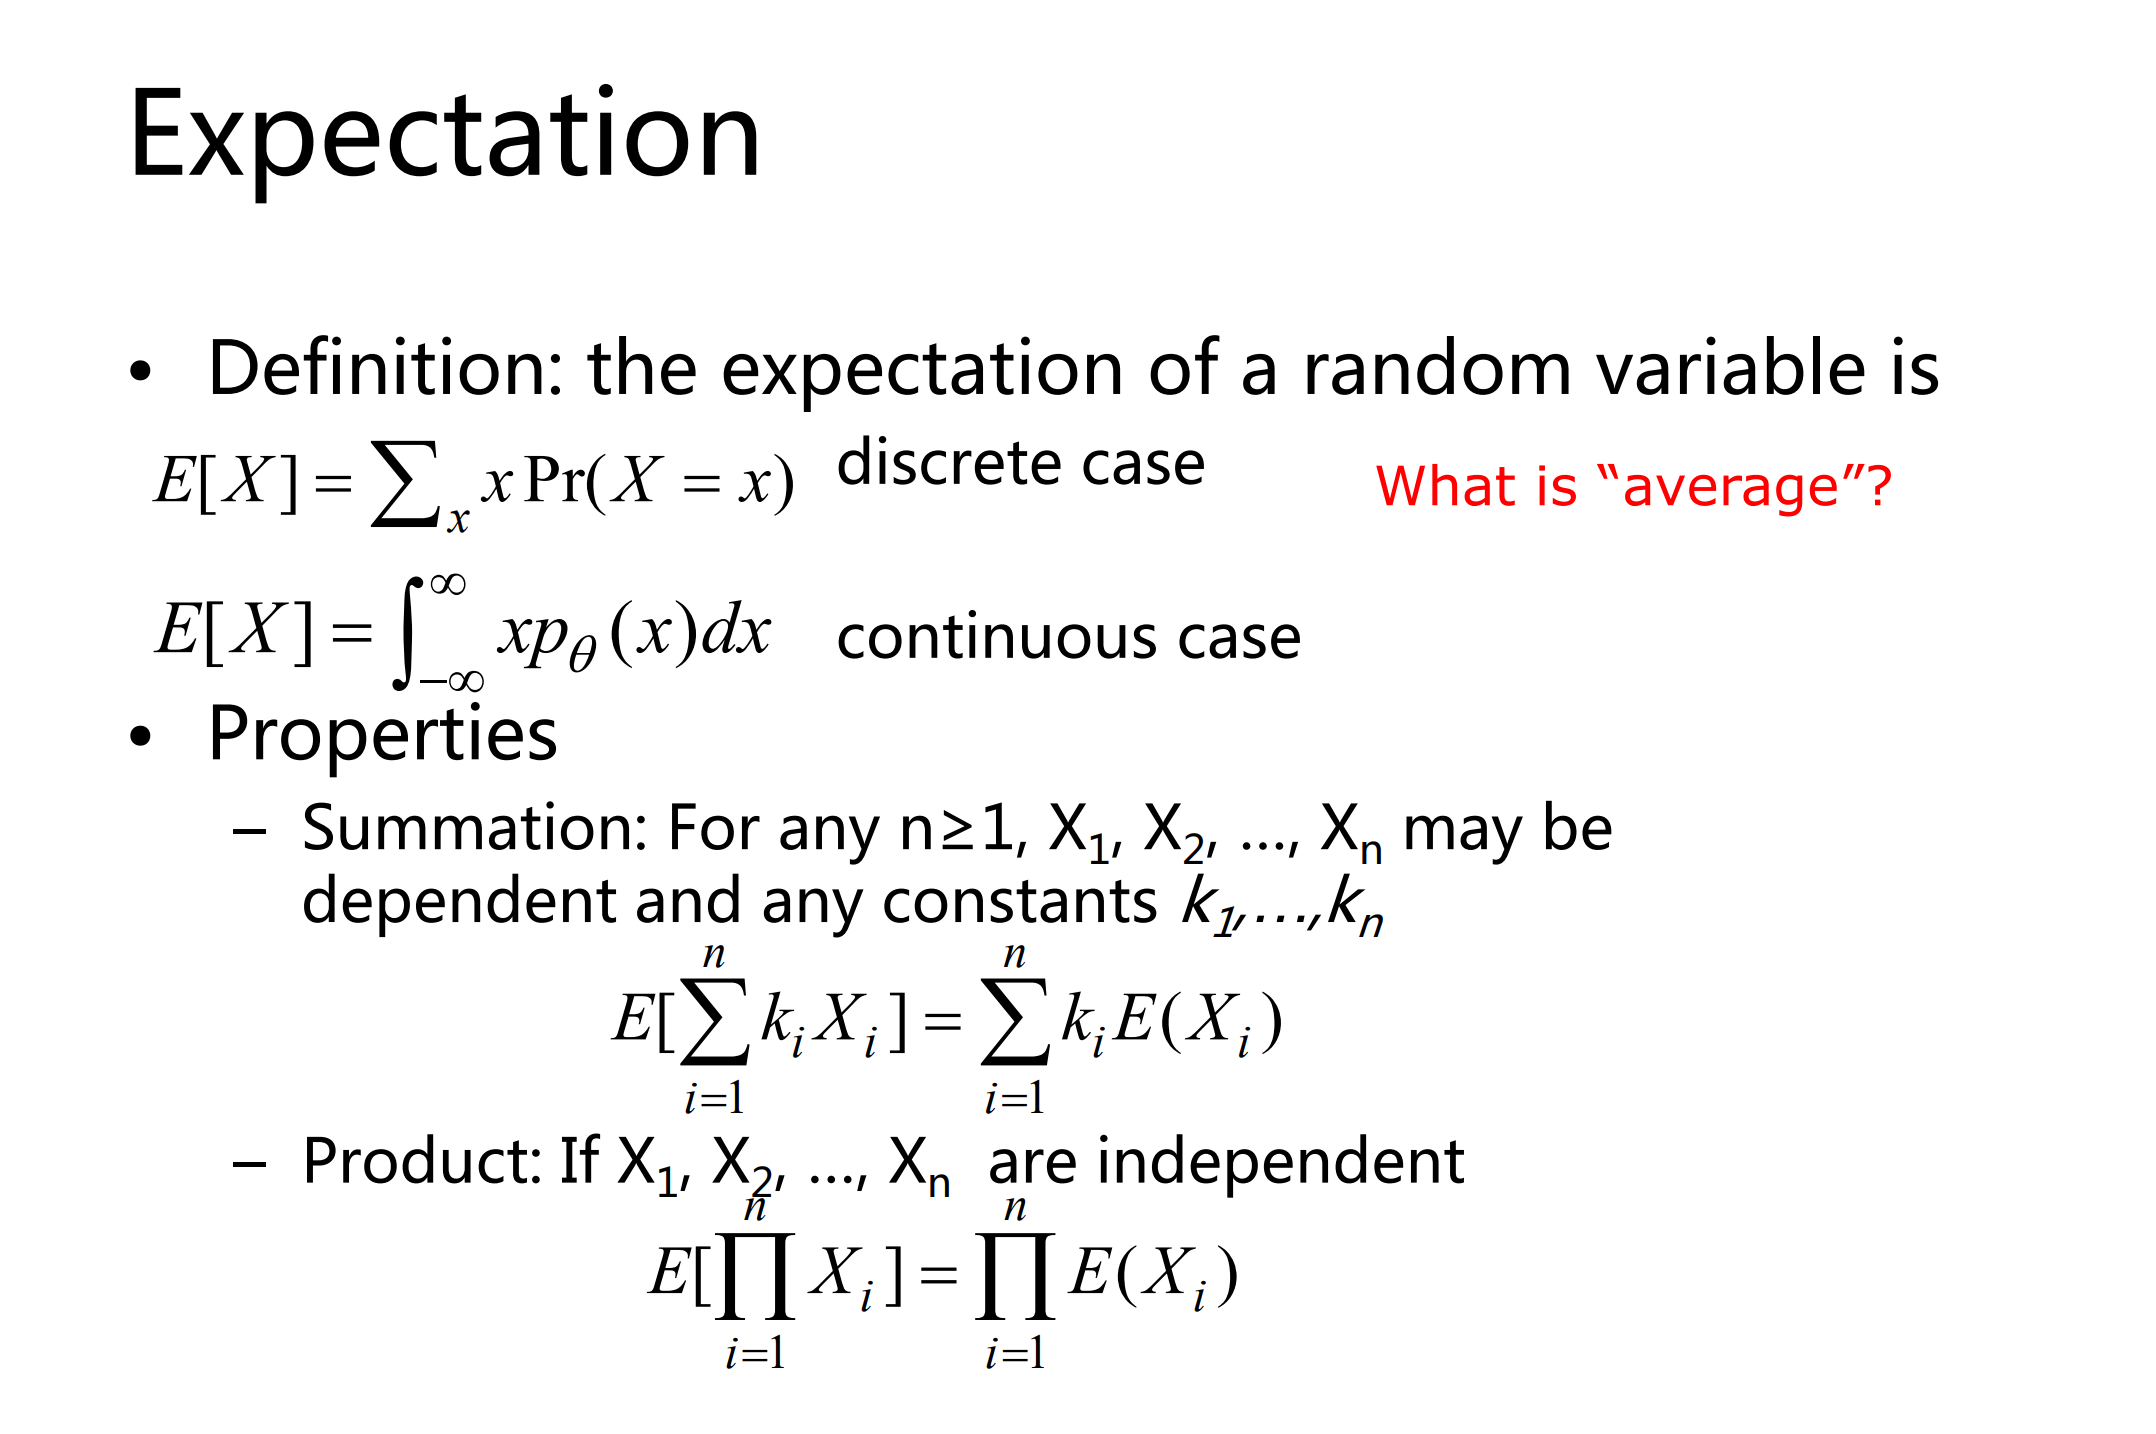

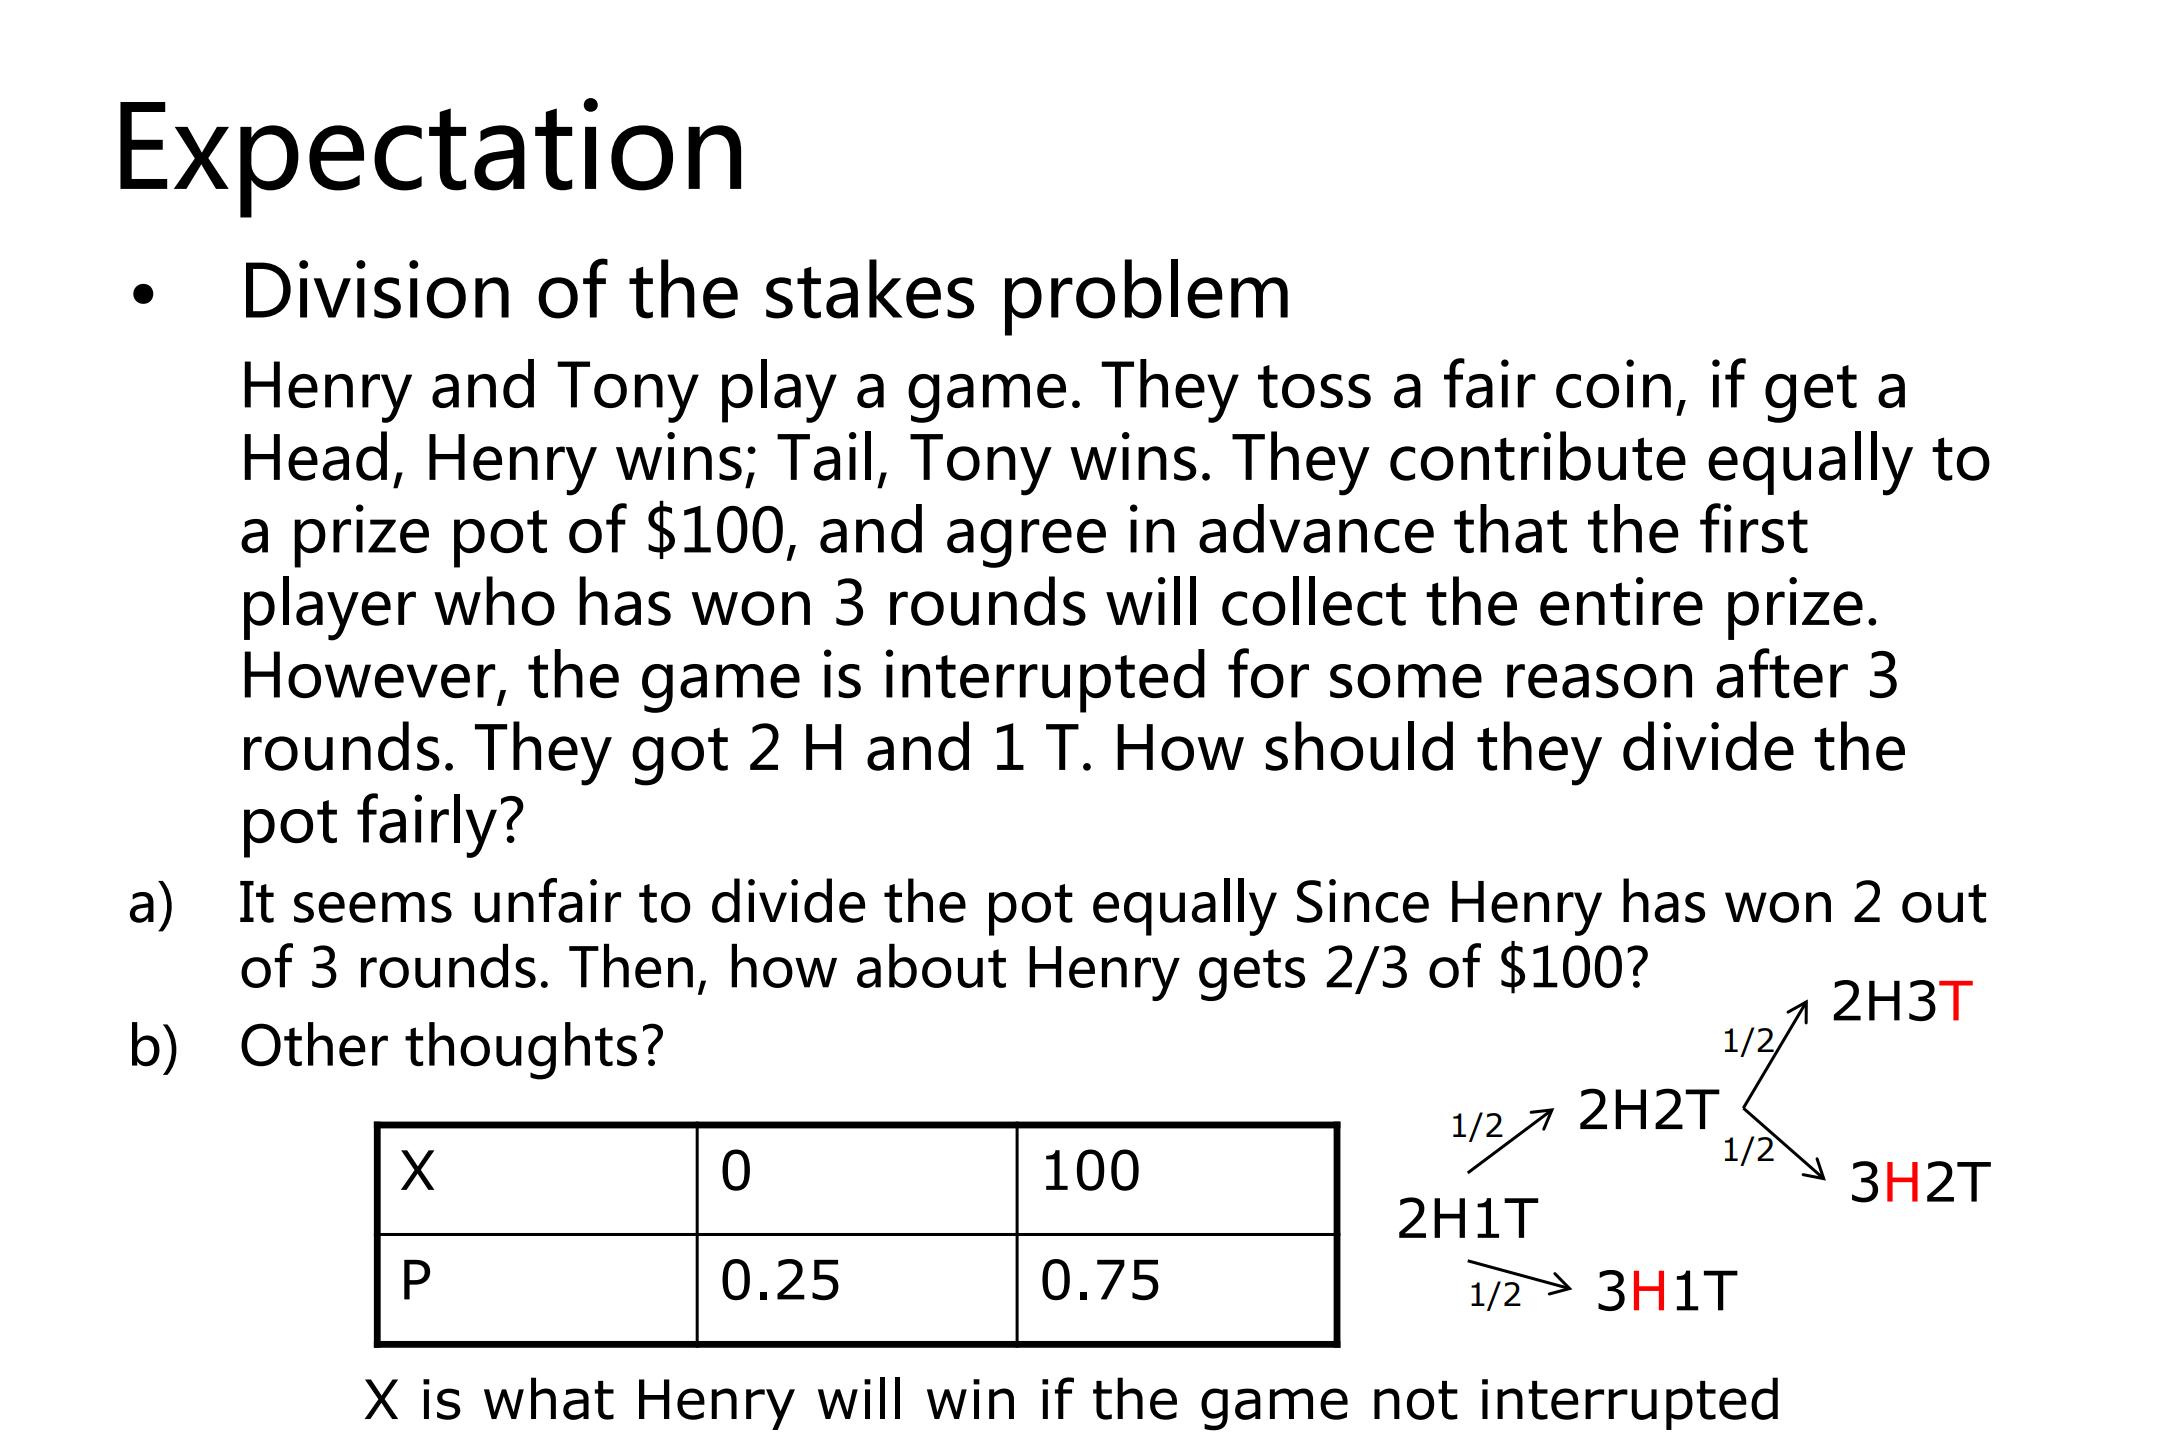

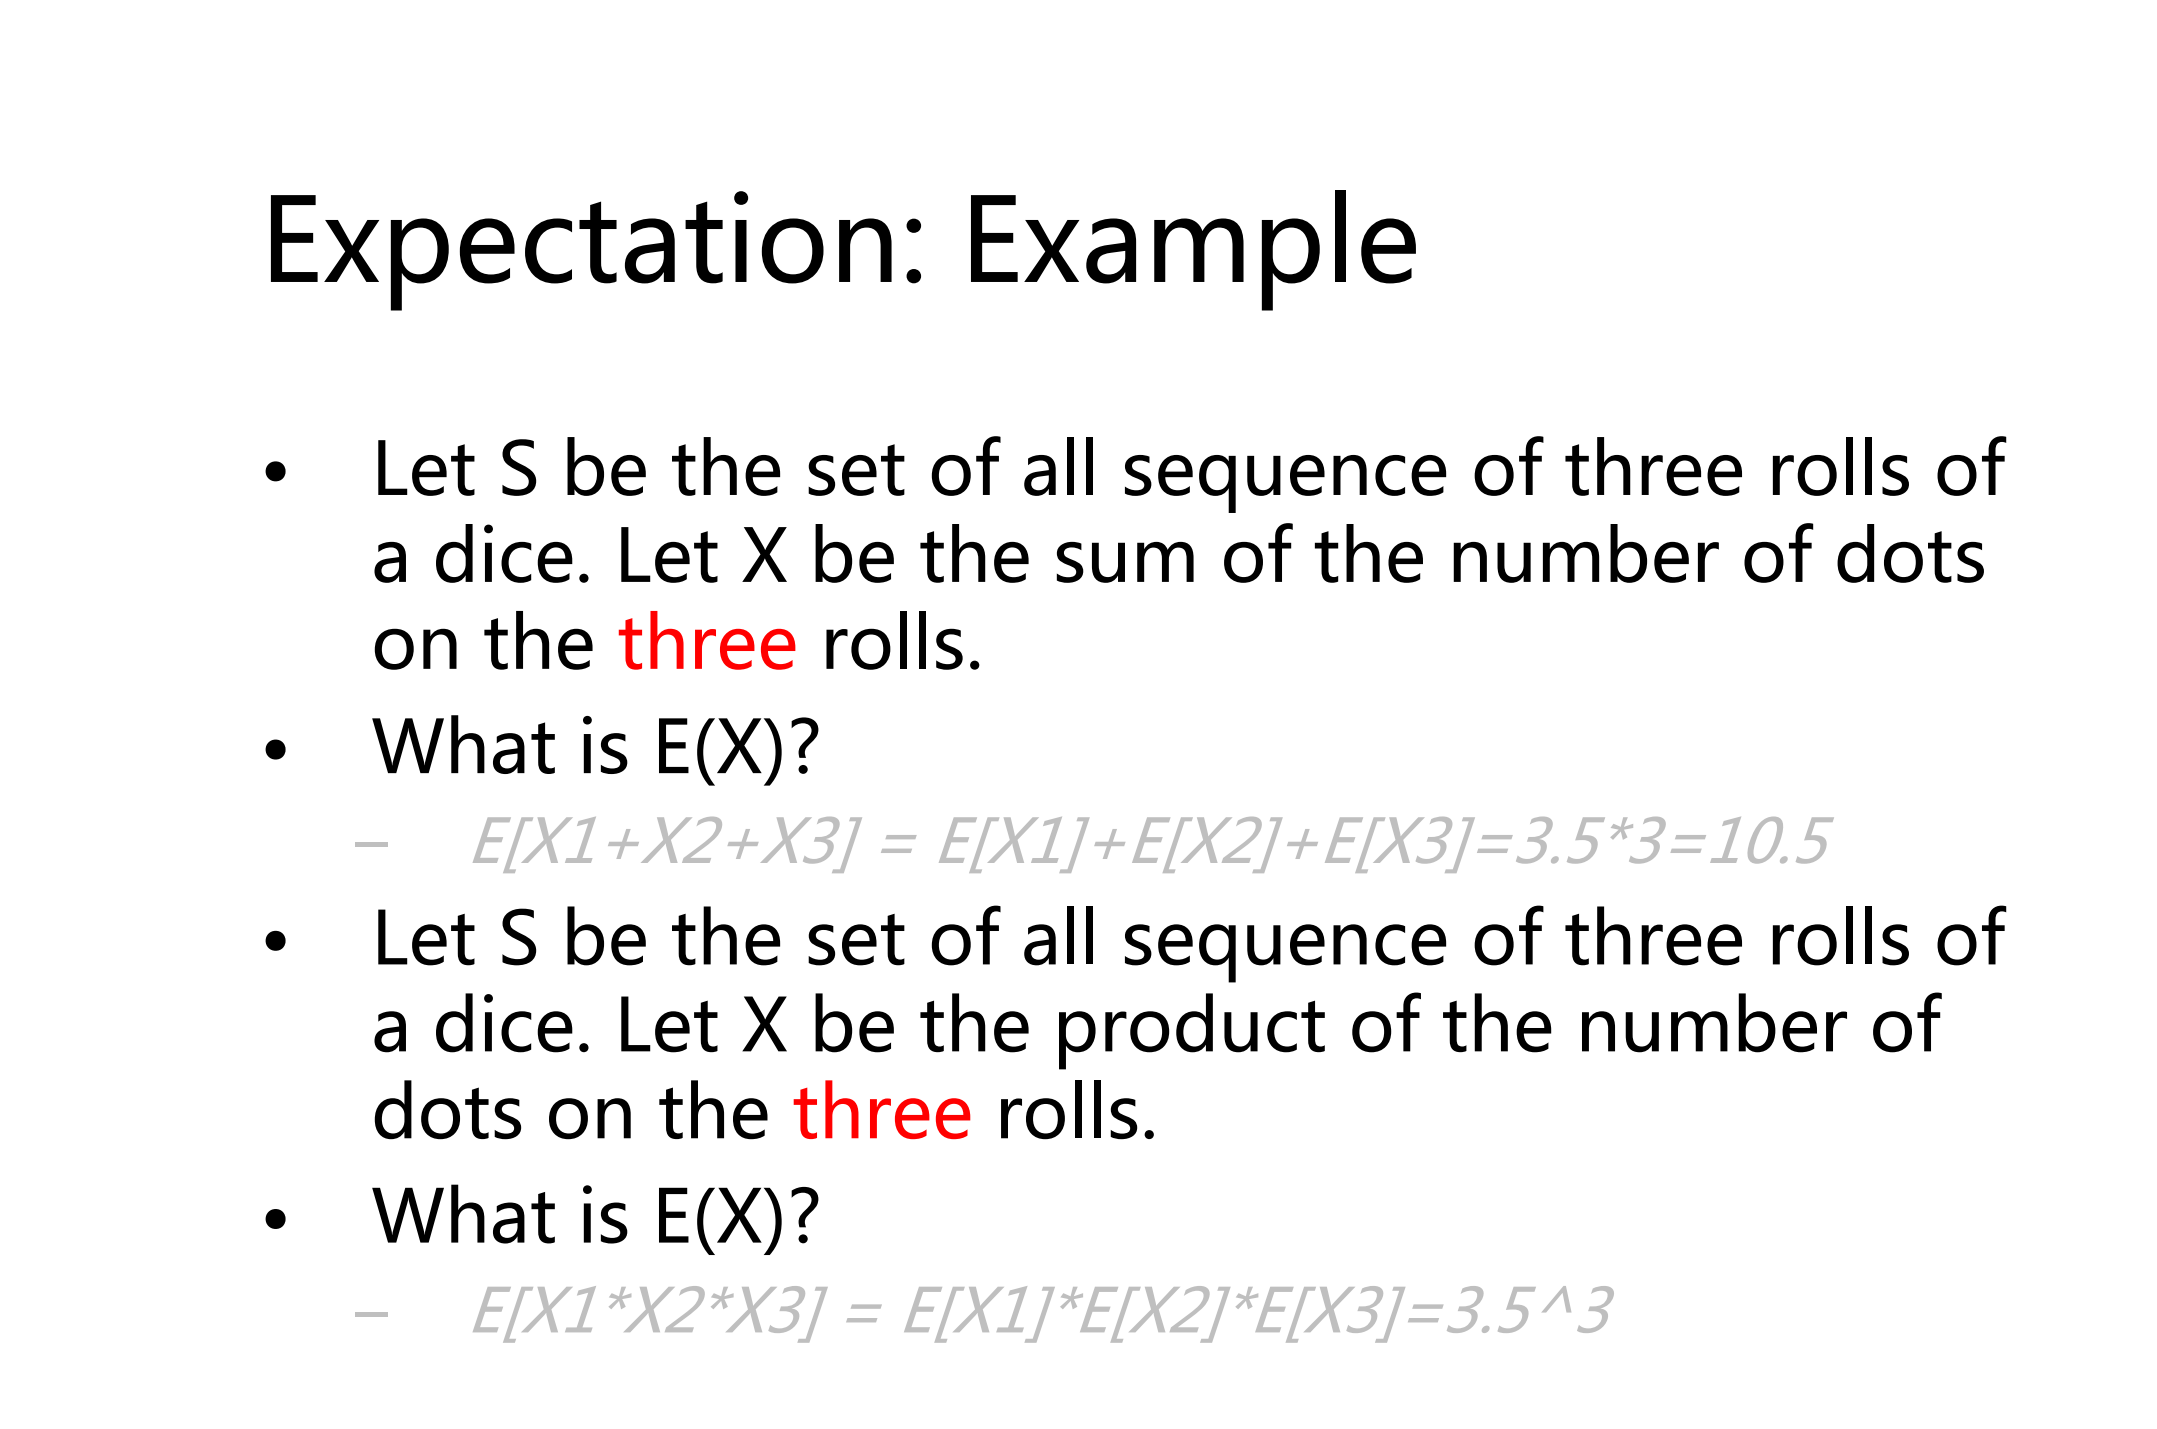

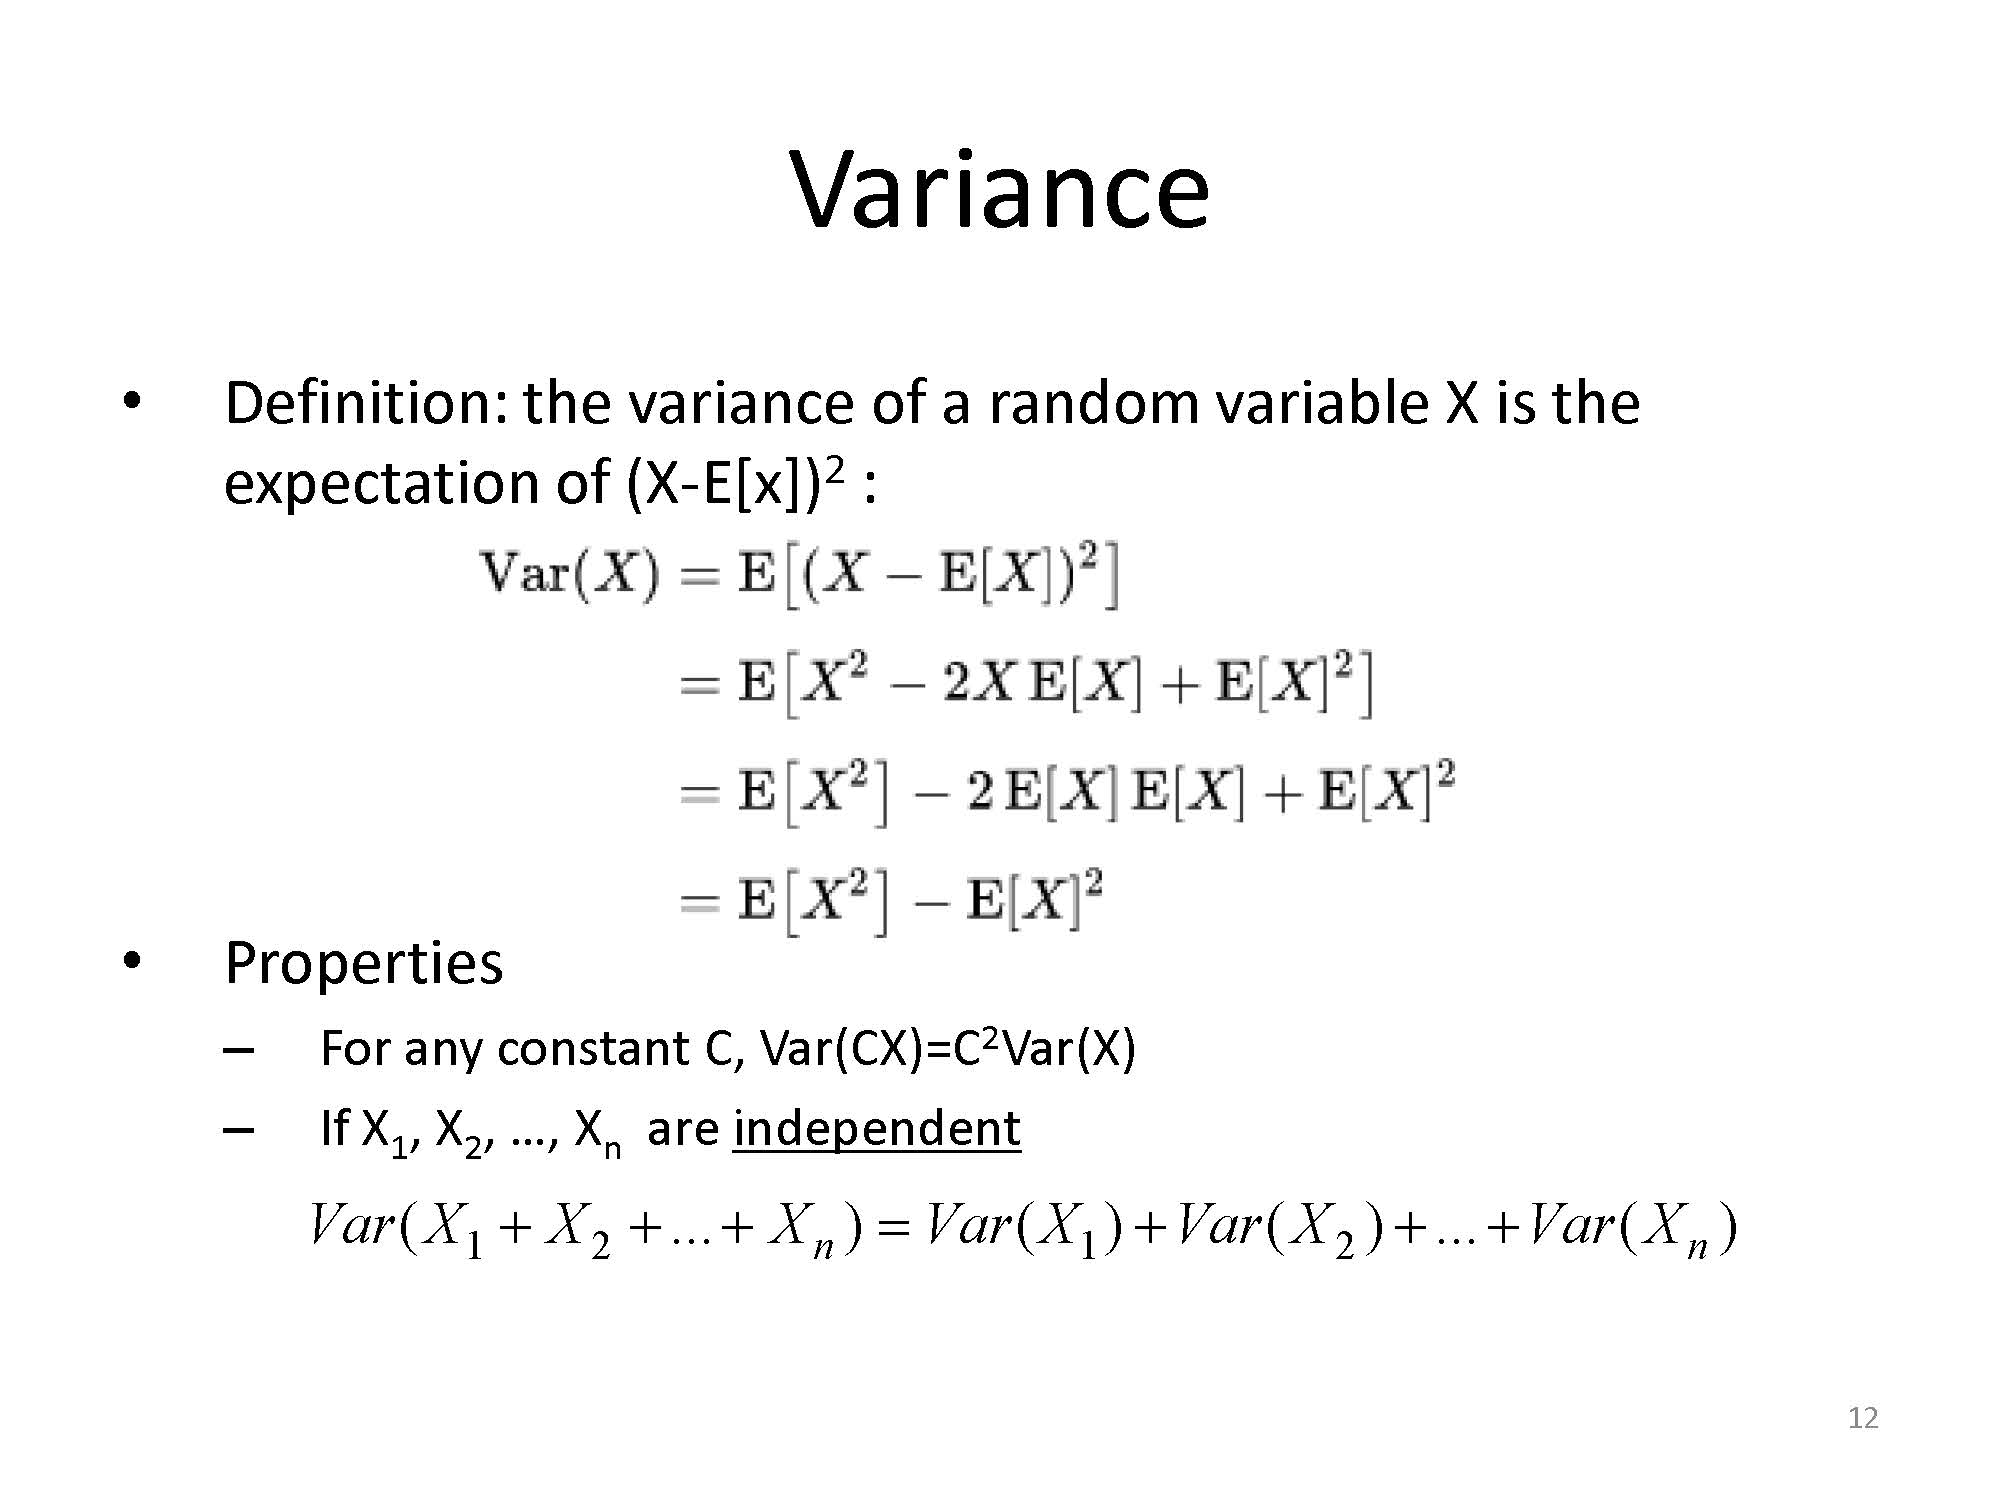
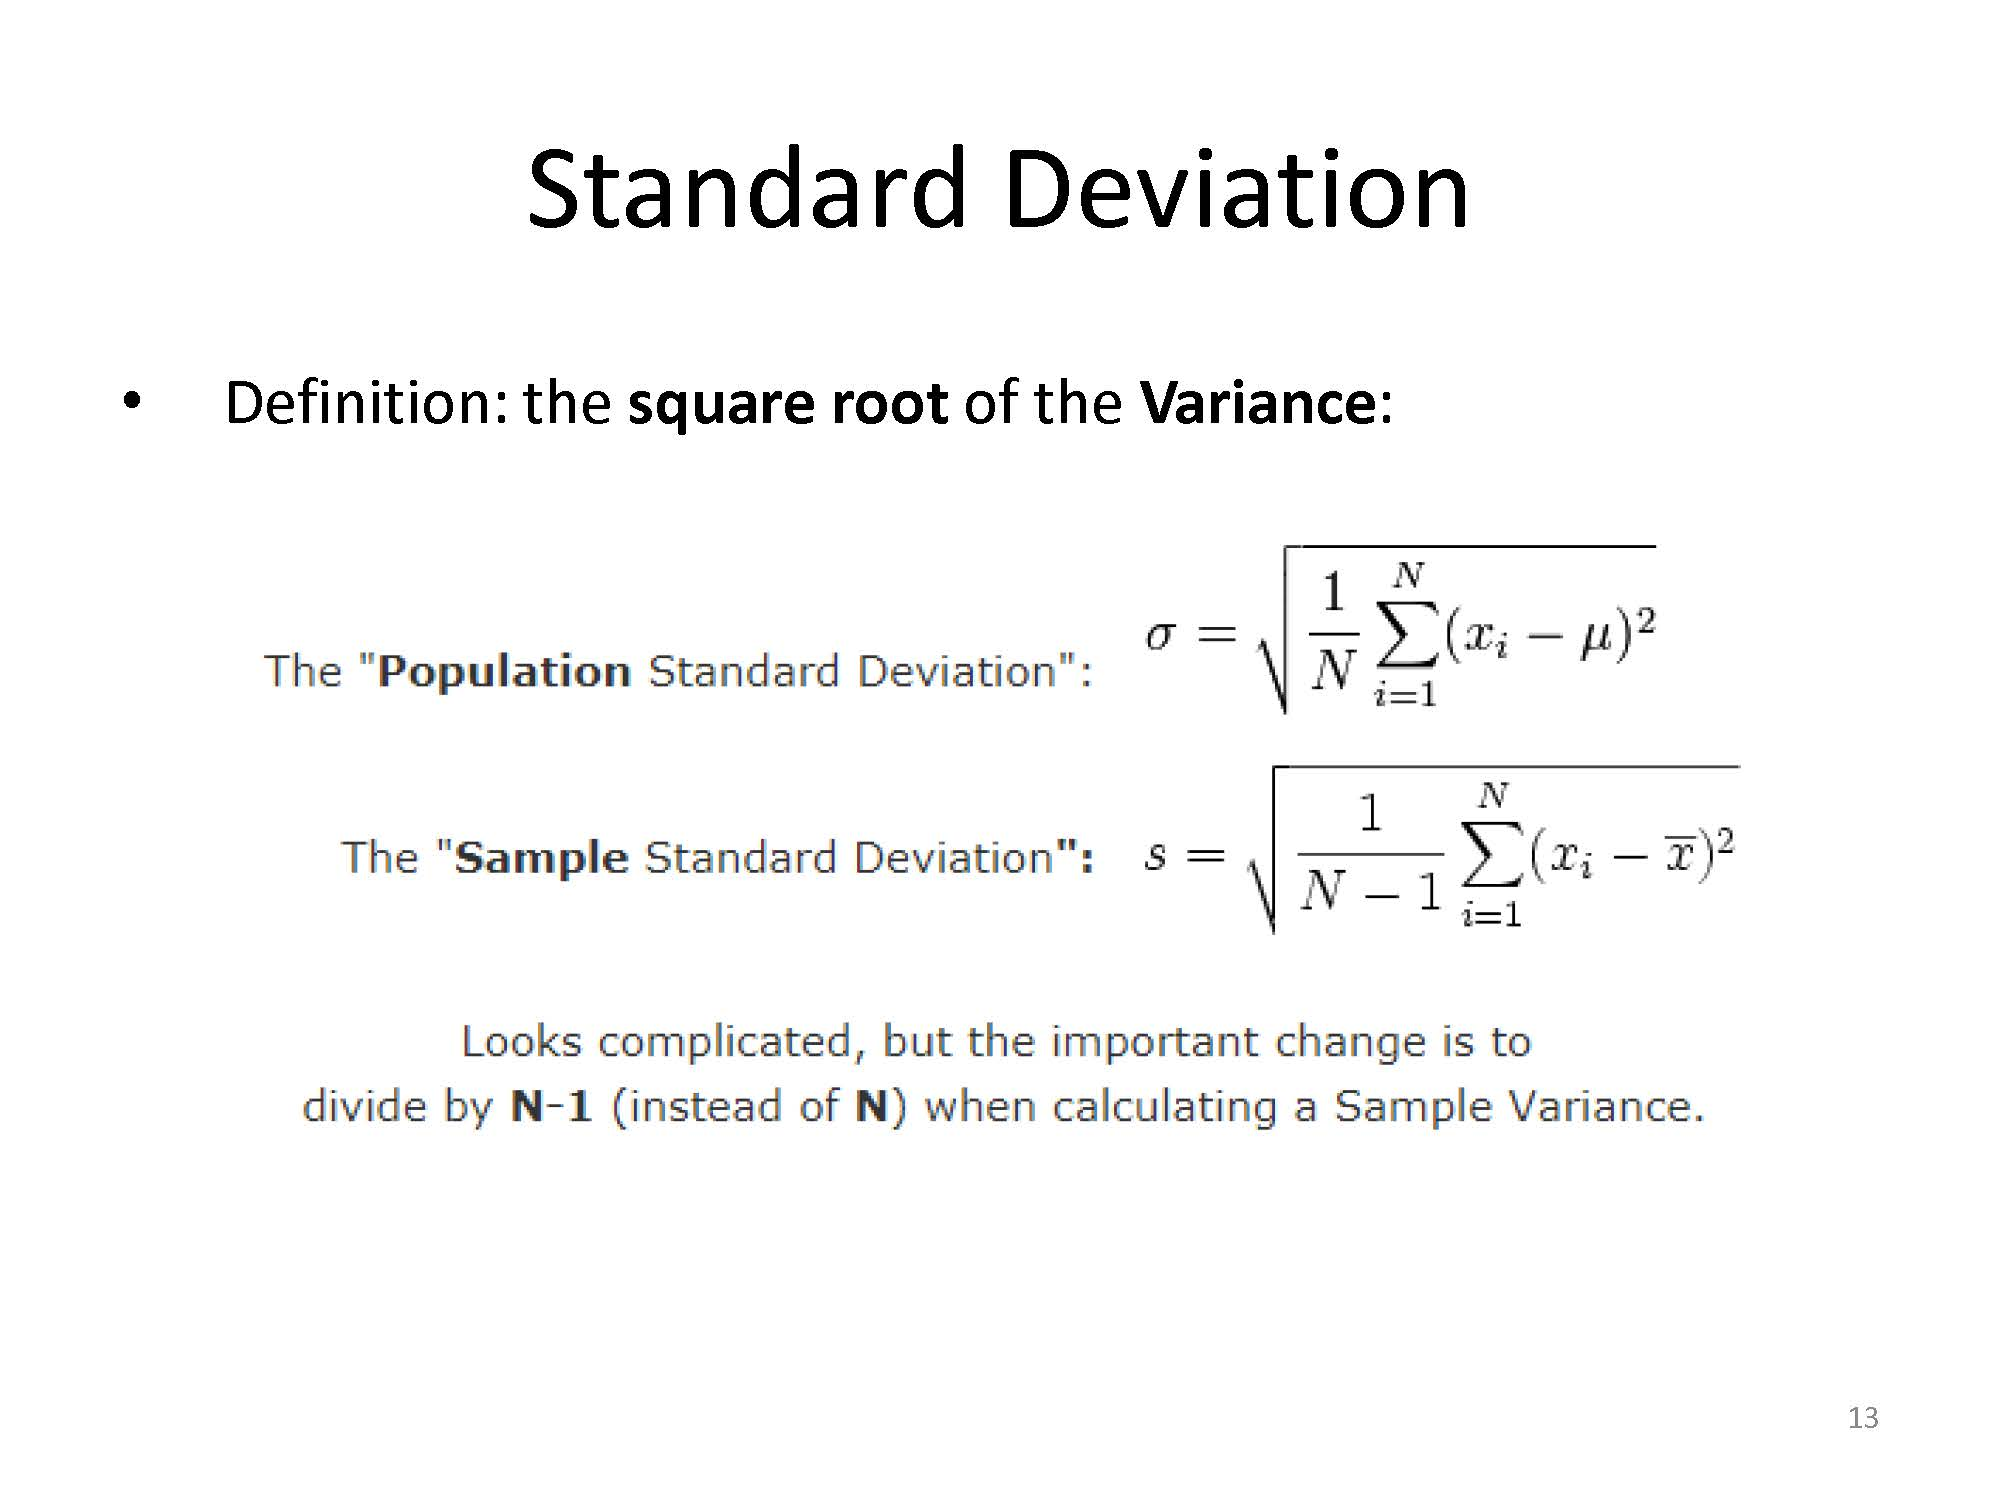

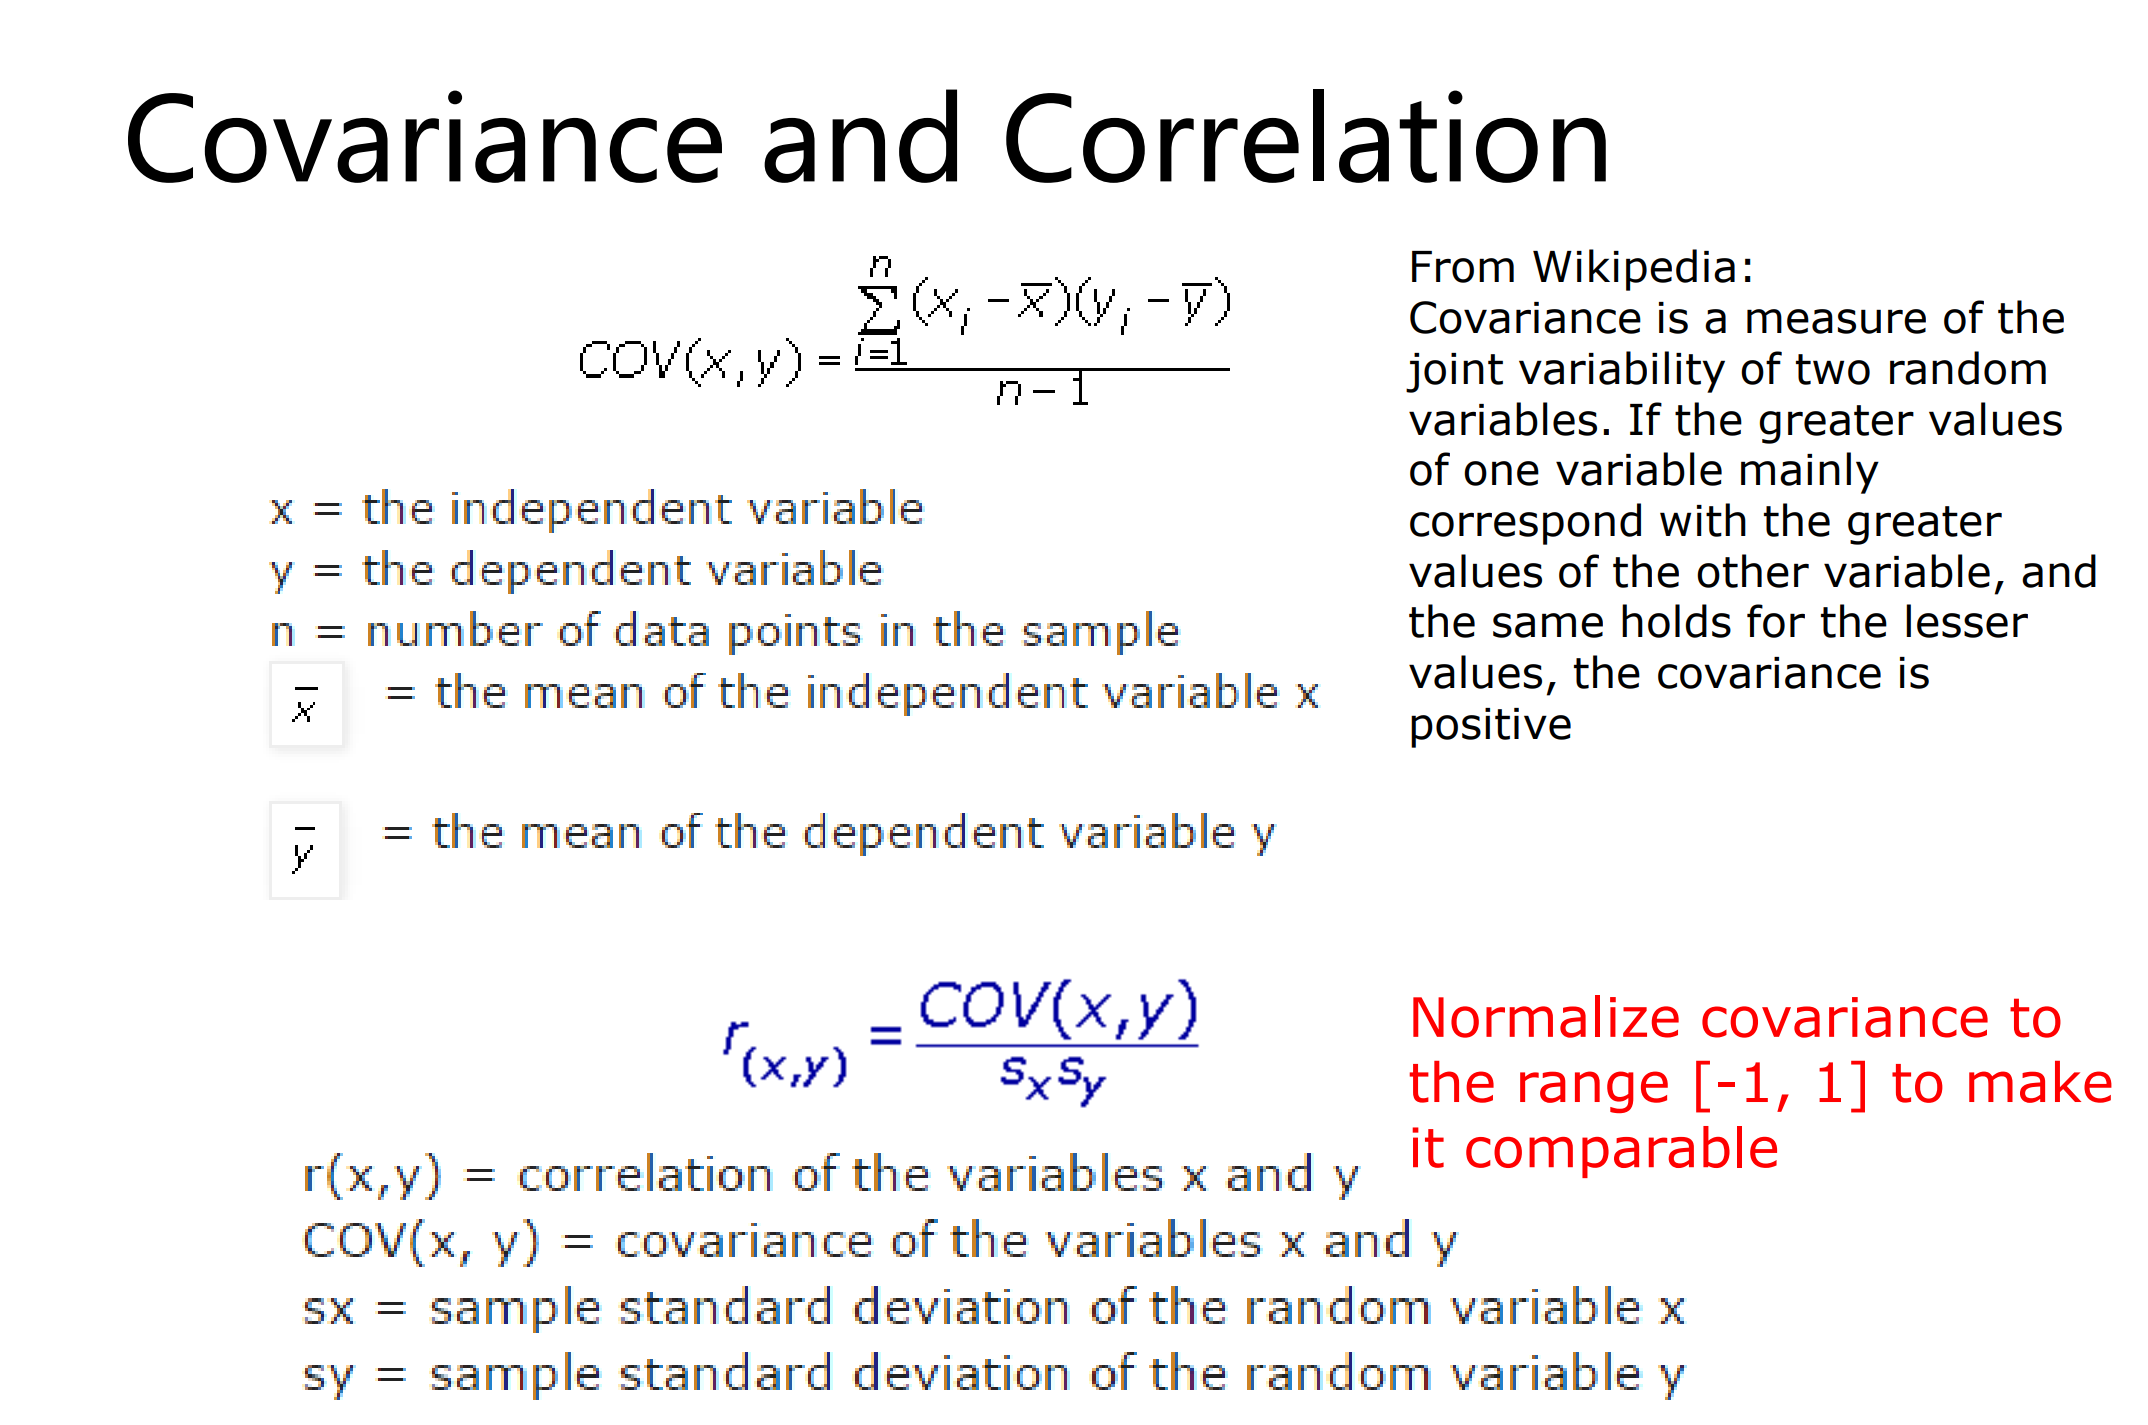

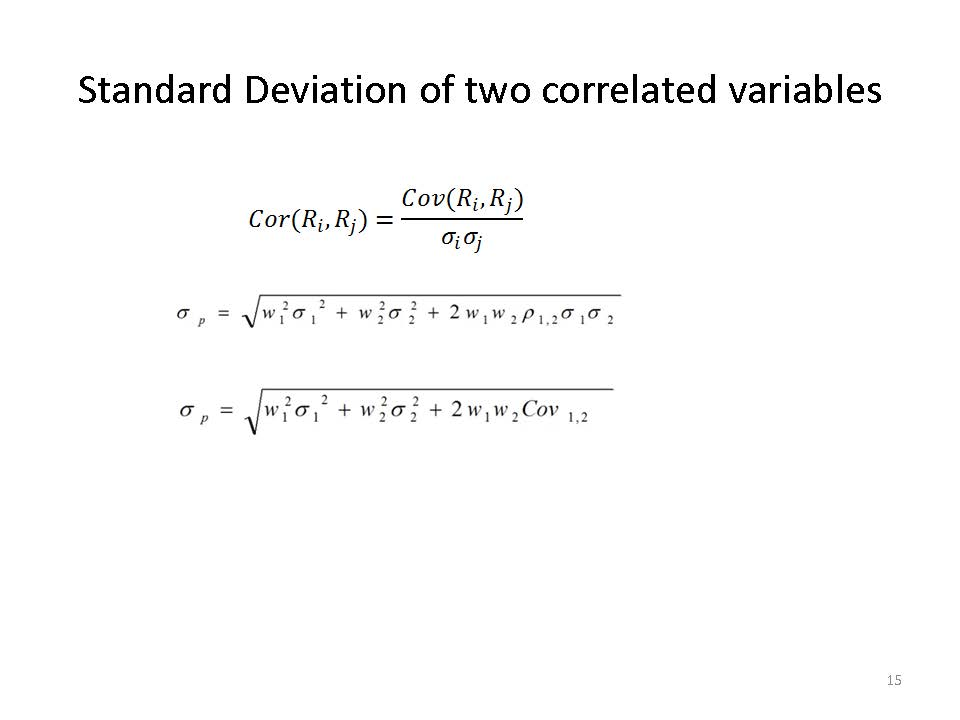
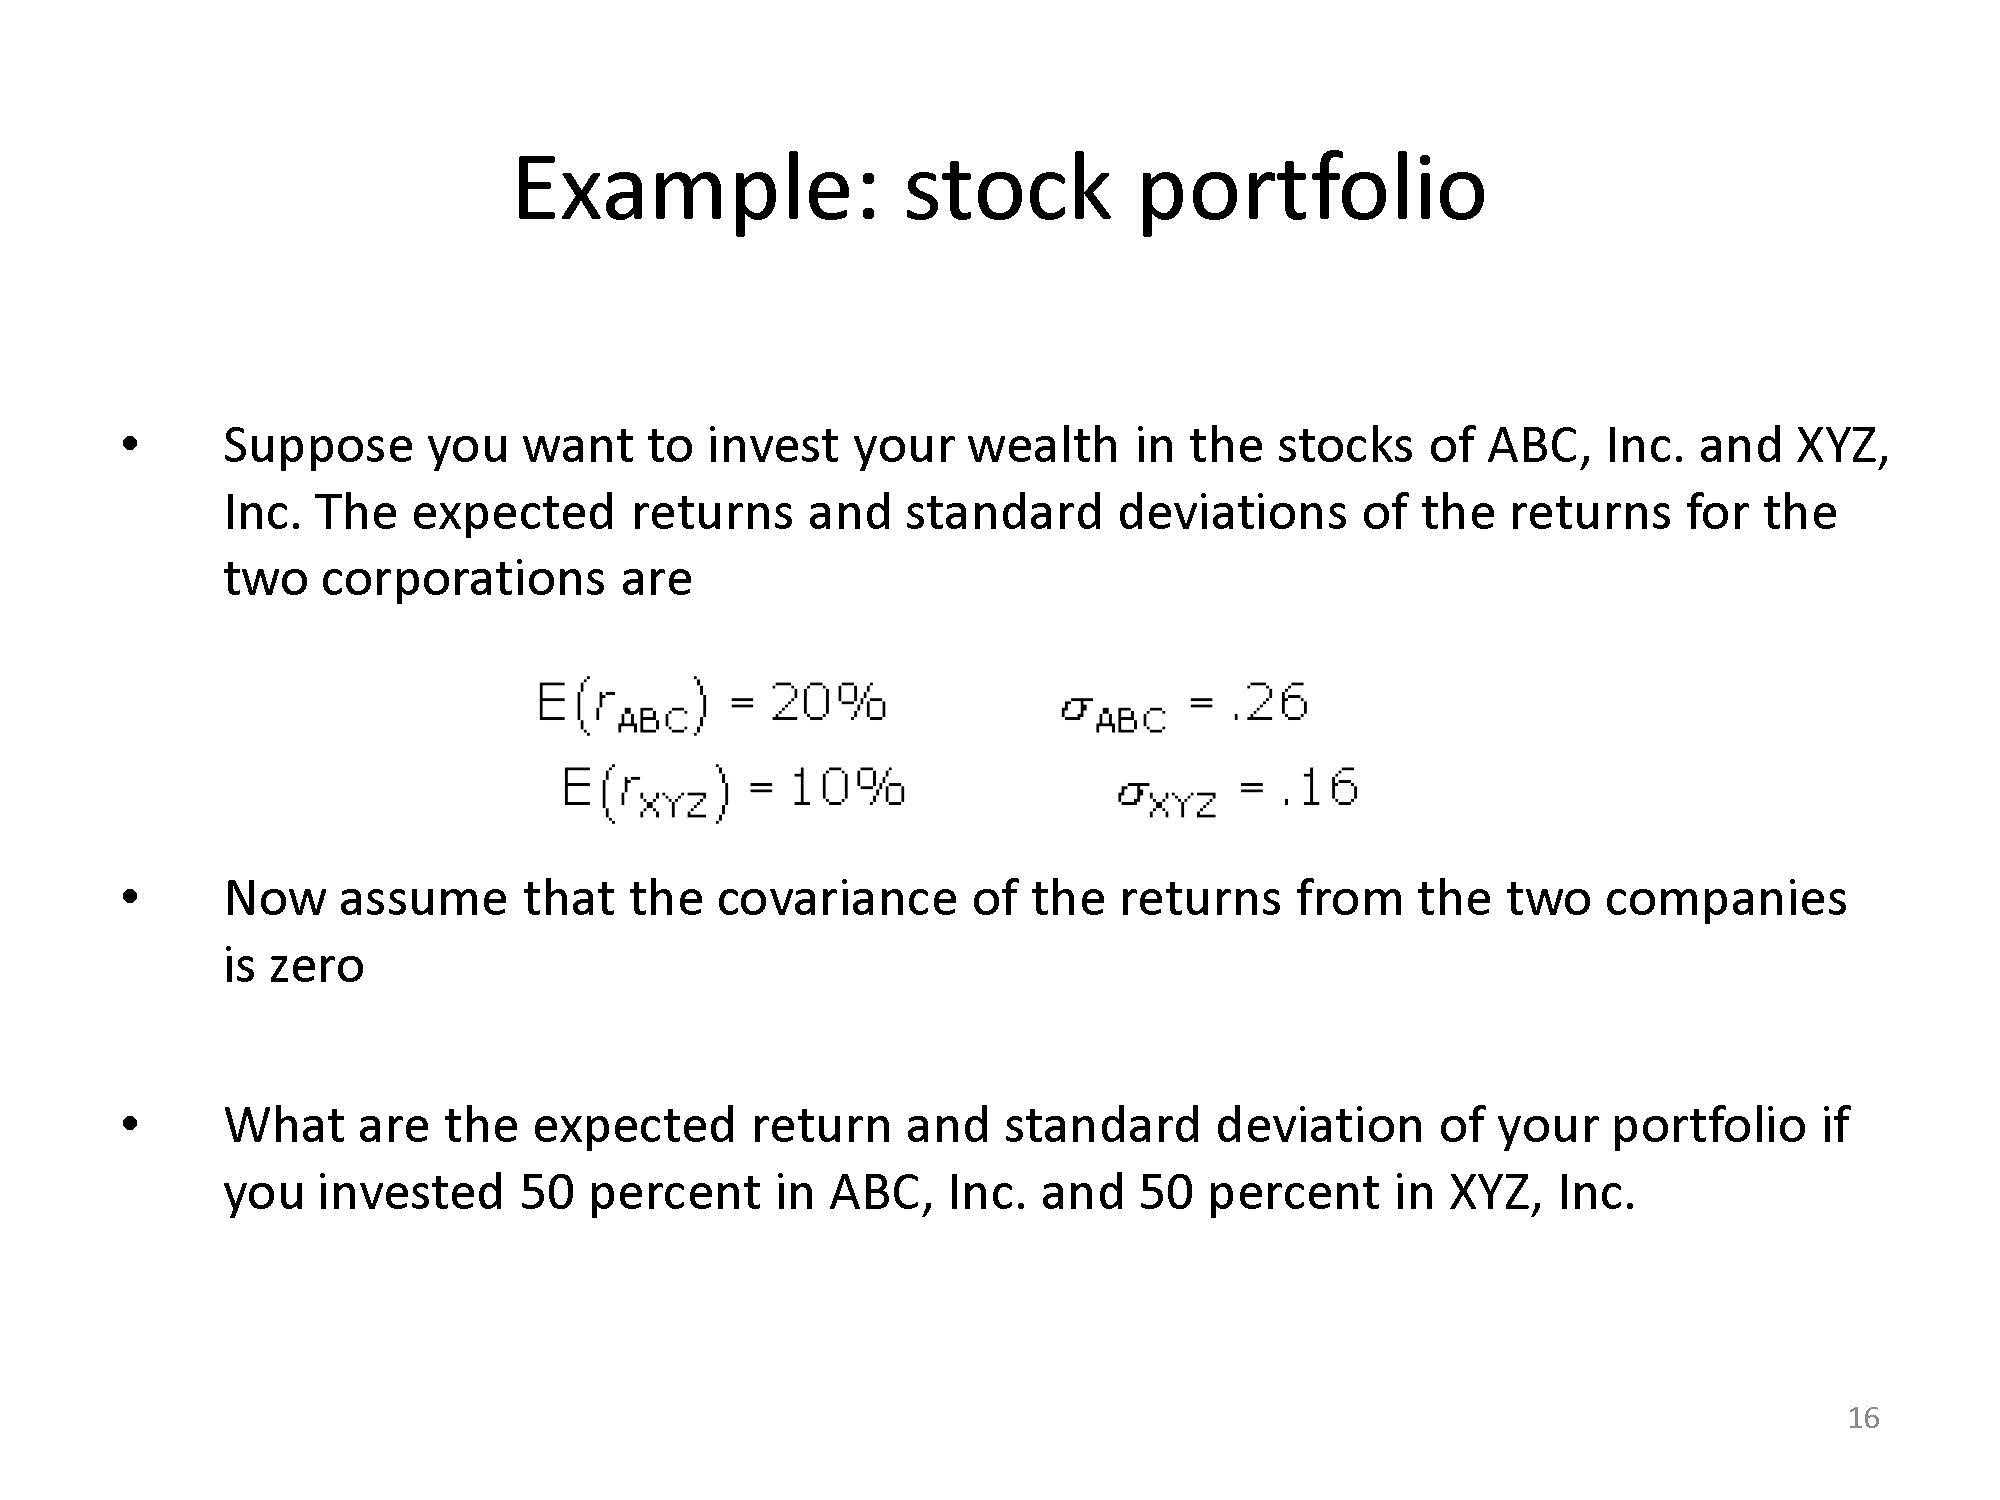
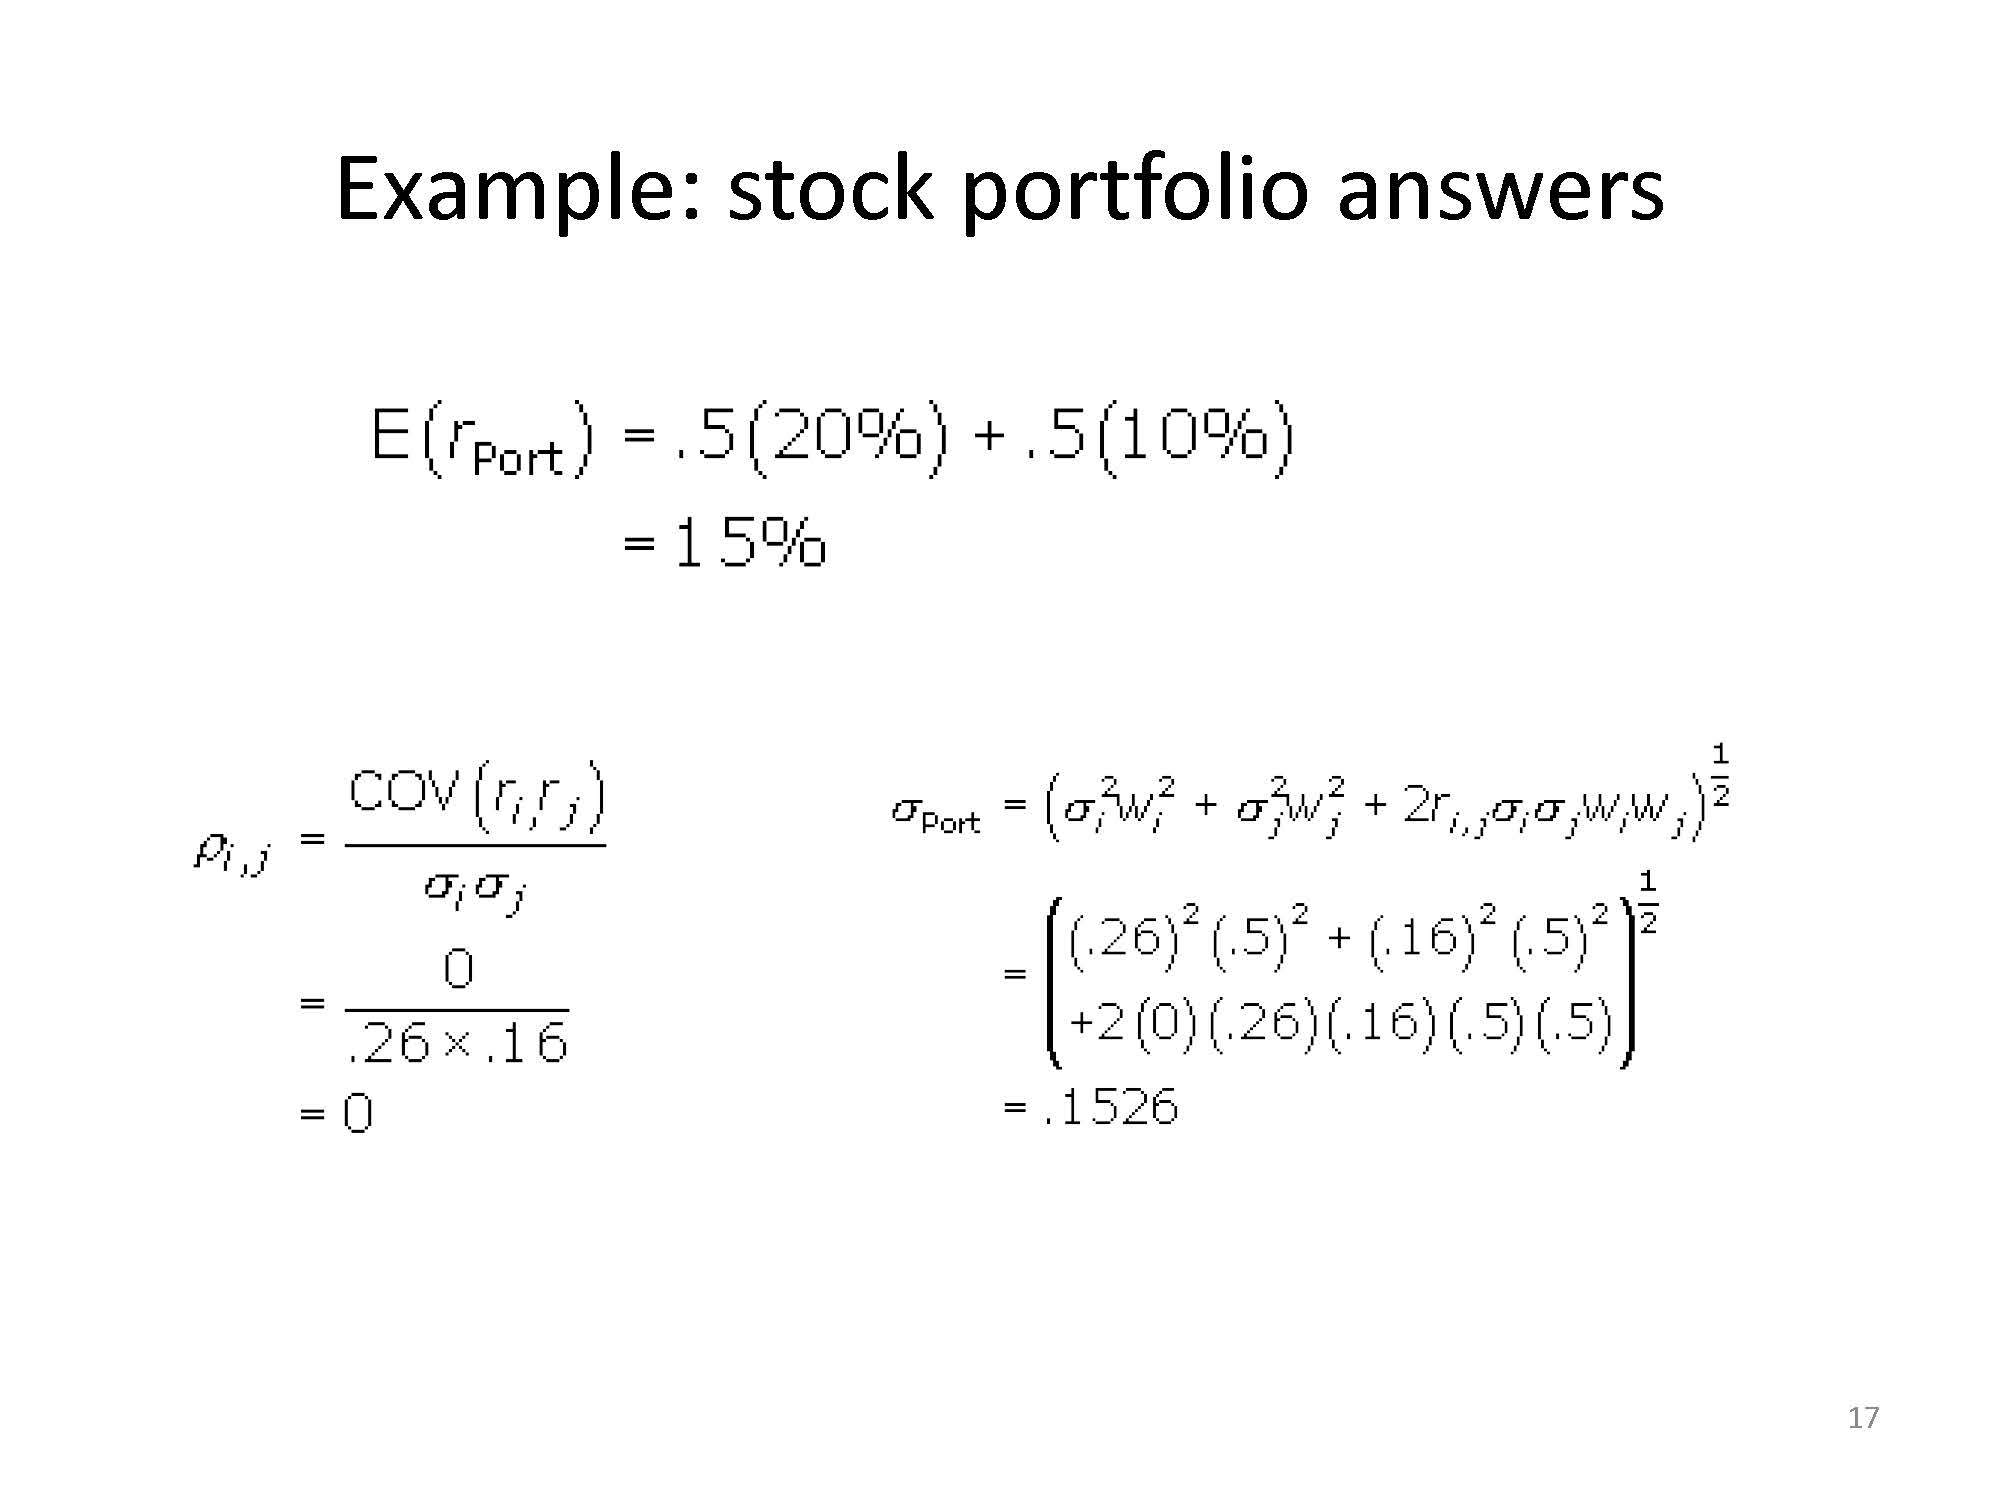

In [1]:
import warnings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,7)})

In [2]:
# Setting a seed so the example is reproducible 
np.random.seed(4272018)

df = pd.DataFrame(np.random.randint(low= 0, high= 20, size= (5, 2)), 
                  columns= ['Commercials Watched', 'Product Purchases'])

df

Commercials Watched  Product Purchases
0                   10                 13
1                   15                  0
2                    7                  7
3                    2                  4
4                   16                 11

In [3]:
# Variance is a measure of how much the data varies from the mean.
df['Commercials Watched'].var()

33.5

In [4]:
df['Product Purchases'].var()

27.5

In [5]:
# Covariance is a measure of relationship between 2 variables. It measures the degree of change in the variables, 
# i.e. when one variable changes, will there be the same/a similar change in the other variable.
df[['Commercials Watched', 'Product Purchases']].cov()

Commercials Watched  Product Purchases
Commercials Watched                33.50               3.25
Product Purchases                   3.25              27.50

In [6]:
df[['Commercials Watched', 'Commercials Watched']].cov()

Commercials Watched  Commercials Watched
Commercials Watched                 33.5                 33.5
Commercials Watched                 33.5                 33.5

In [7]:
# The measure of correlation overcomes the scale dependency of covariance by standardizing the measures. 
# Standardizing measures makes it so the variables are on the same scale of measurement. 
# The values are standardized which converts them into Z-scores. A Z-score is a standardized measure which measures variability from the mean.
df[['Commercials Watched', 'Product Purchases']].corr()

Commercials Watched  Product Purchases
Commercials Watched             1.000000           0.107077
Product Purchases               0.107077           1.000000

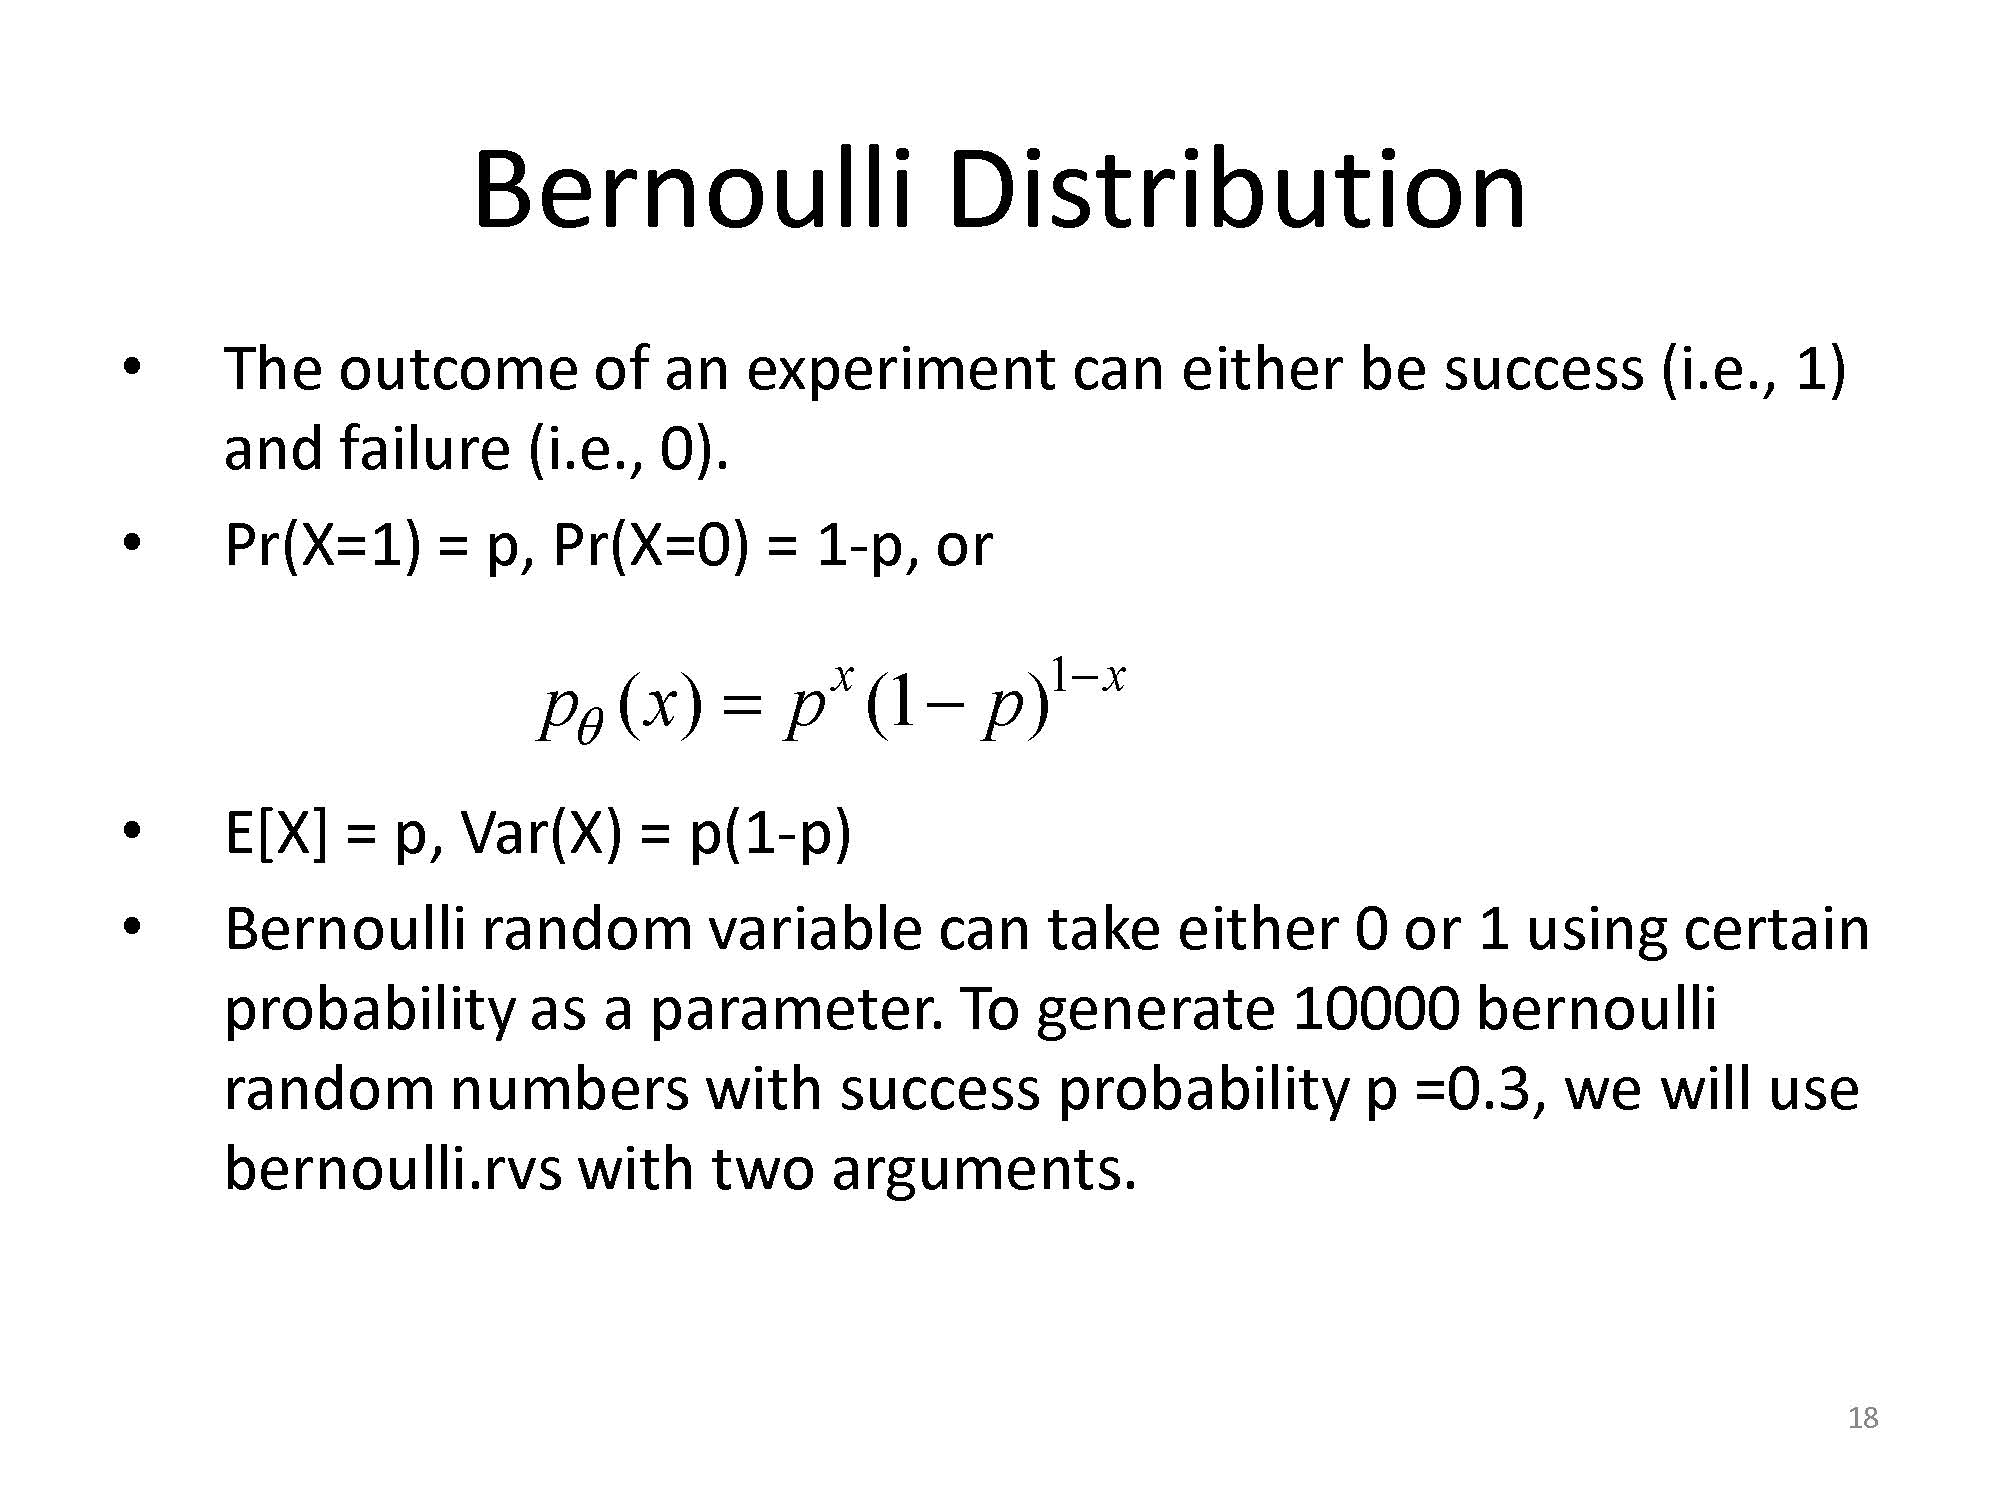

[Text(0.5, 0, 'Bernoulli'), Text(0, 0.5, 'Frequency')]

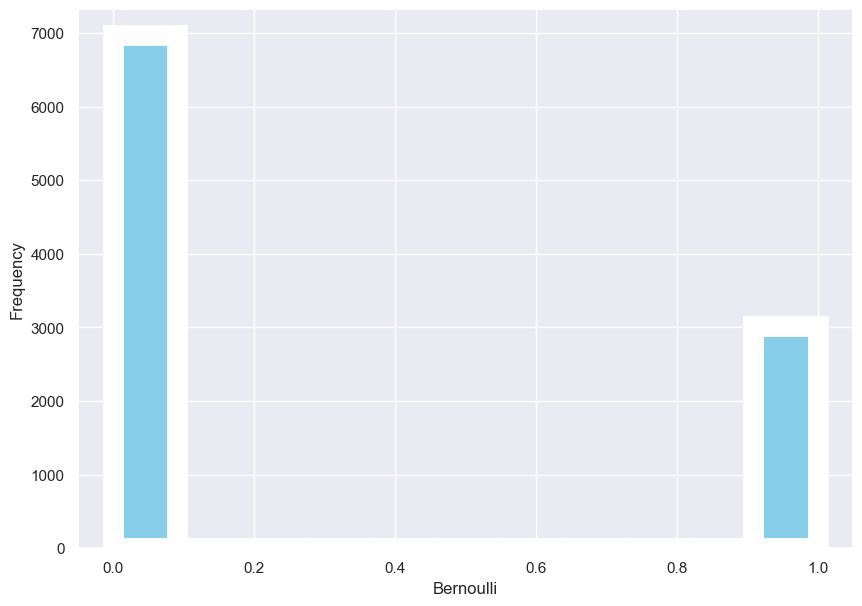

In [8]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')

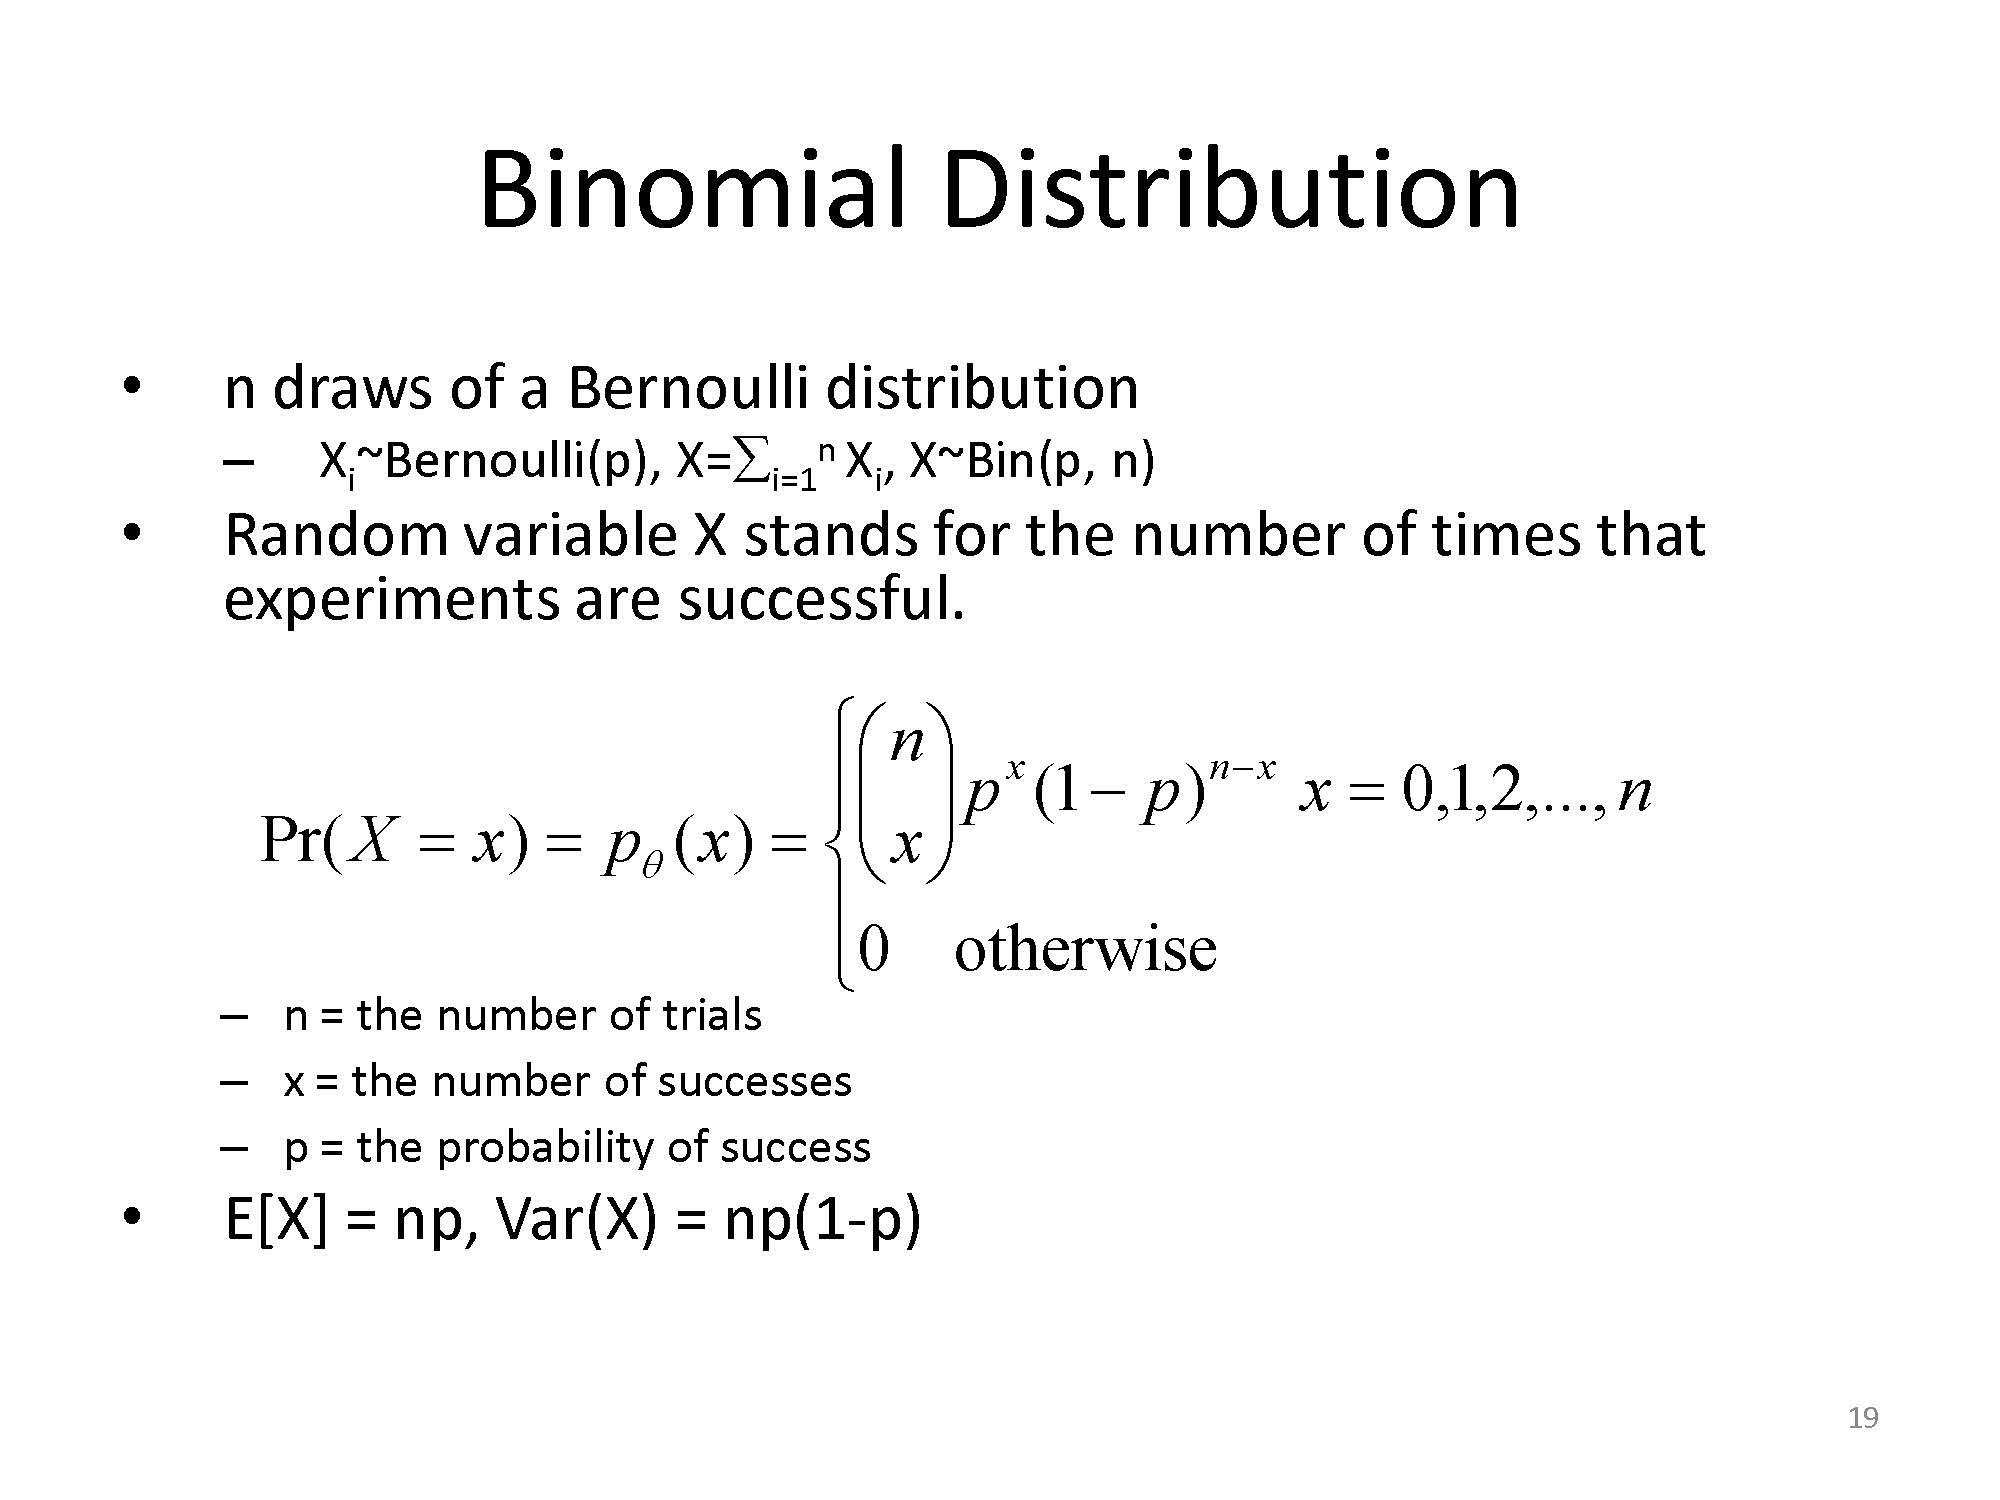

In [9]:
# Binomial distribution is a discrete probability distributionlike Bernoulli. 
# It can be used to obtain the number of successes from N Bernoulli trials. 
# For example, to find the number of successes in 7 Bernoulli trials with p =0.5, we will use

from scipy.stats import binom
binom.rvs(n=7,p=0.5)

2

In [10]:
# We can also use binom.rvs to repeat the trials with size argument. If we want to repeat 5 times, we will use
binom.rvs(size=5,n=7,p=0.5)

array([7, 4, 4, 4, 3], dtype=int64)

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

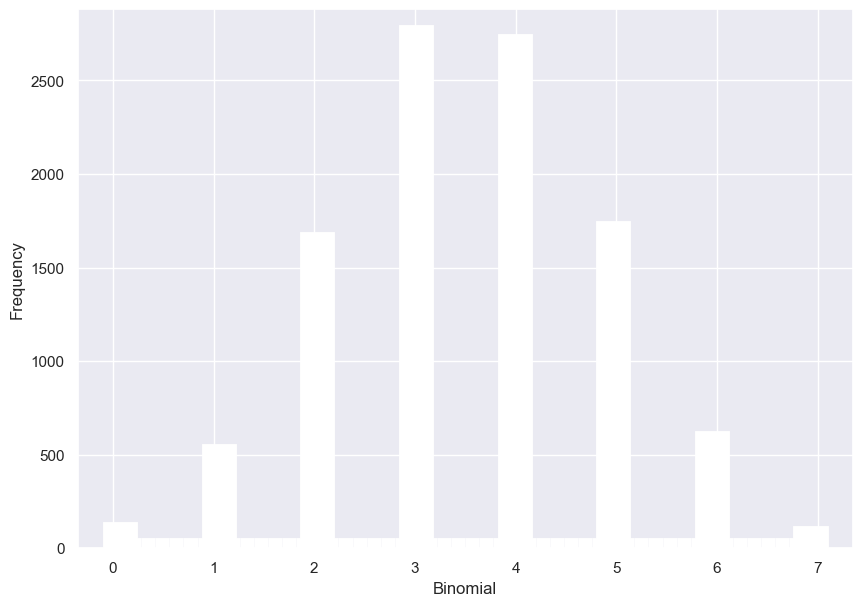

In [11]:
# Let us generate 10000 from binomial distribution and plot the distribution.
data_binom = binom.rvs(n=7,p=0.5,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

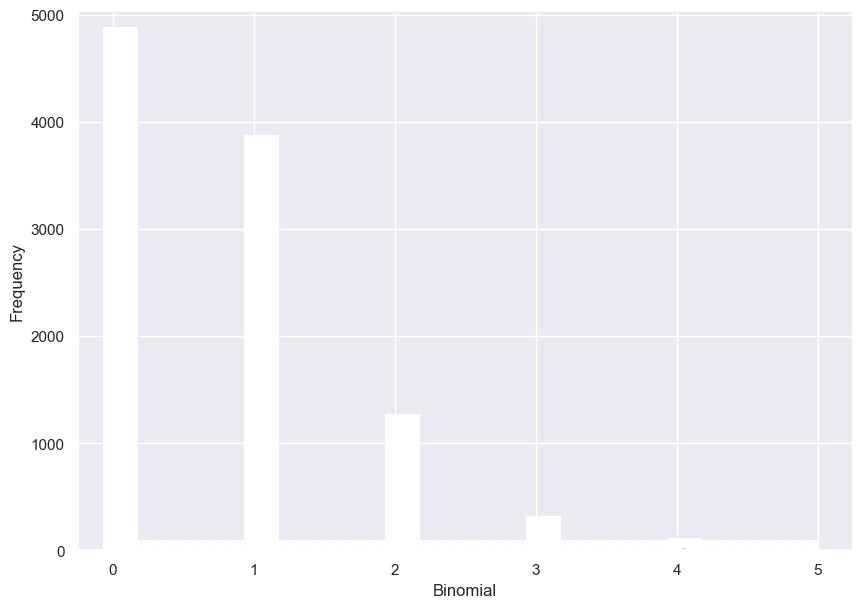

In [12]:
# What if p != 0.5

data_binom = binom.rvs(n=7,p=0.1,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

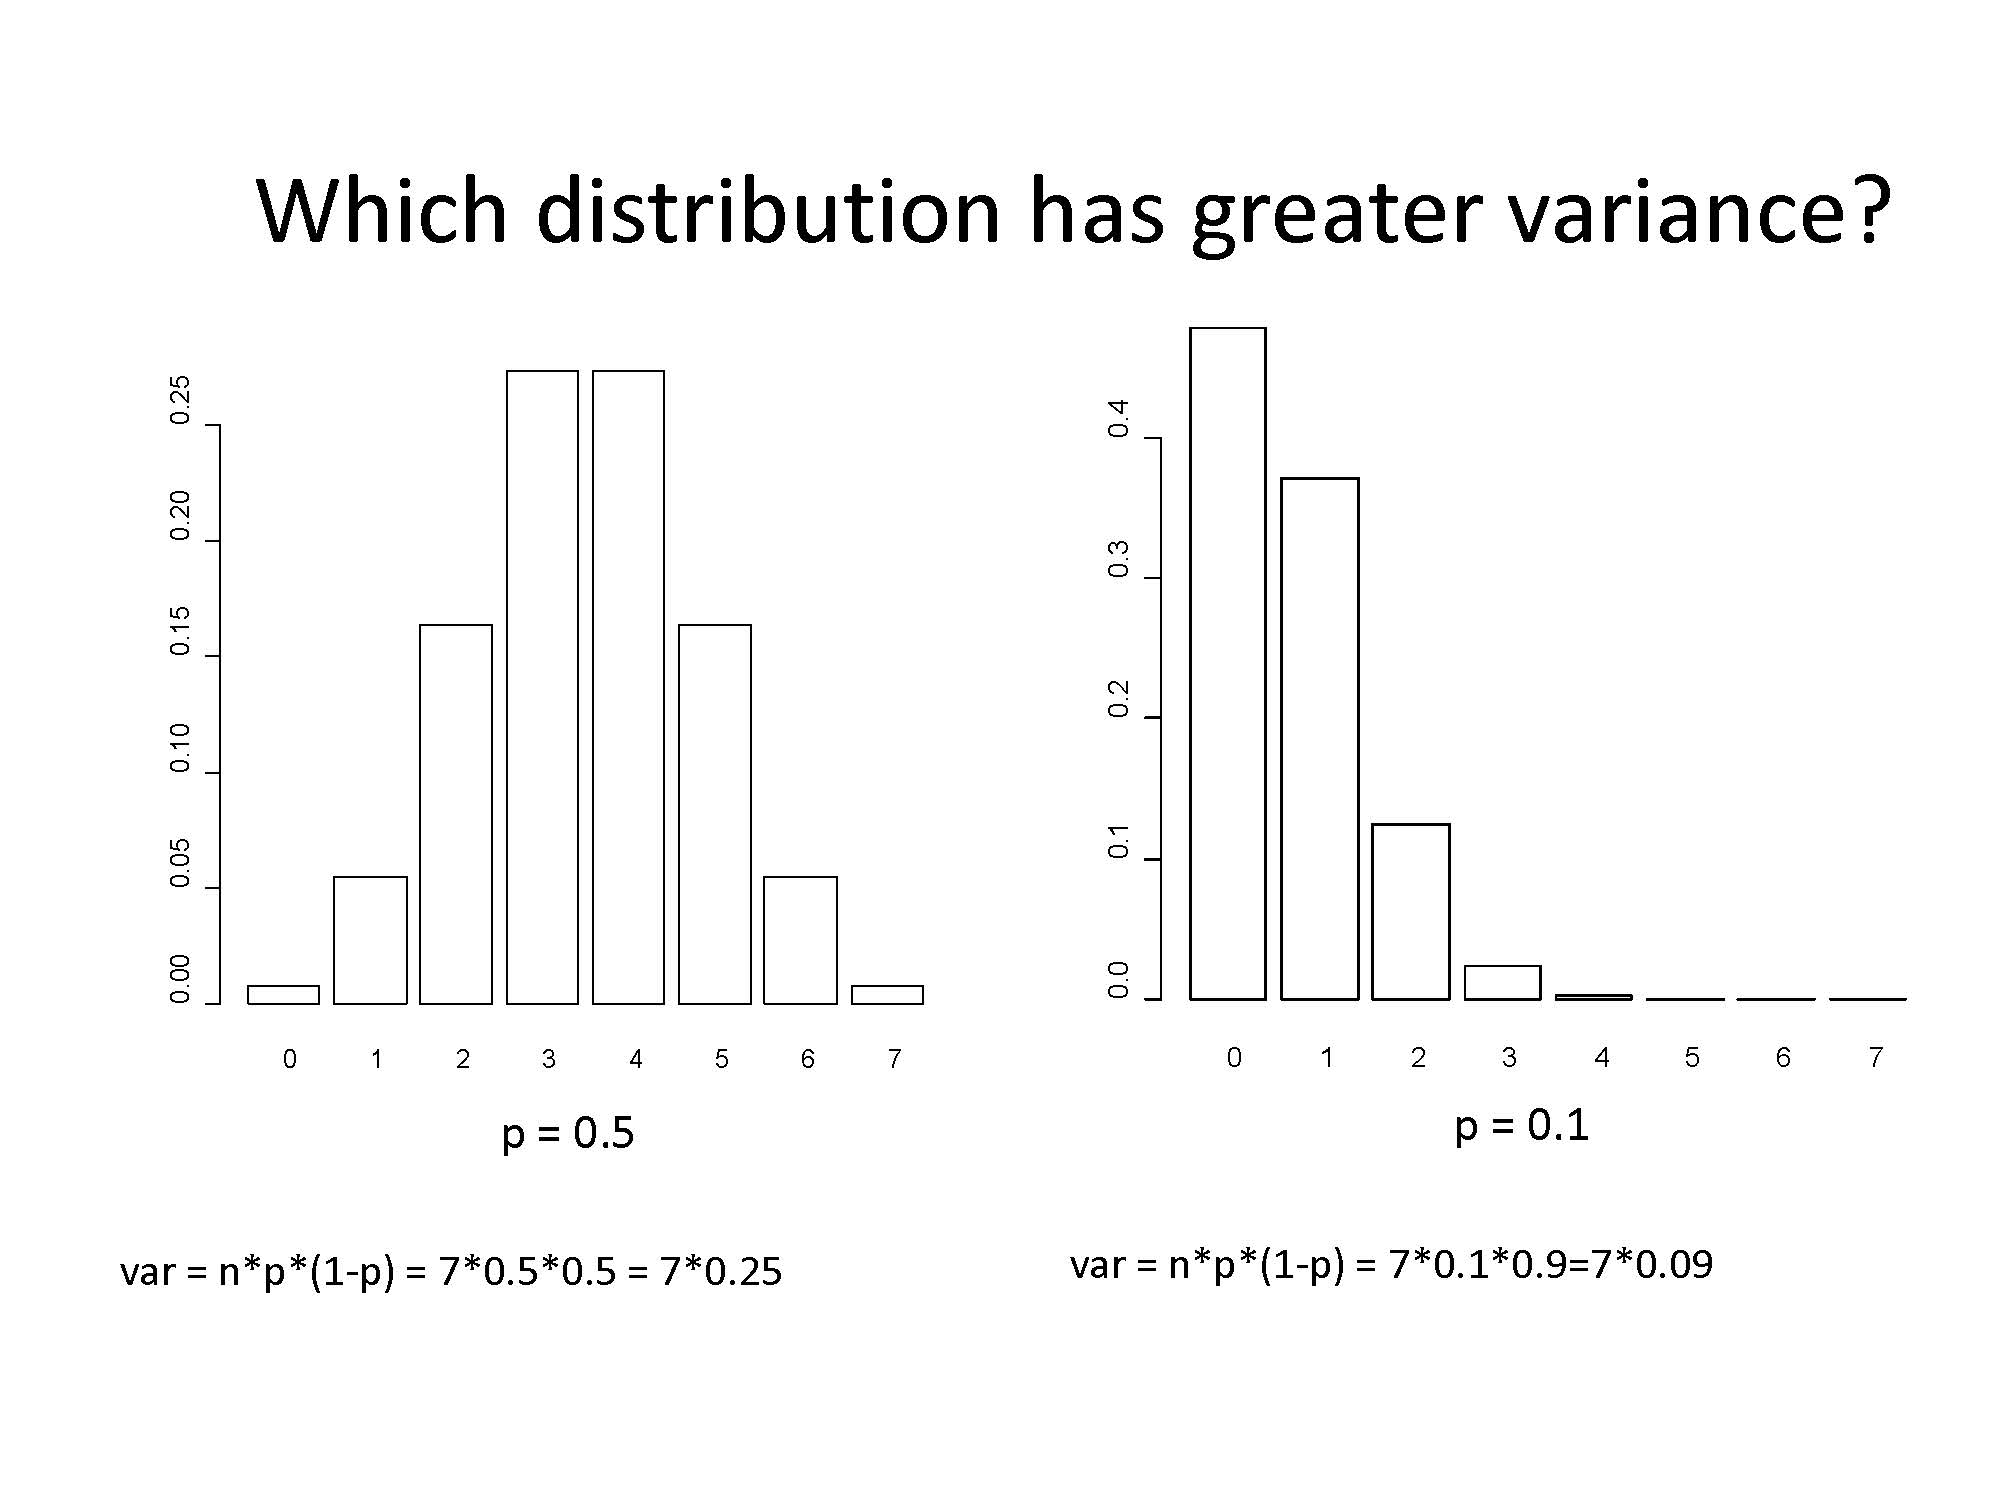
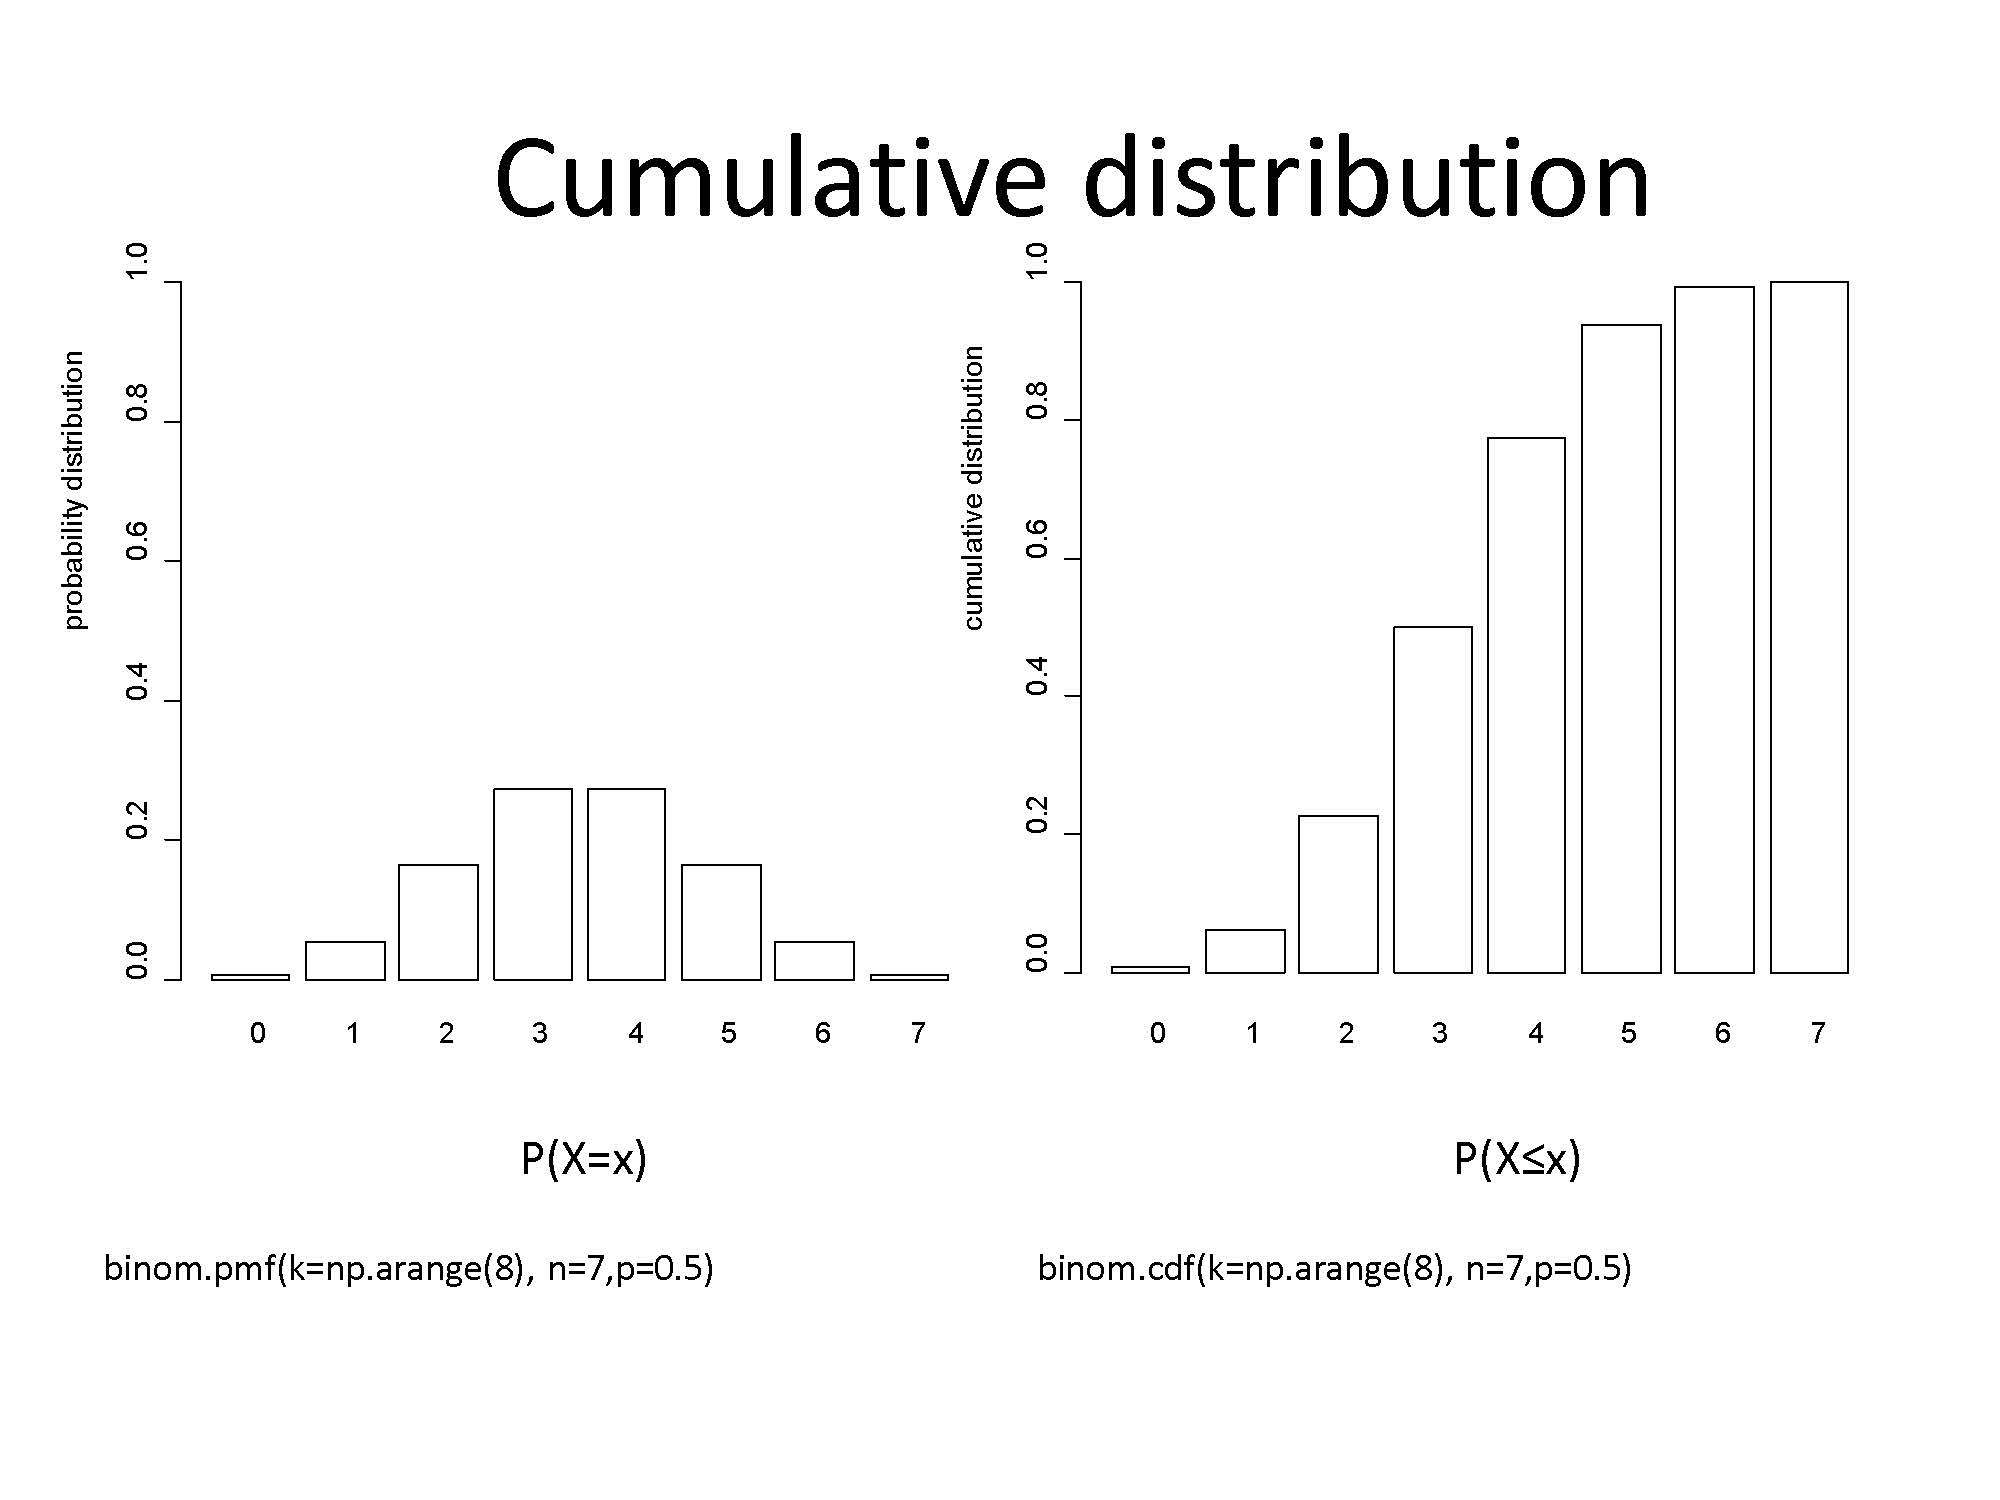

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Probability')]

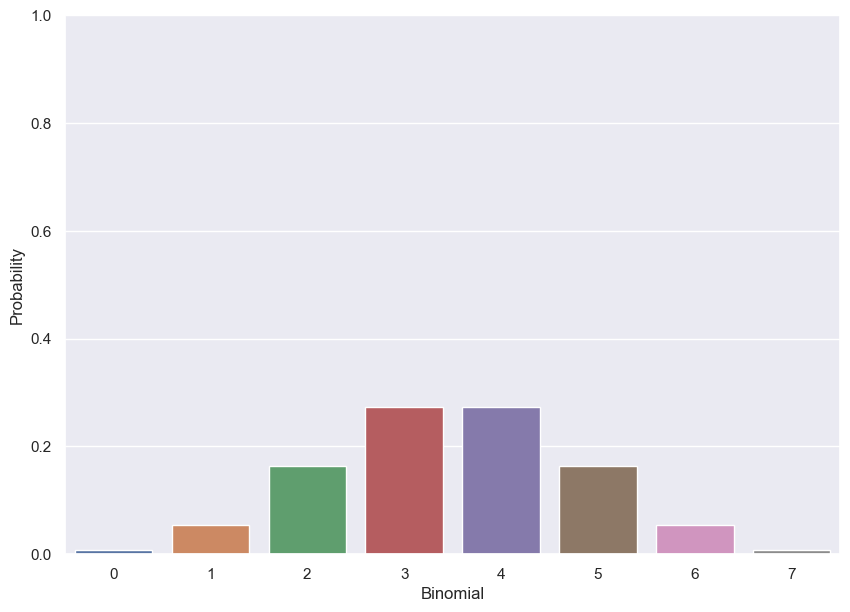

In [13]:
#probability mass function, i.e., probability density function on discrete values
data_binom = binom.pmf(k=np.arange(8), n=7,p=0.5)
# print(data_binom)
ax = sns.barplot(x='x',
                 y='y',
                 data={'x': np.arange(8), 'y':data_binom})
ax.set(ylim=(0, 1))
ax.set(xlabel='Binomial', ylabel='Probability')

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Probability')]

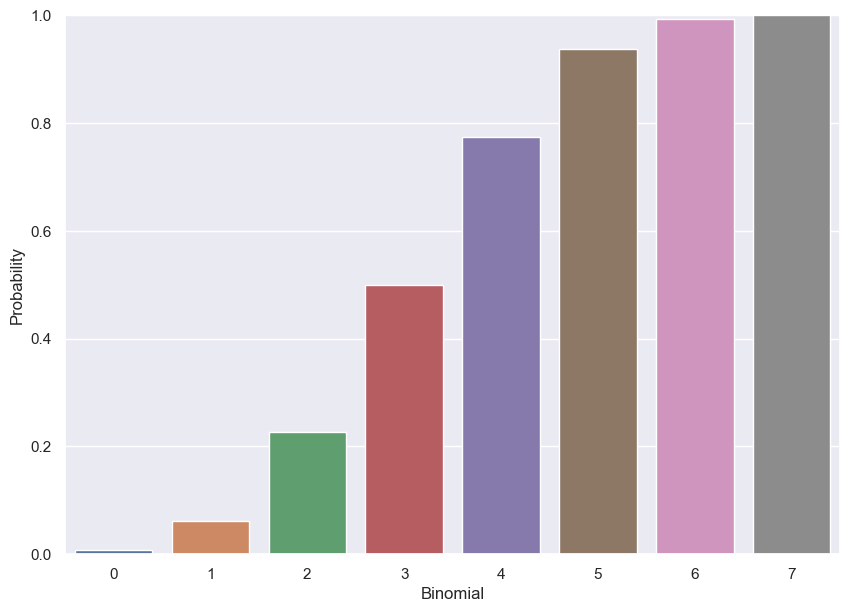

In [14]:
# cumulative density function

data_binom = binom.cdf(k=np.arange(8), n=7,p=0.5)
ax = sns.barplot(x='x',
                 y='y',
                 data={'x': np.arange(8), 'y':data_binom})
ax.set(ylim=(0, 1))
ax.set(xlabel='Binomial', ylabel='Probability')

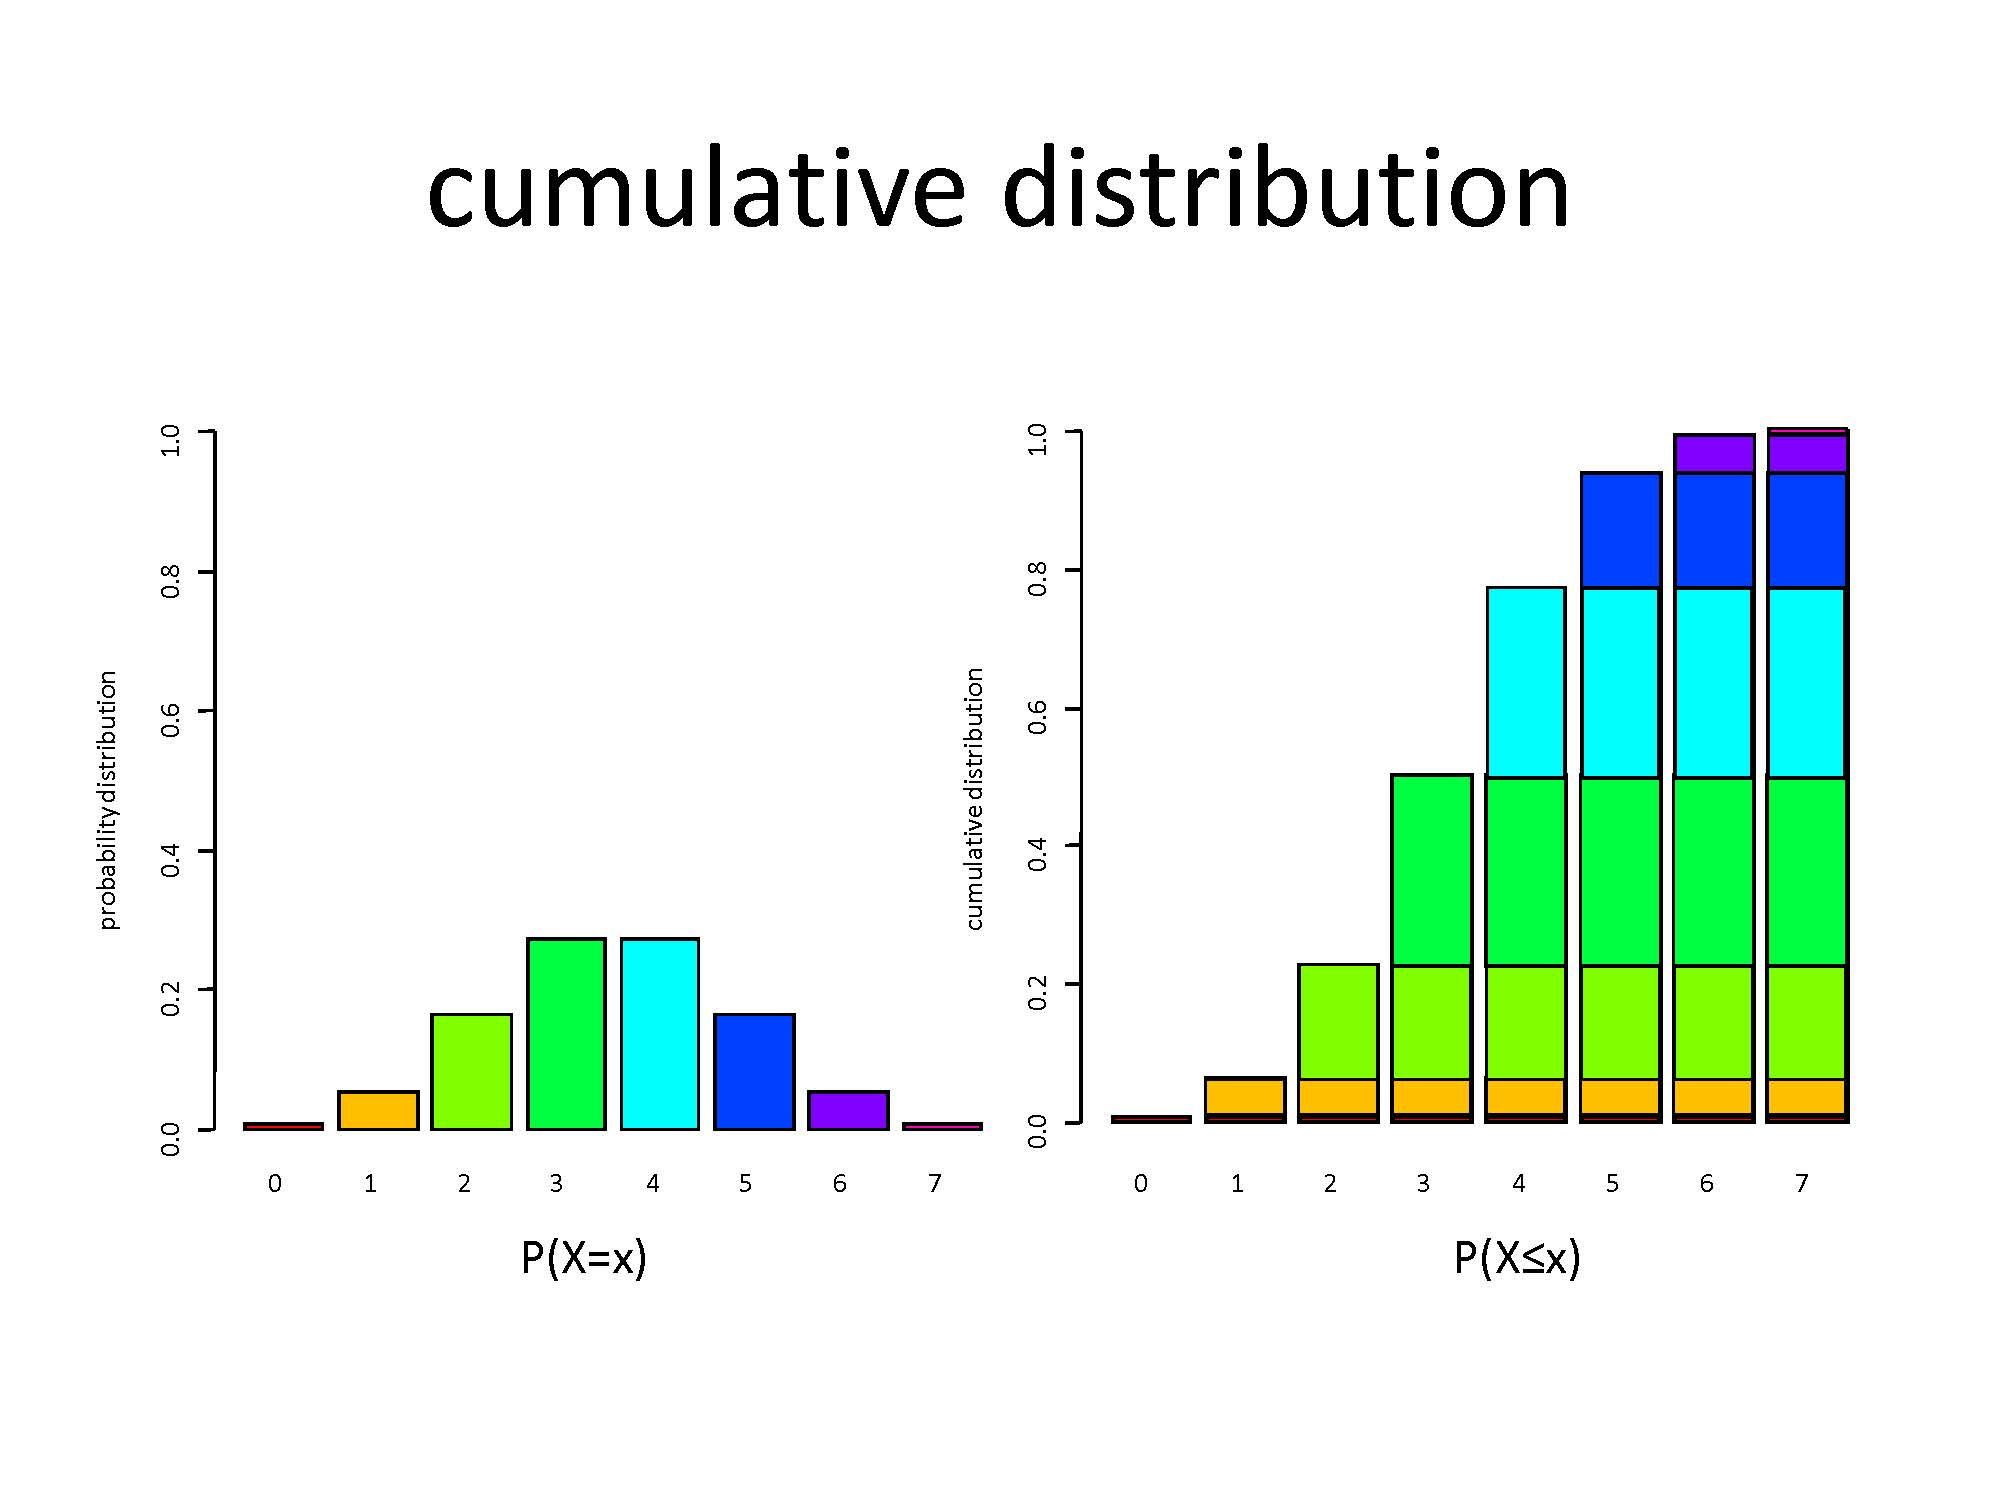
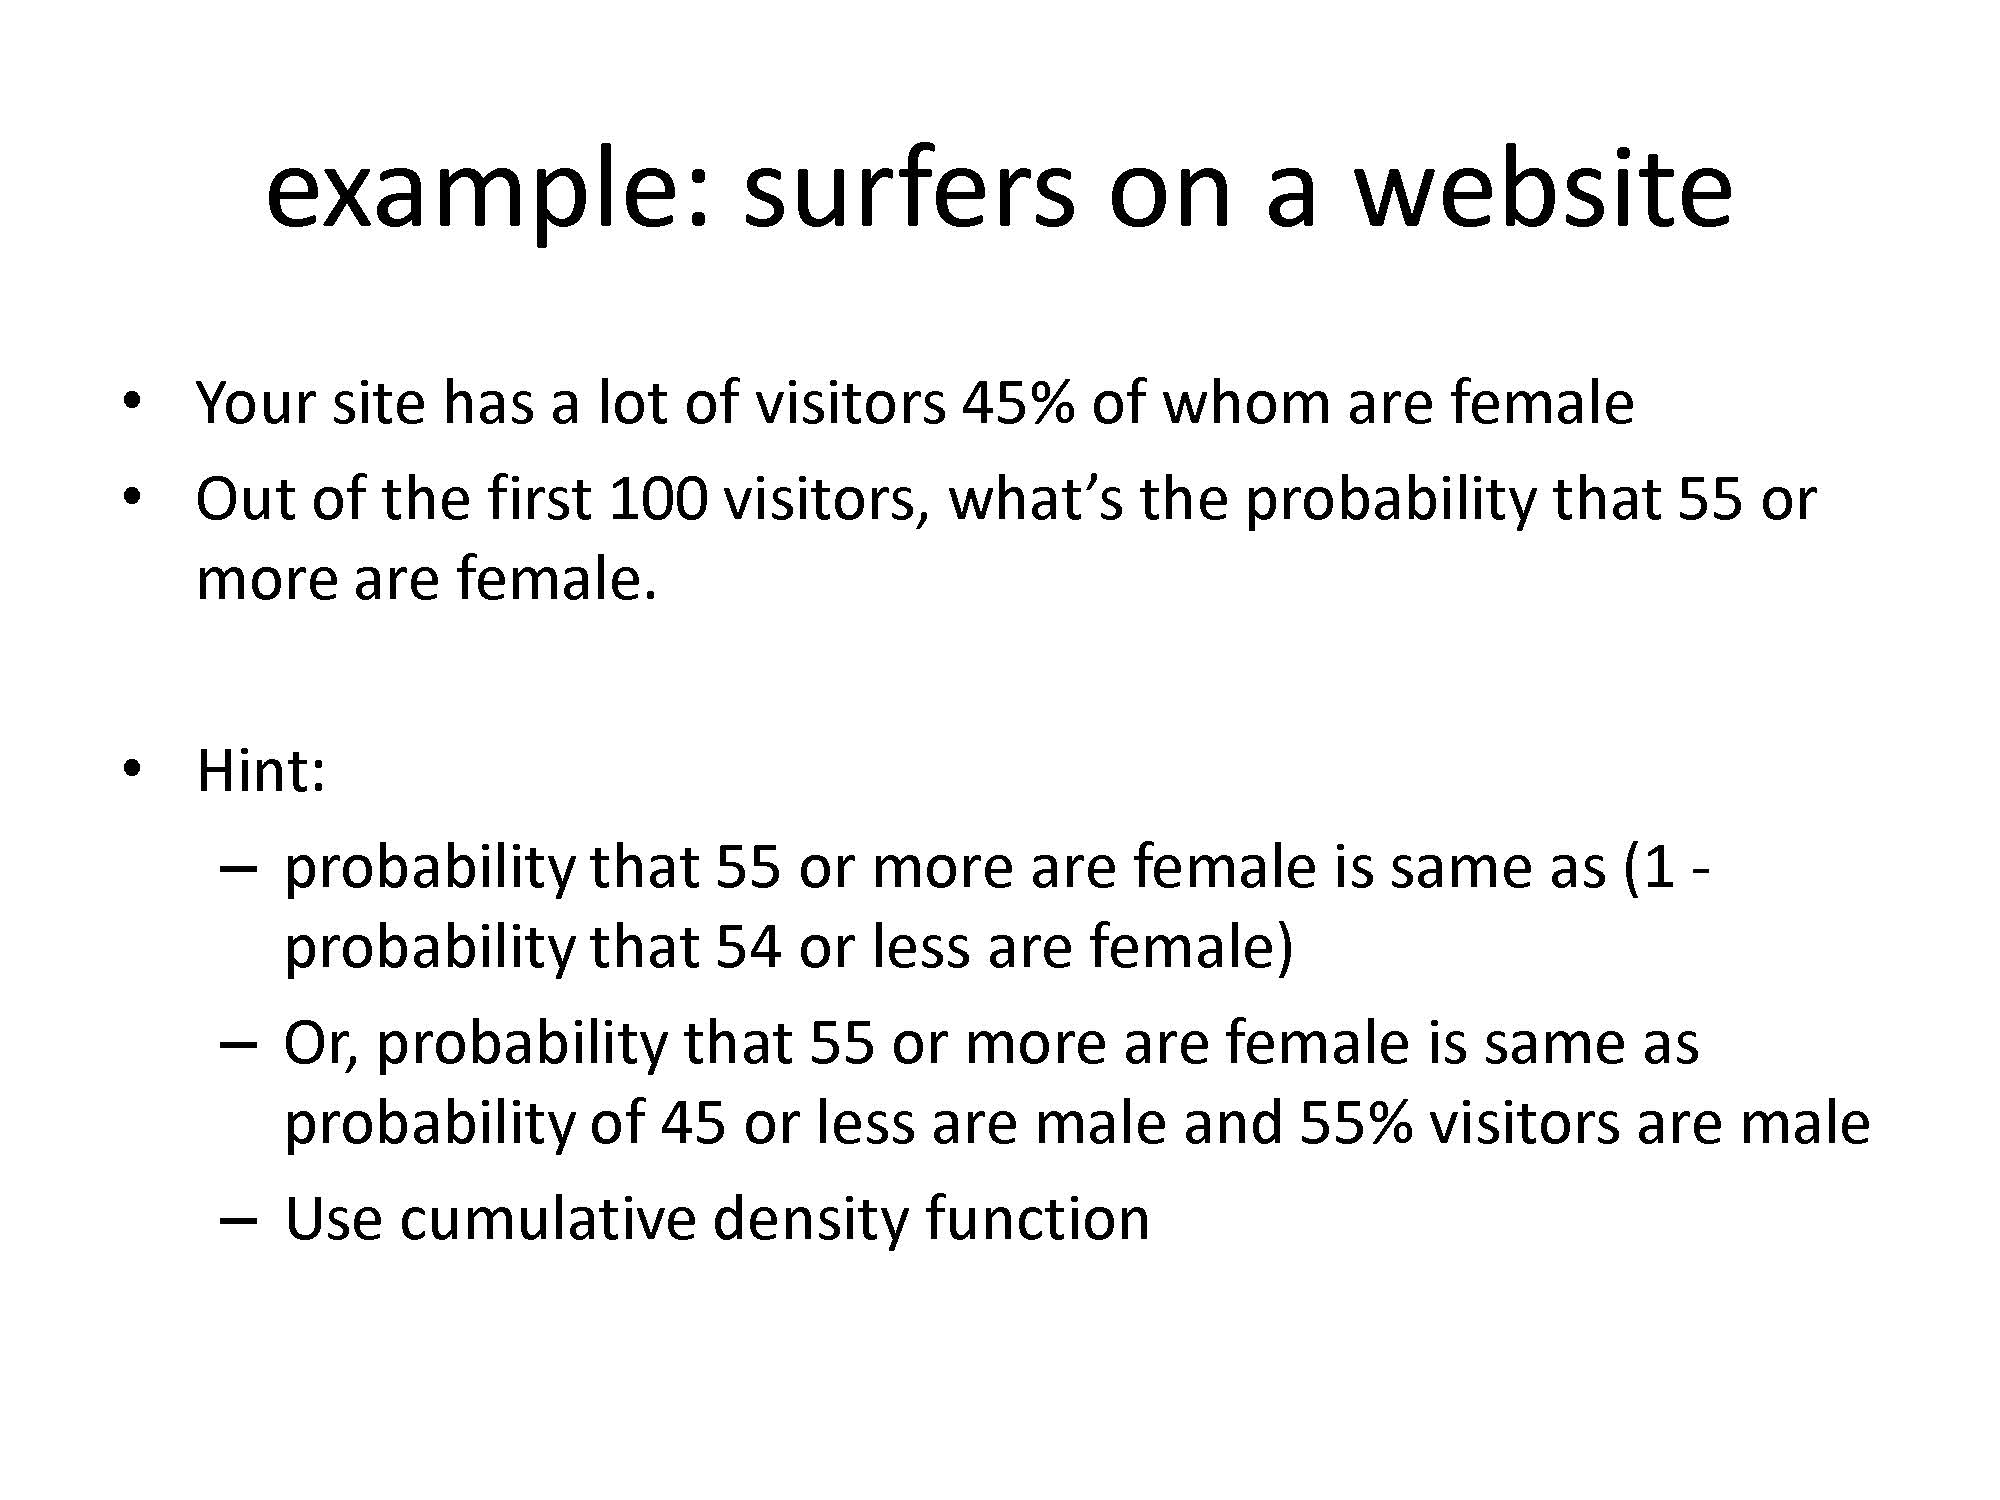

In [15]:
# P(X≥55) = 1 – P(X≤54) 
# probability that 55 or more are female is same as (1 - probability that 54 or less are female)


1-binom.cdf(54, n=100,p=0.45)

0.028393418365597056

In [16]:
# Another solution
# Or, probability that 55 or more are female is same as probability of 45 or less are male and 55% visitors are male


binom.cdf(45, n=100,p=0.55)

0.02839341836559716

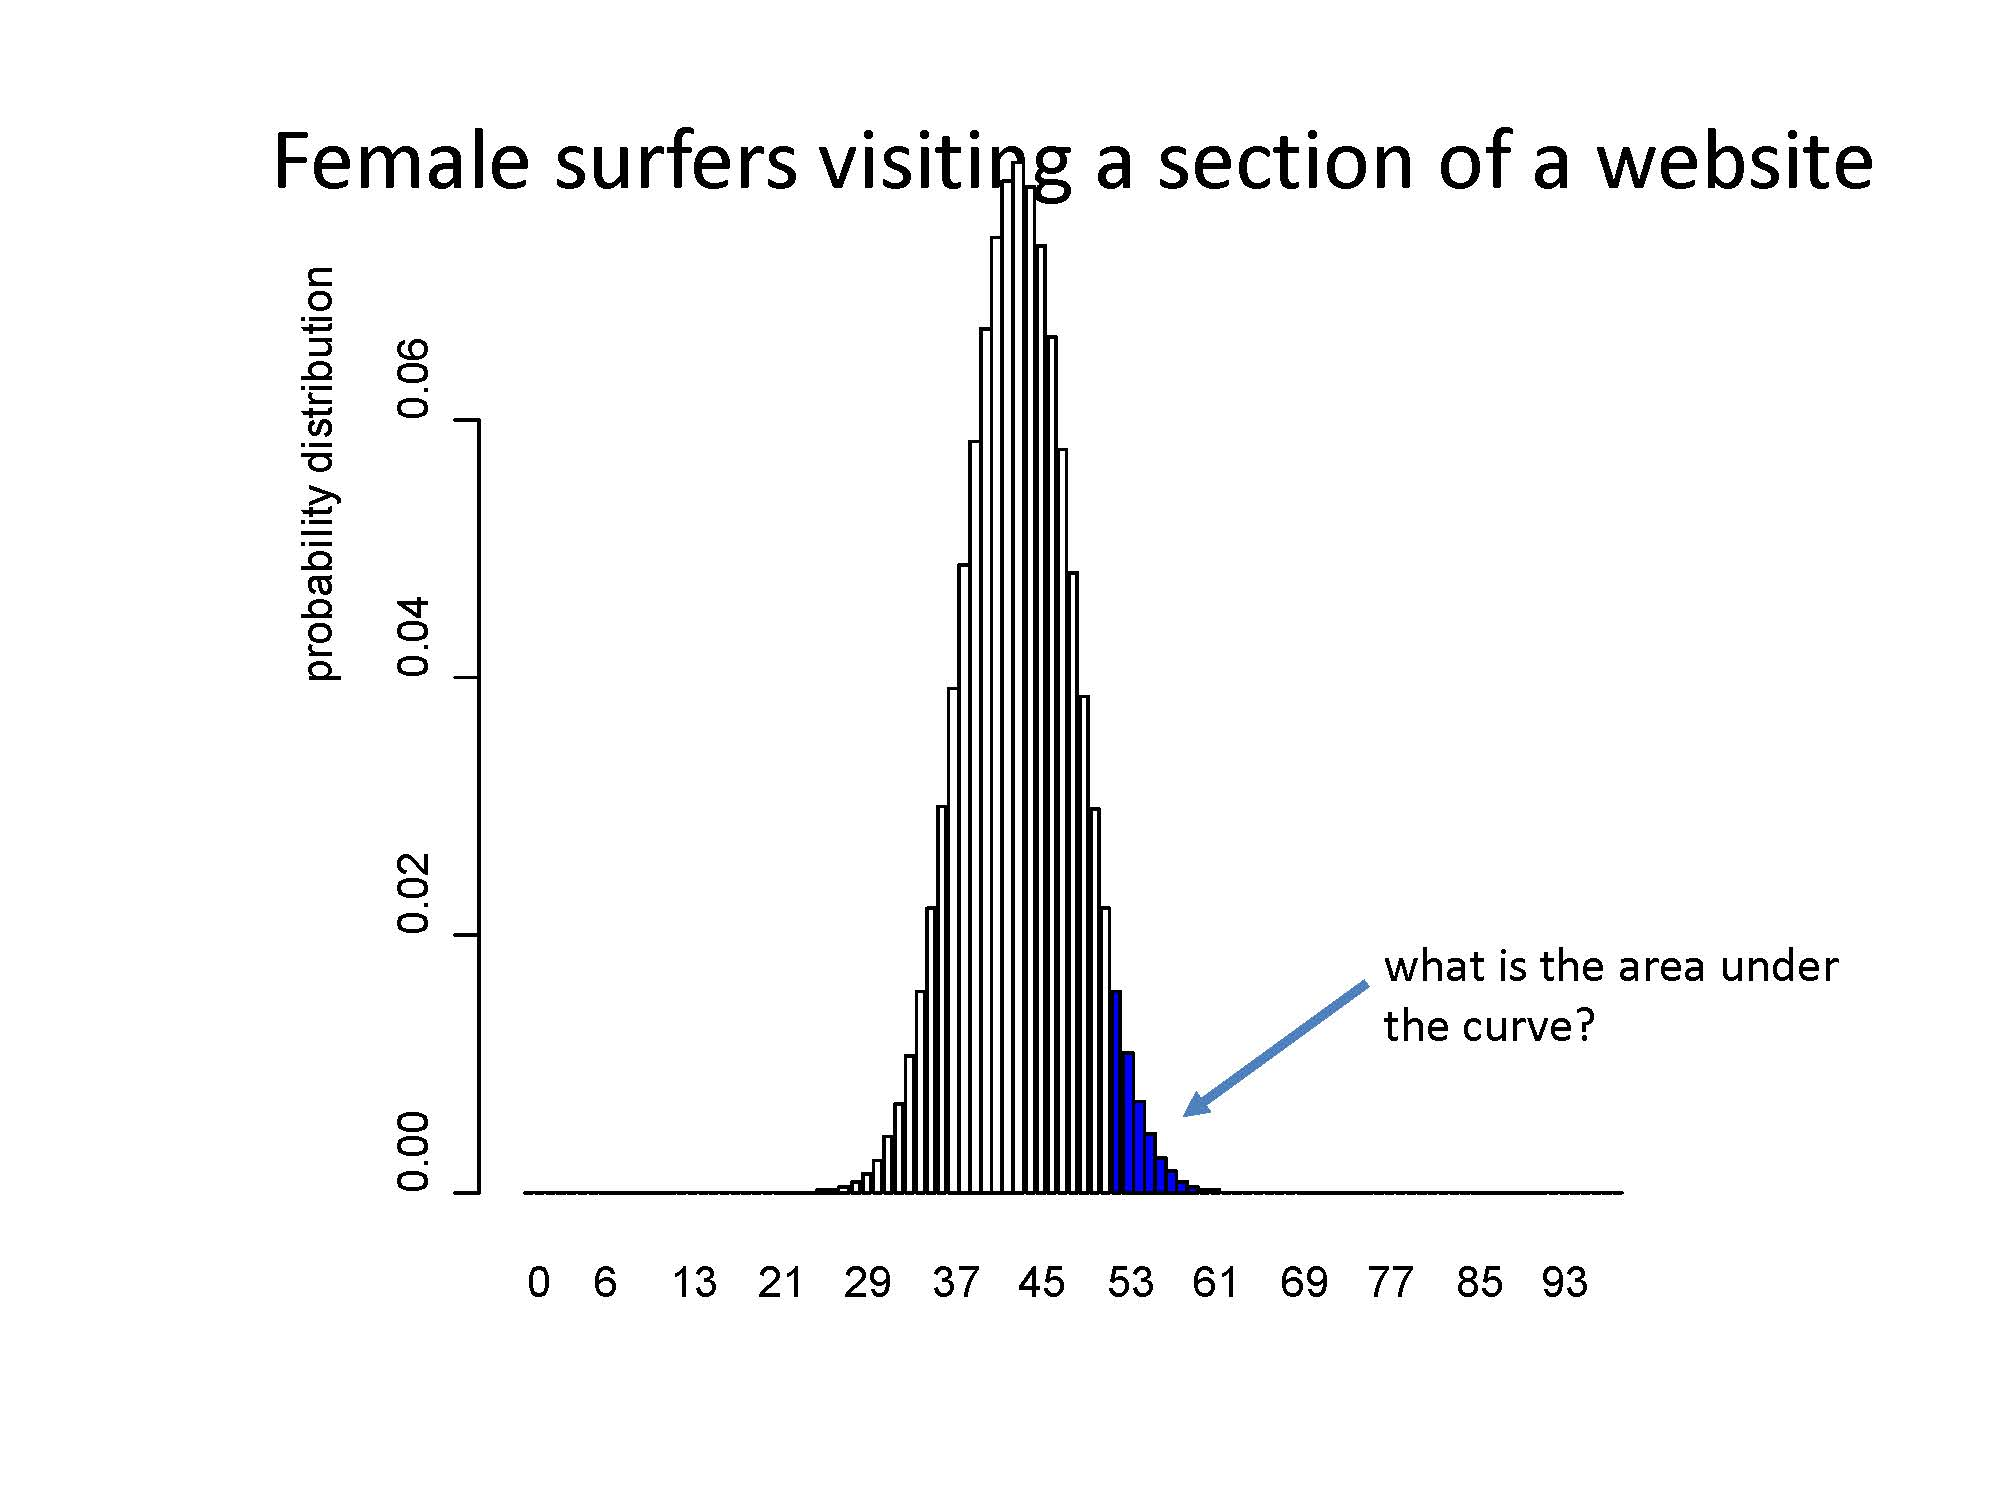
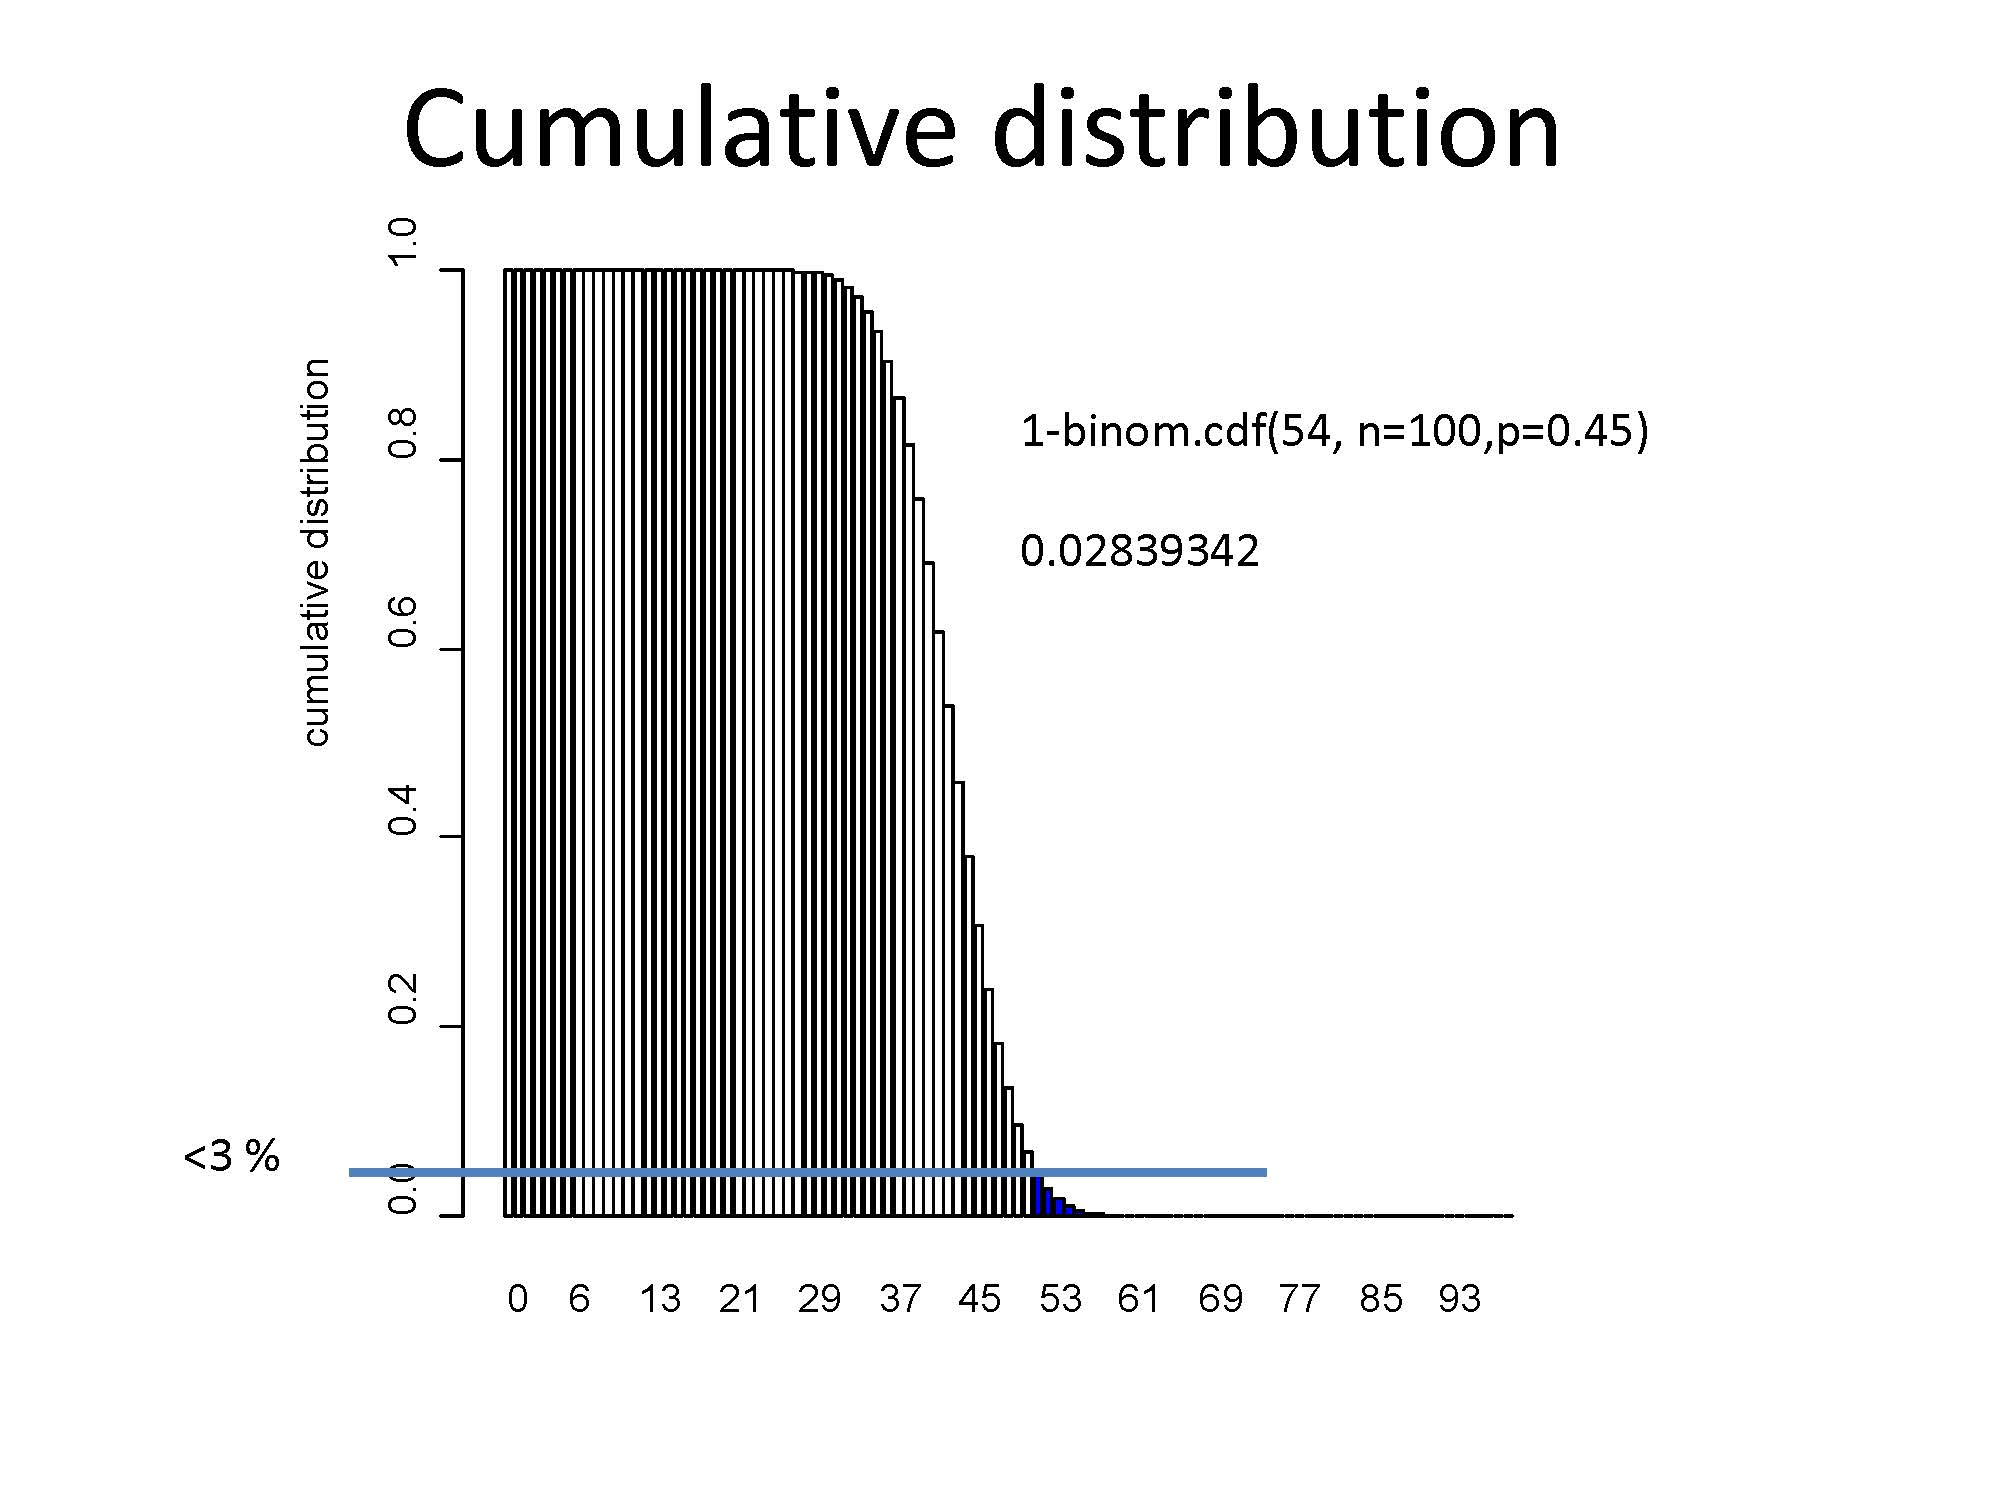
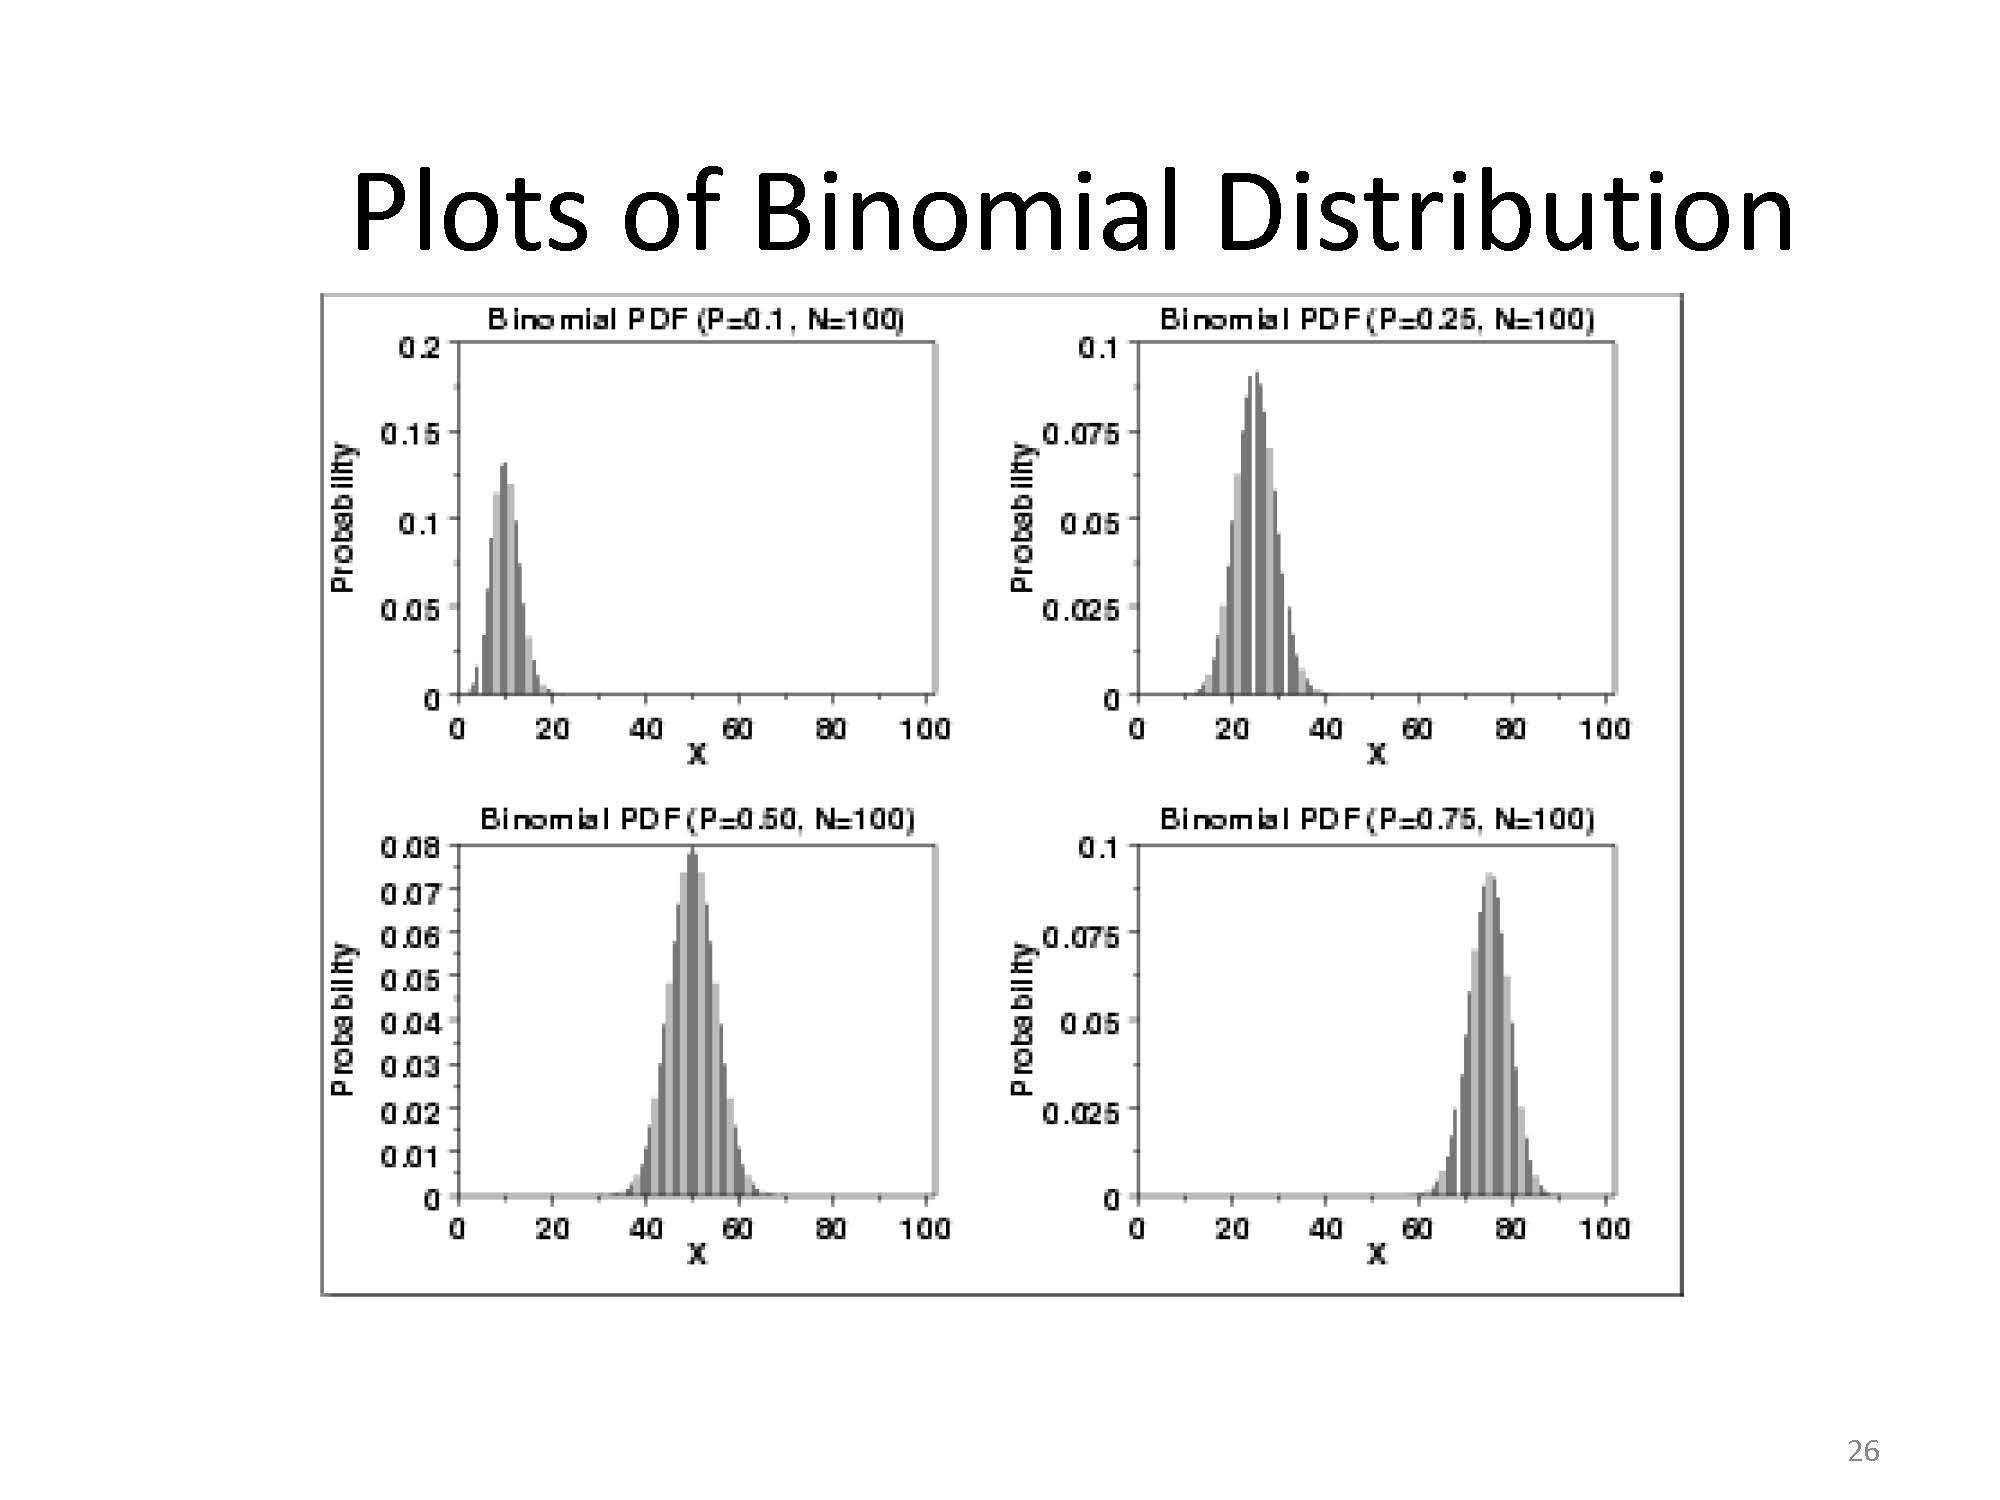
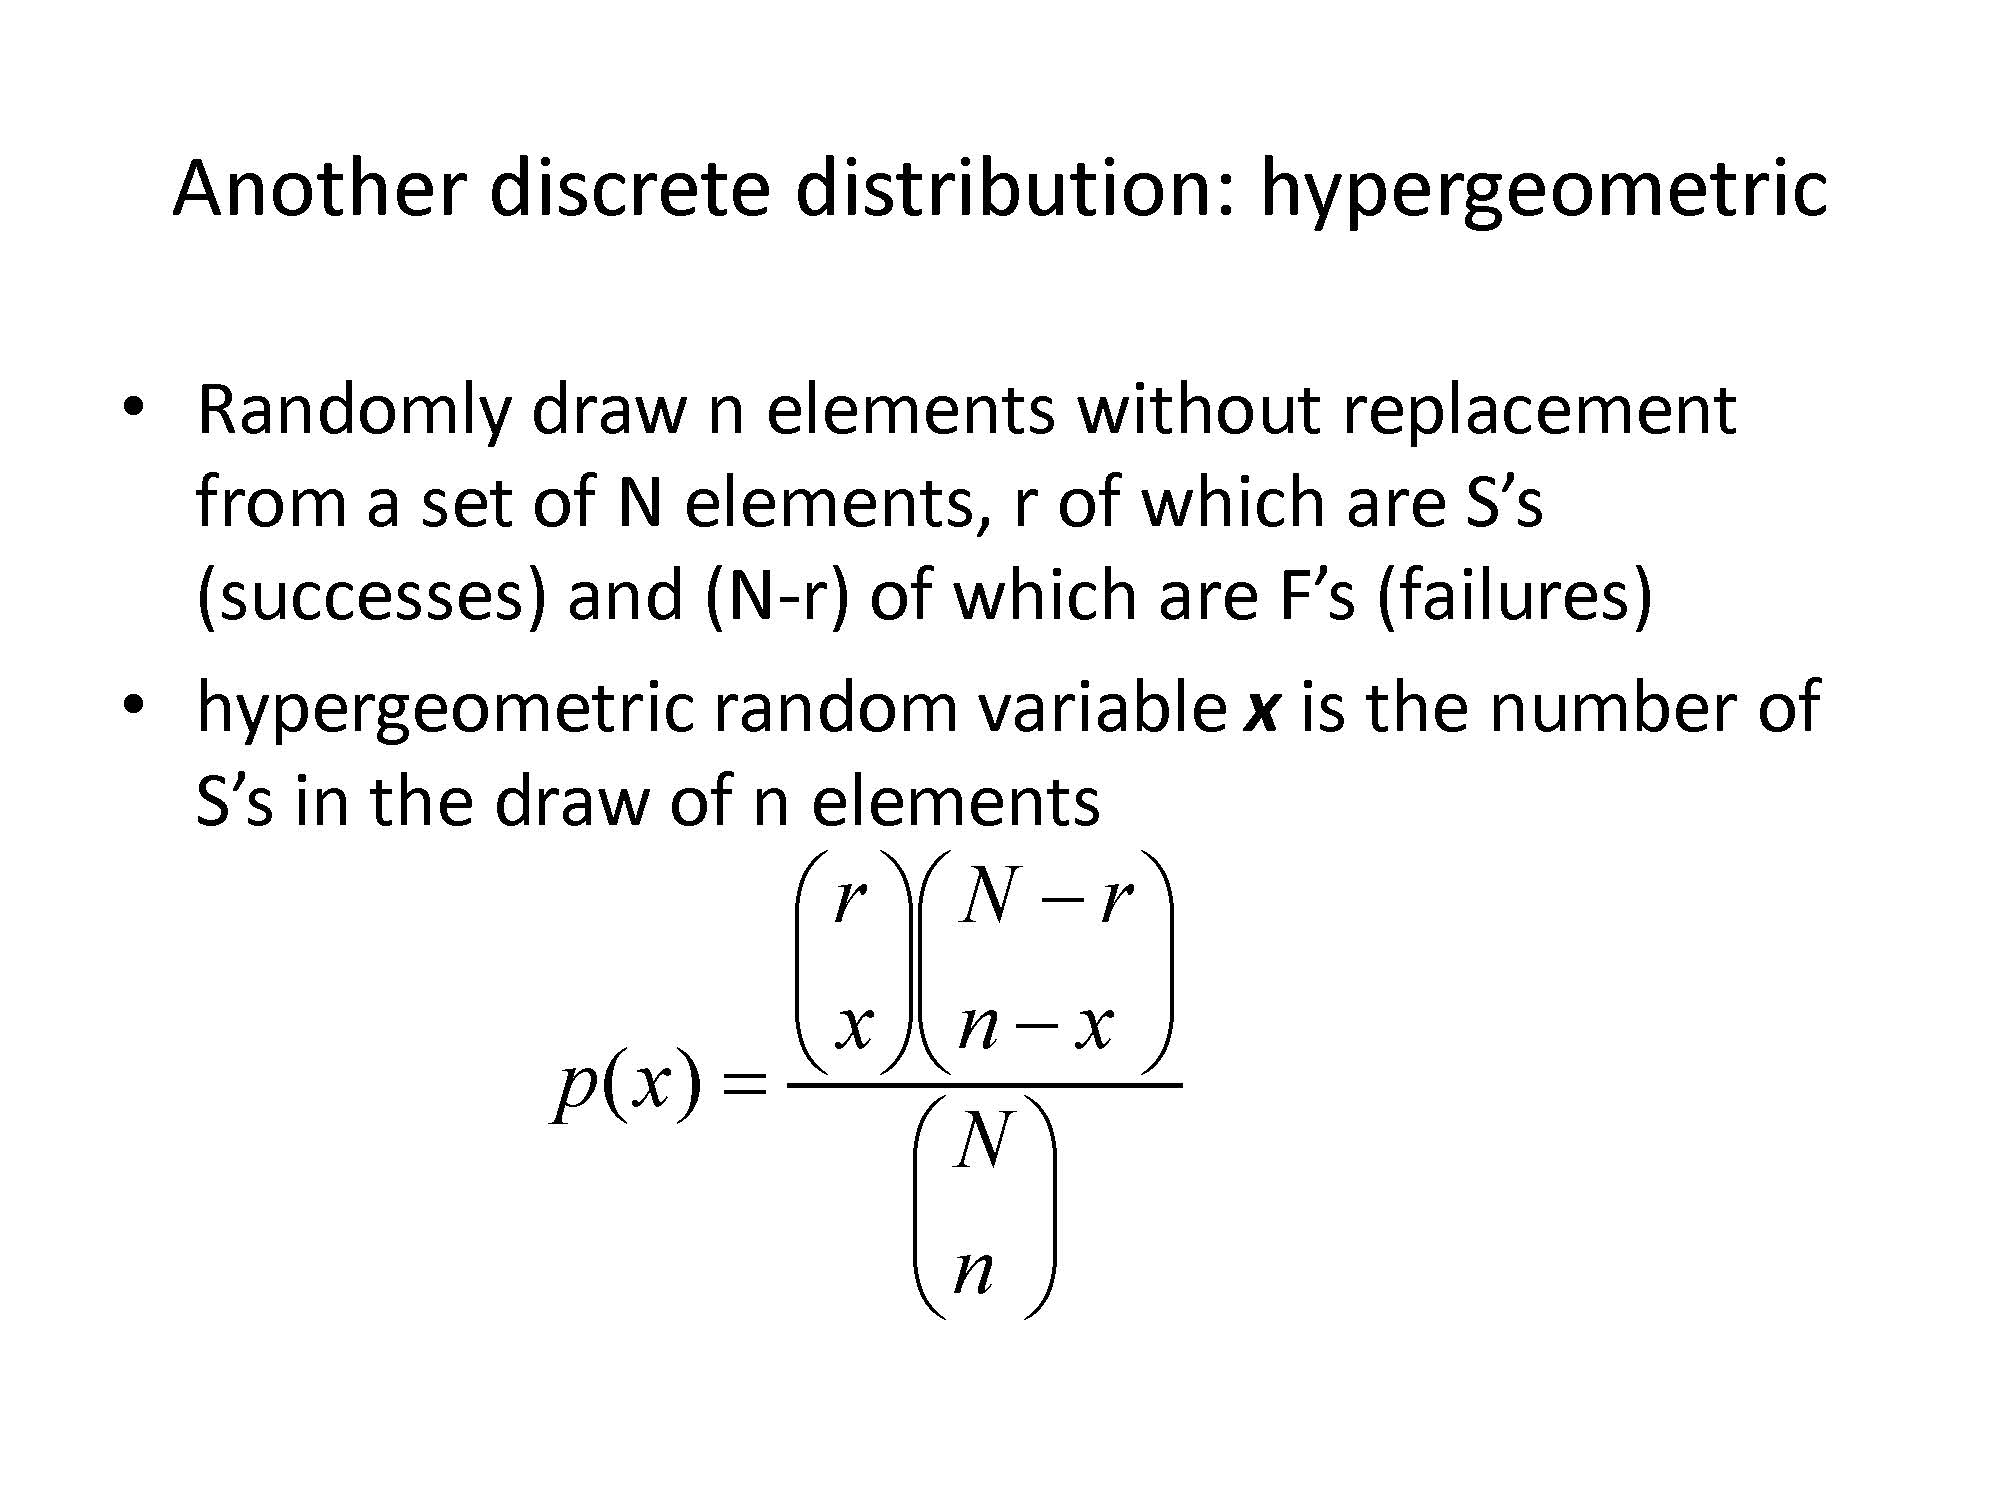
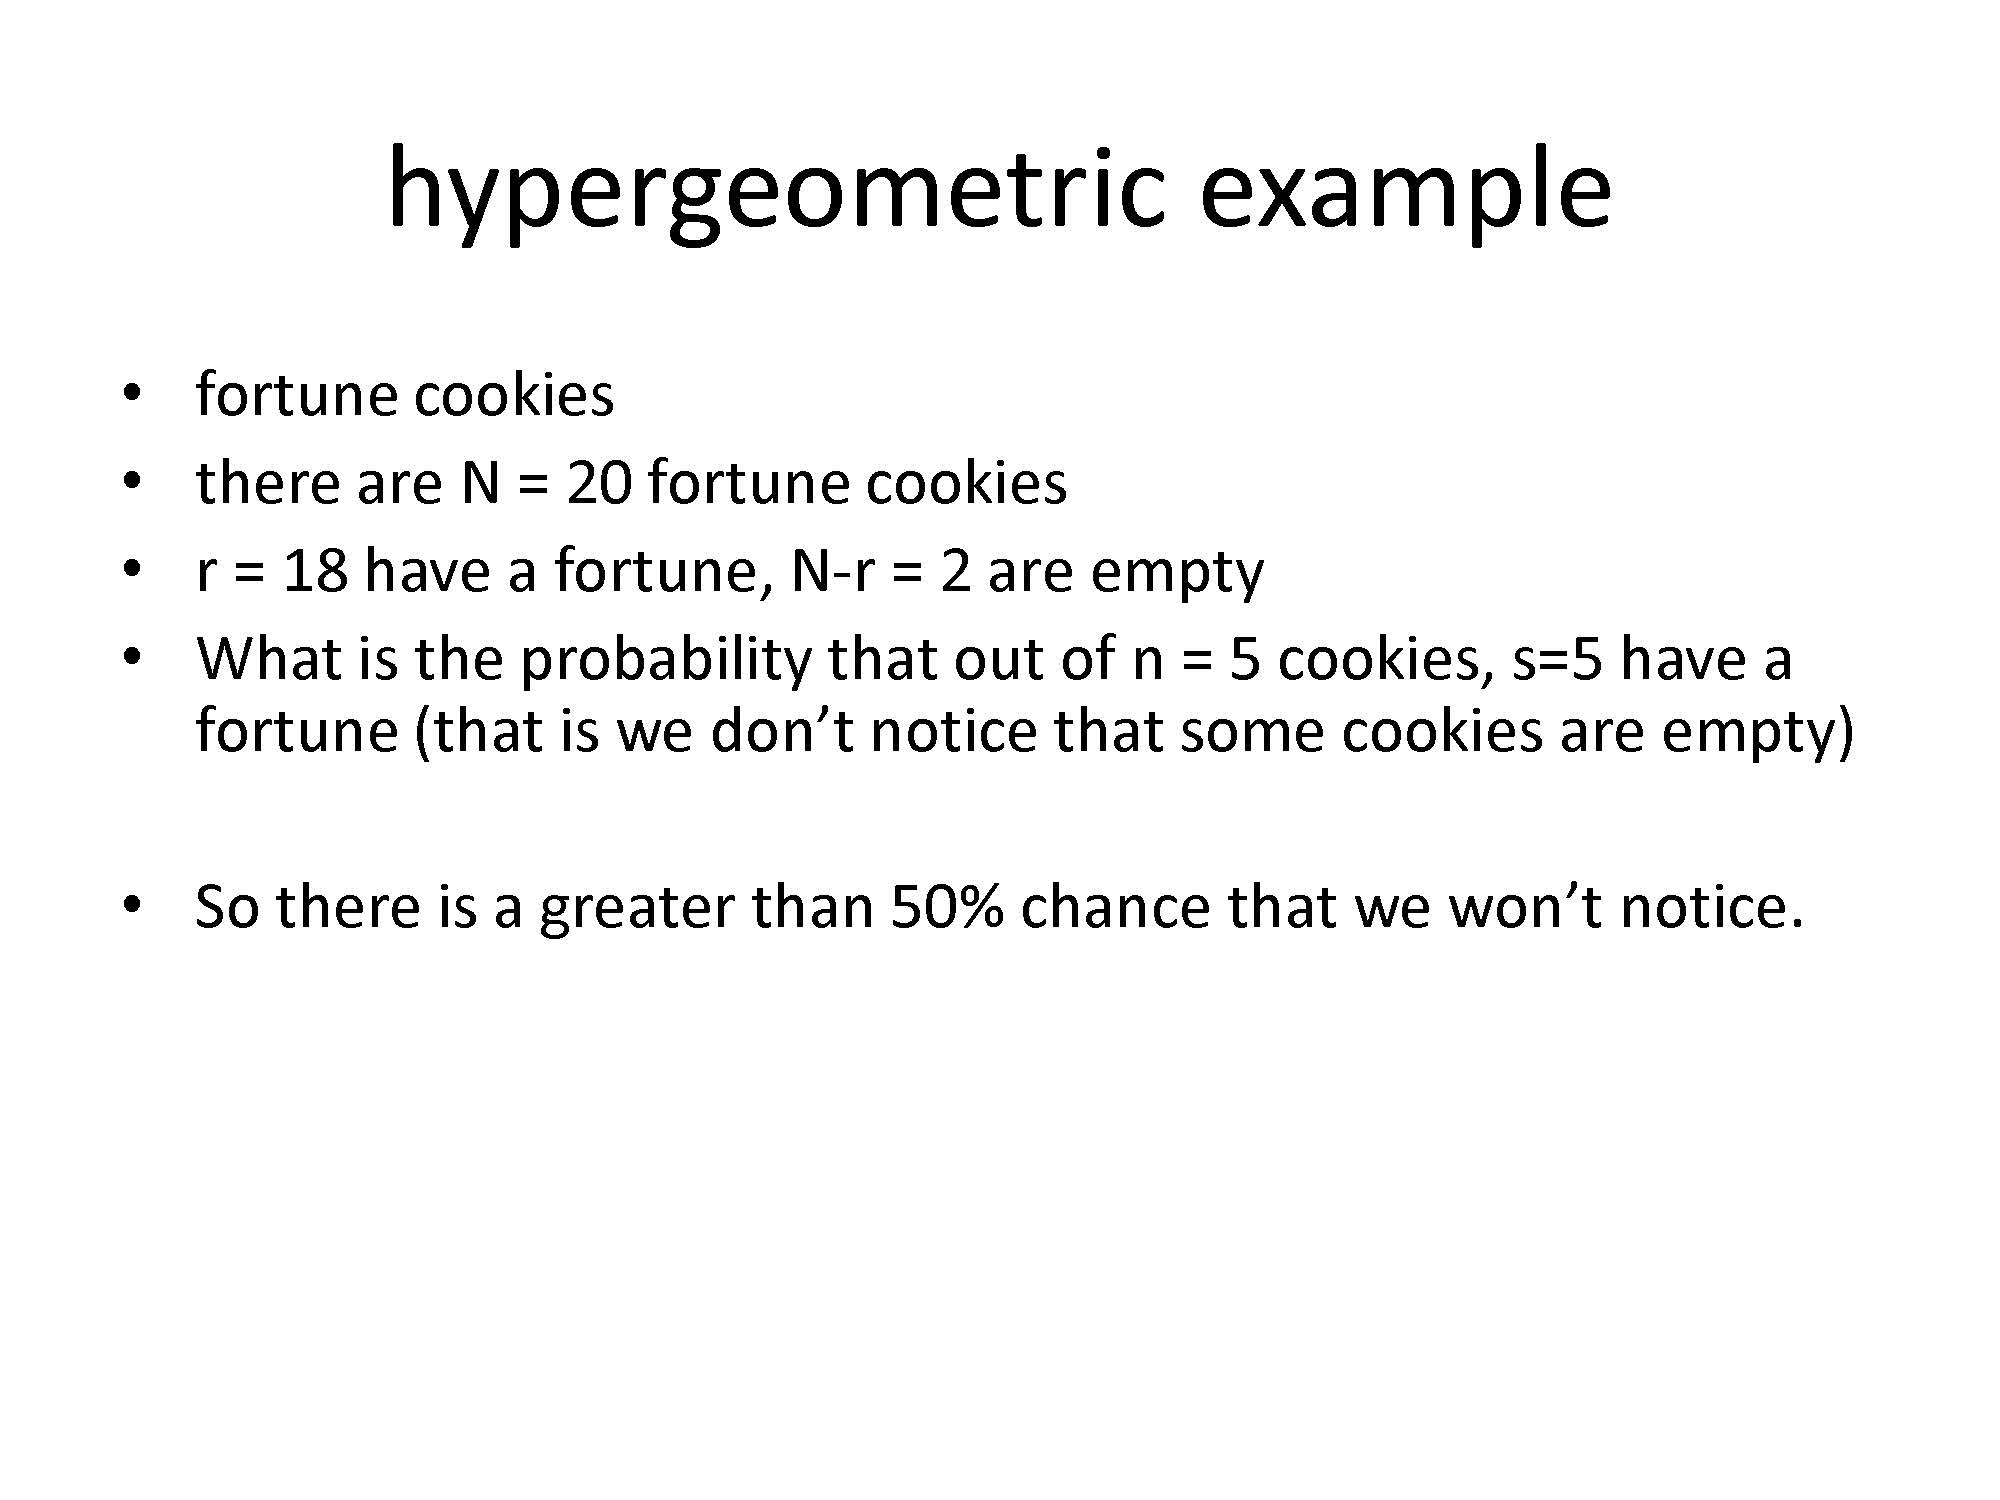

In [17]:
# M is the total number of objects, 
# n is total number of Type I objects. 
# The random variate represents the number of Type I objects in N drawn without replacement from the total population.

# pmf(x, M, n, N, loc=0) Probability mass function.
from scipy.stats import hypergeom
hypergeom.pmf(5, 20, 18, 5)

0.5526315789473685

[Text(0.5, 0, 'hypergeom'), Text(0, 0.5, 'Probability')]

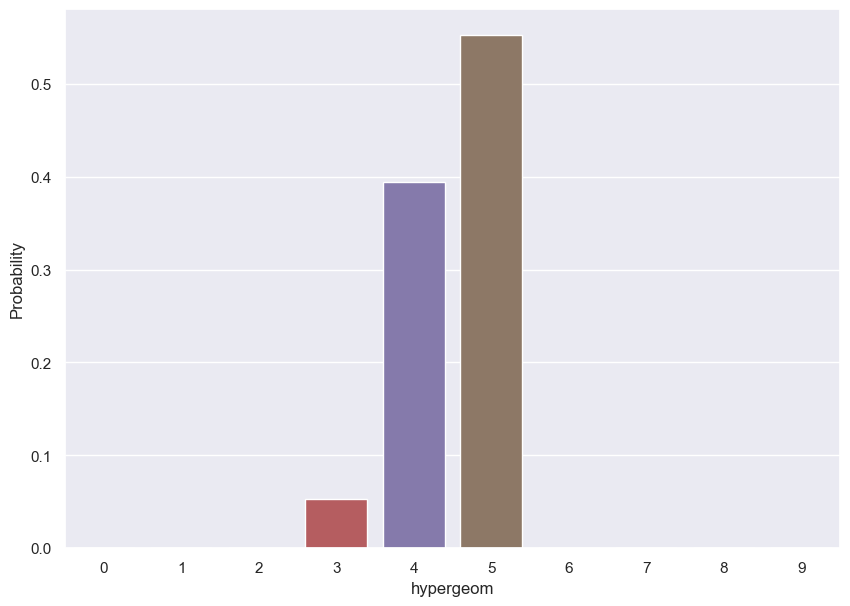

In [18]:
from scipy.stats import hypergeom
hyper = hypergeom.pmf(np.arange(10),20, 18, 5)
ax = sns.barplot(x='x',
                 y='y',
                 data={'x': np.arange(10), 'y':hyper})
# ax.set(ylim=(0, 1))
ax.set(xlabel='hypergeom', ylabel='Probability')

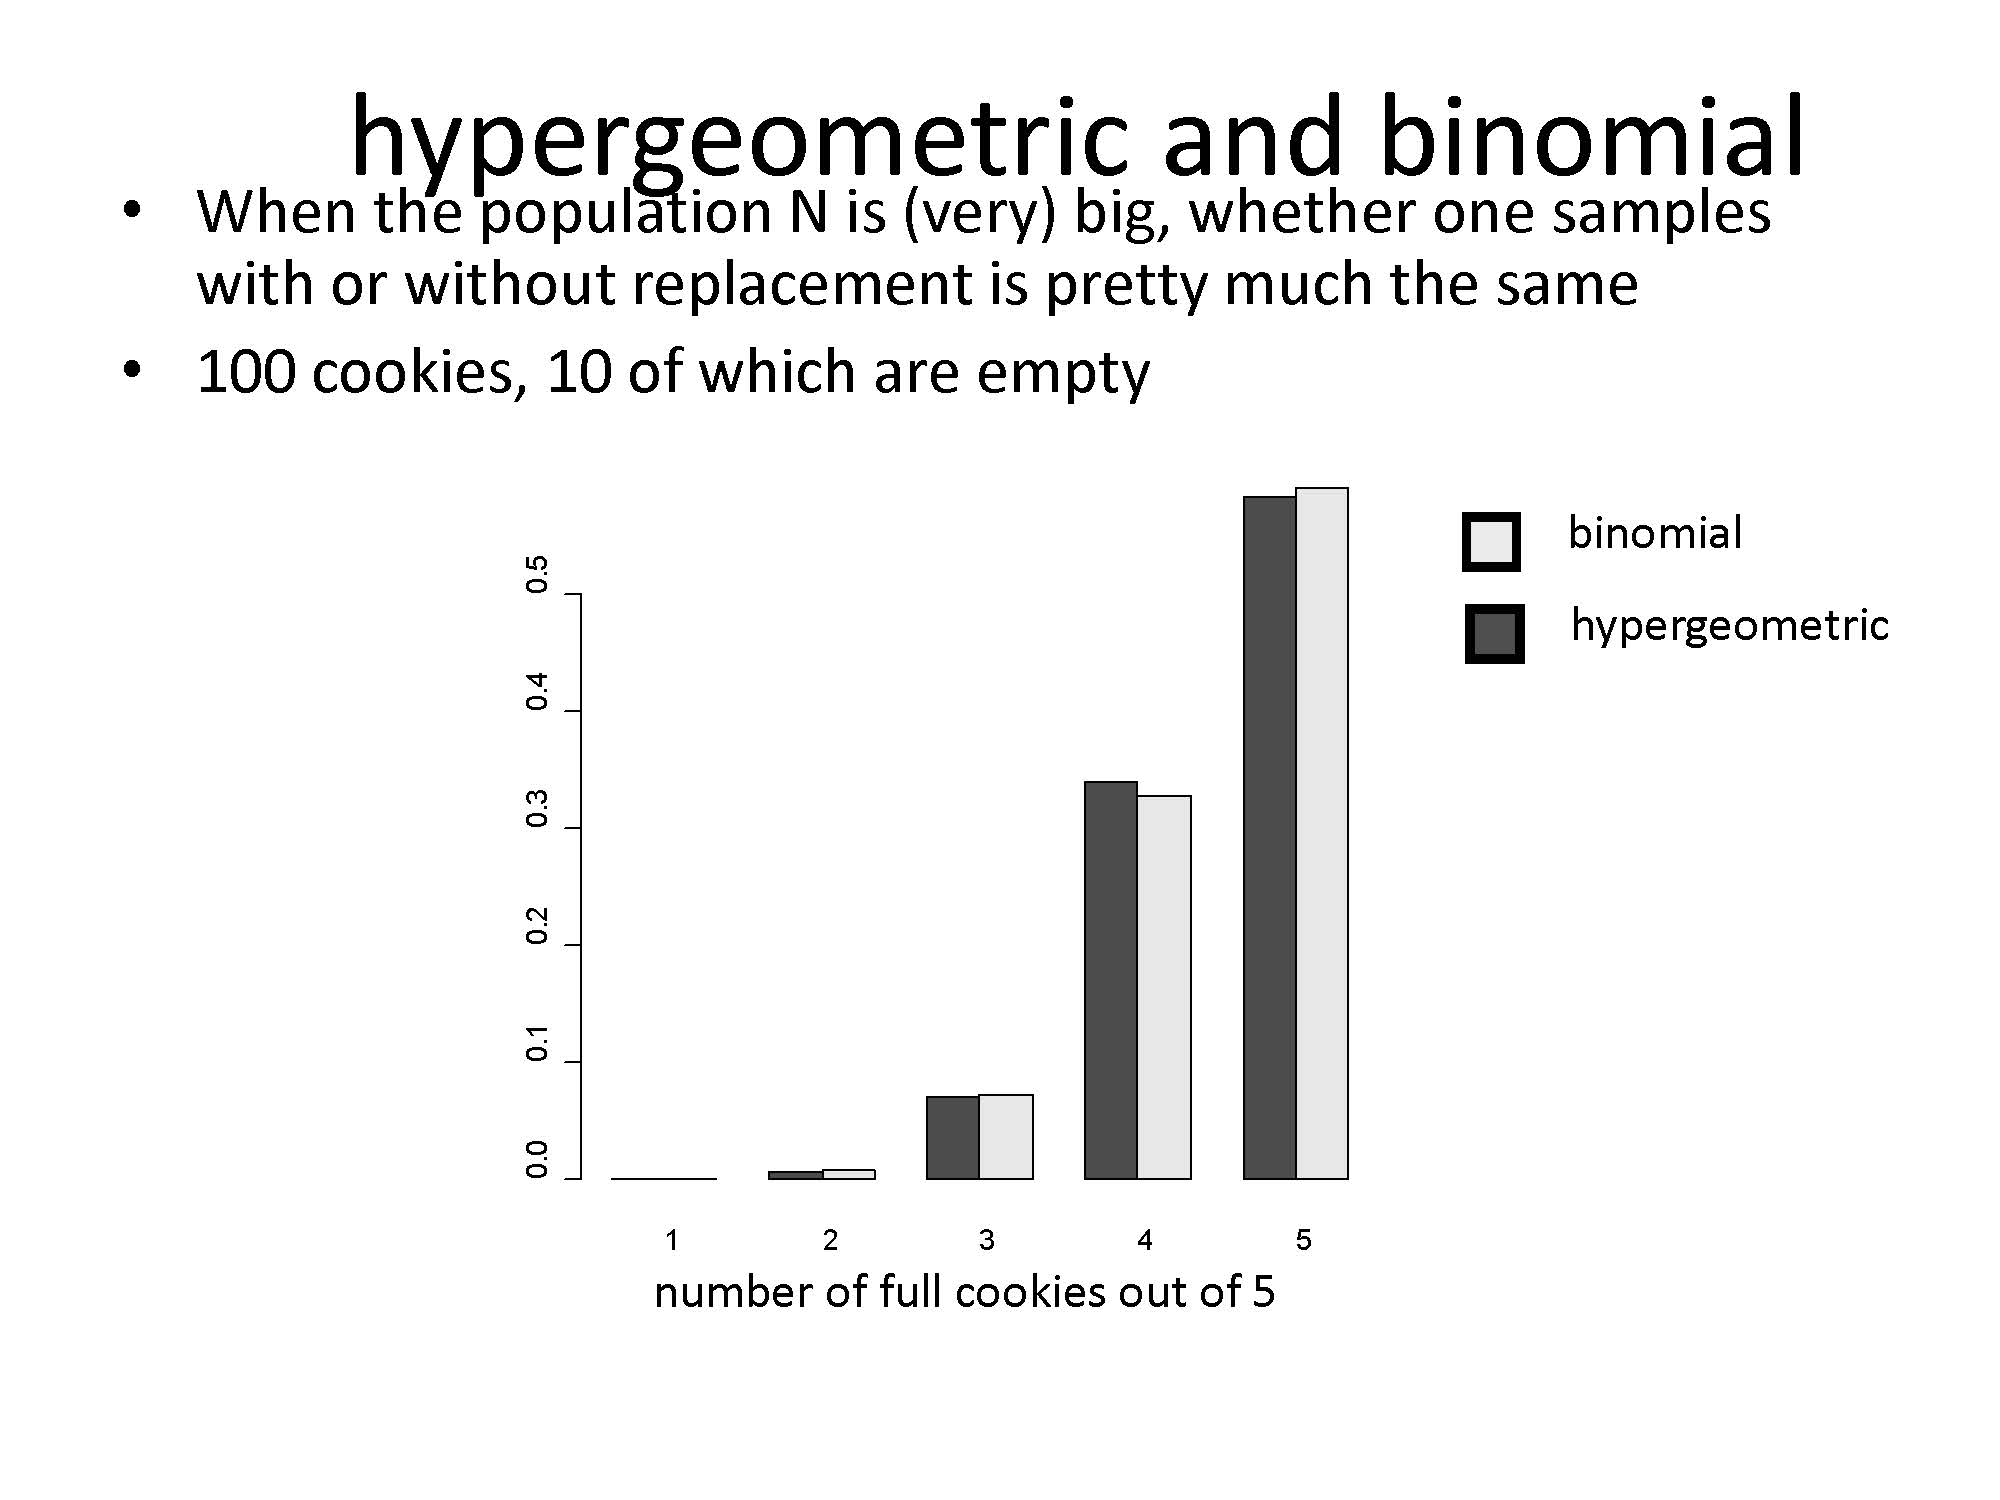

<Axes: >

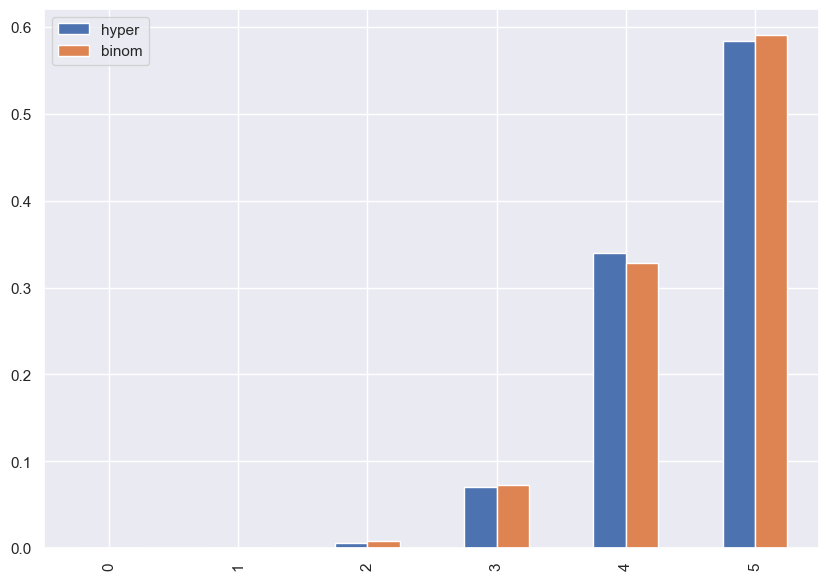

In [19]:
data_hyper = hypergeom.pmf(np.arange(6),100, 90, 5)
data_binom = binom.pmf(k=np.arange(6), n=5,p=0.9)
df = pd.DataFrame({'hyper': data_hyper, 'binom': data_binom})
df.plot.bar()

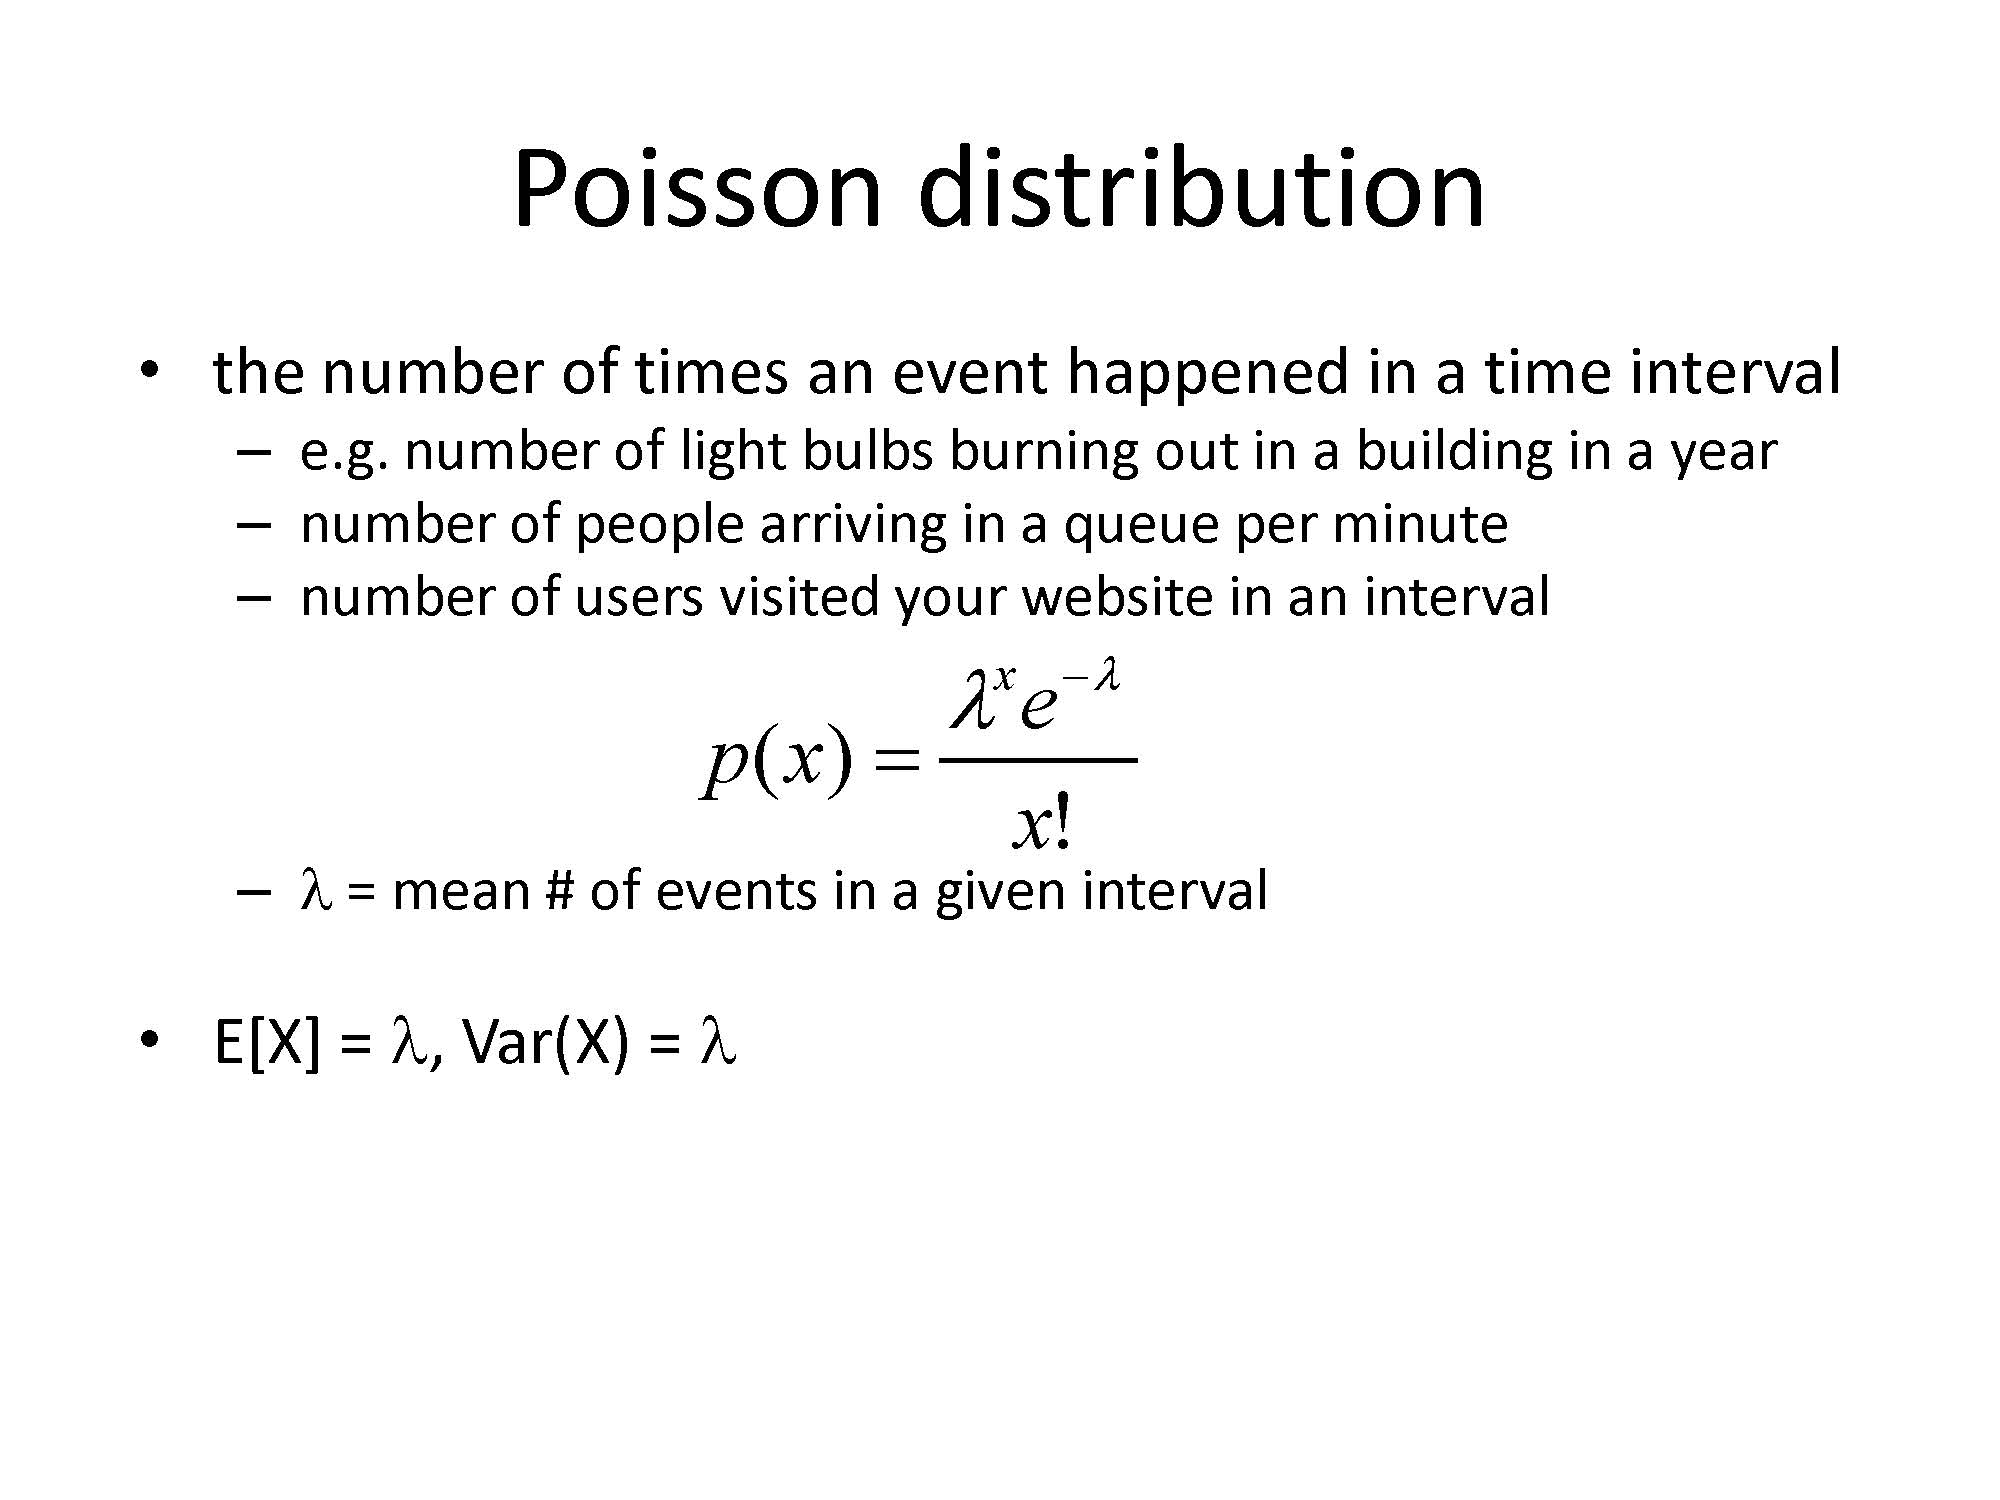

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

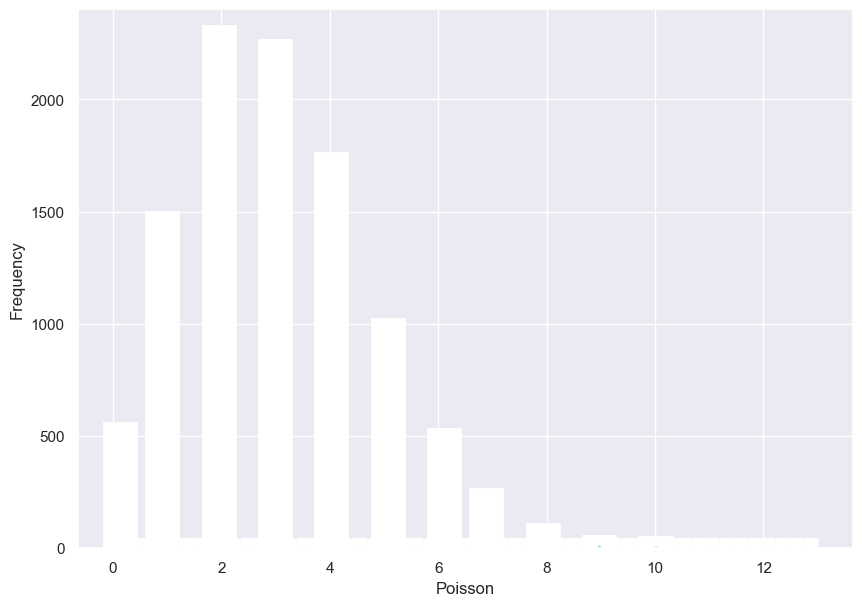

In [20]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

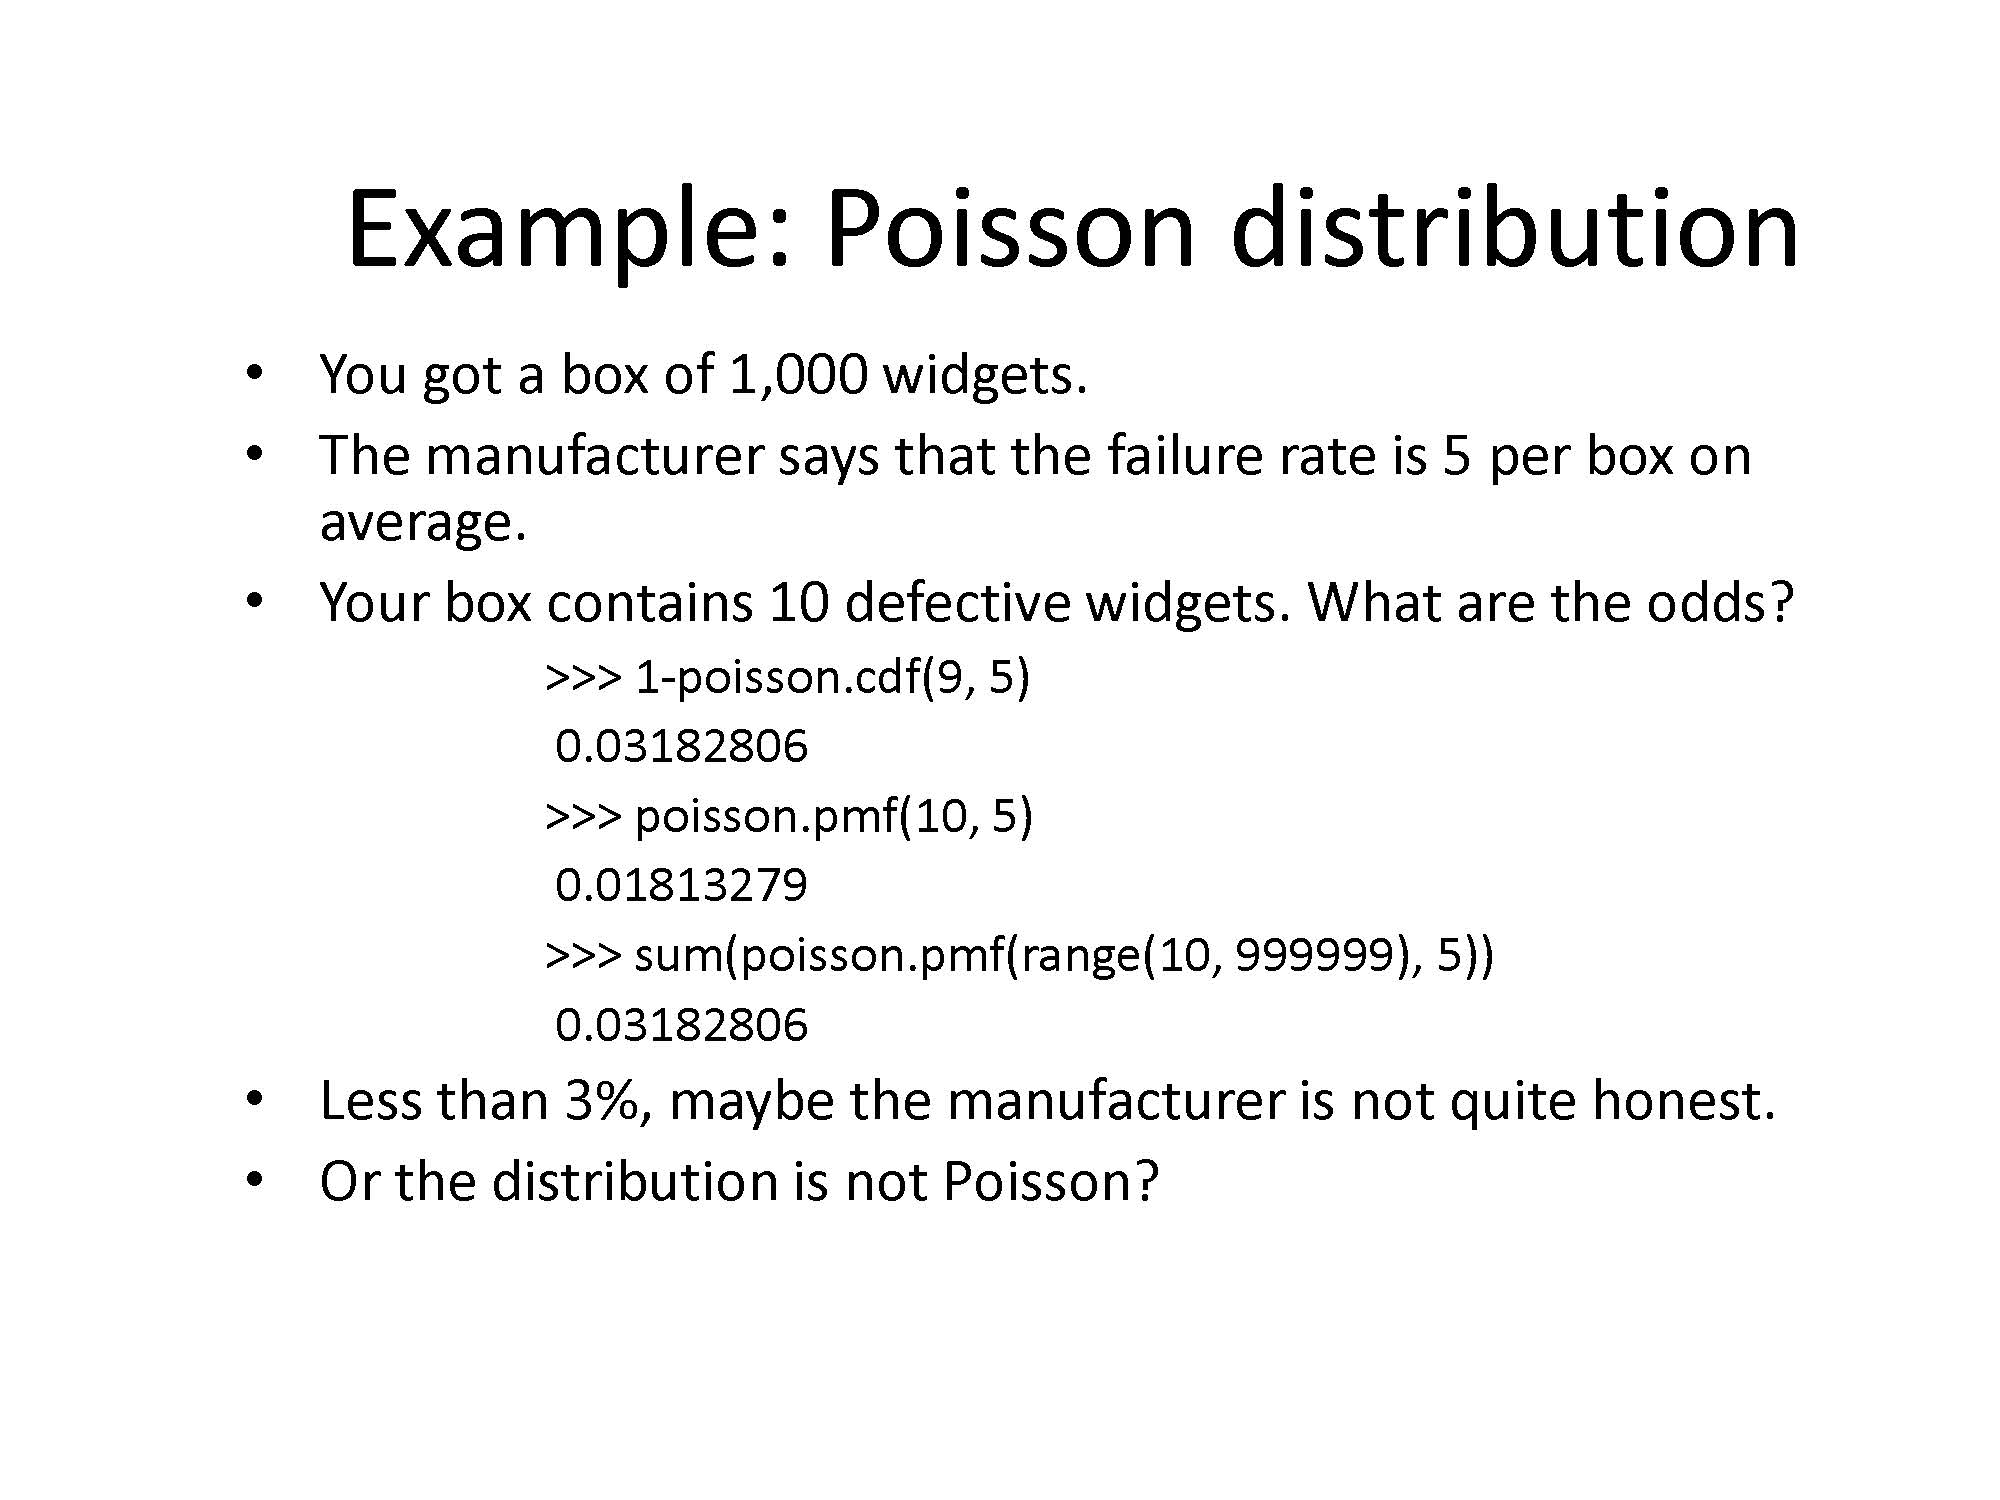
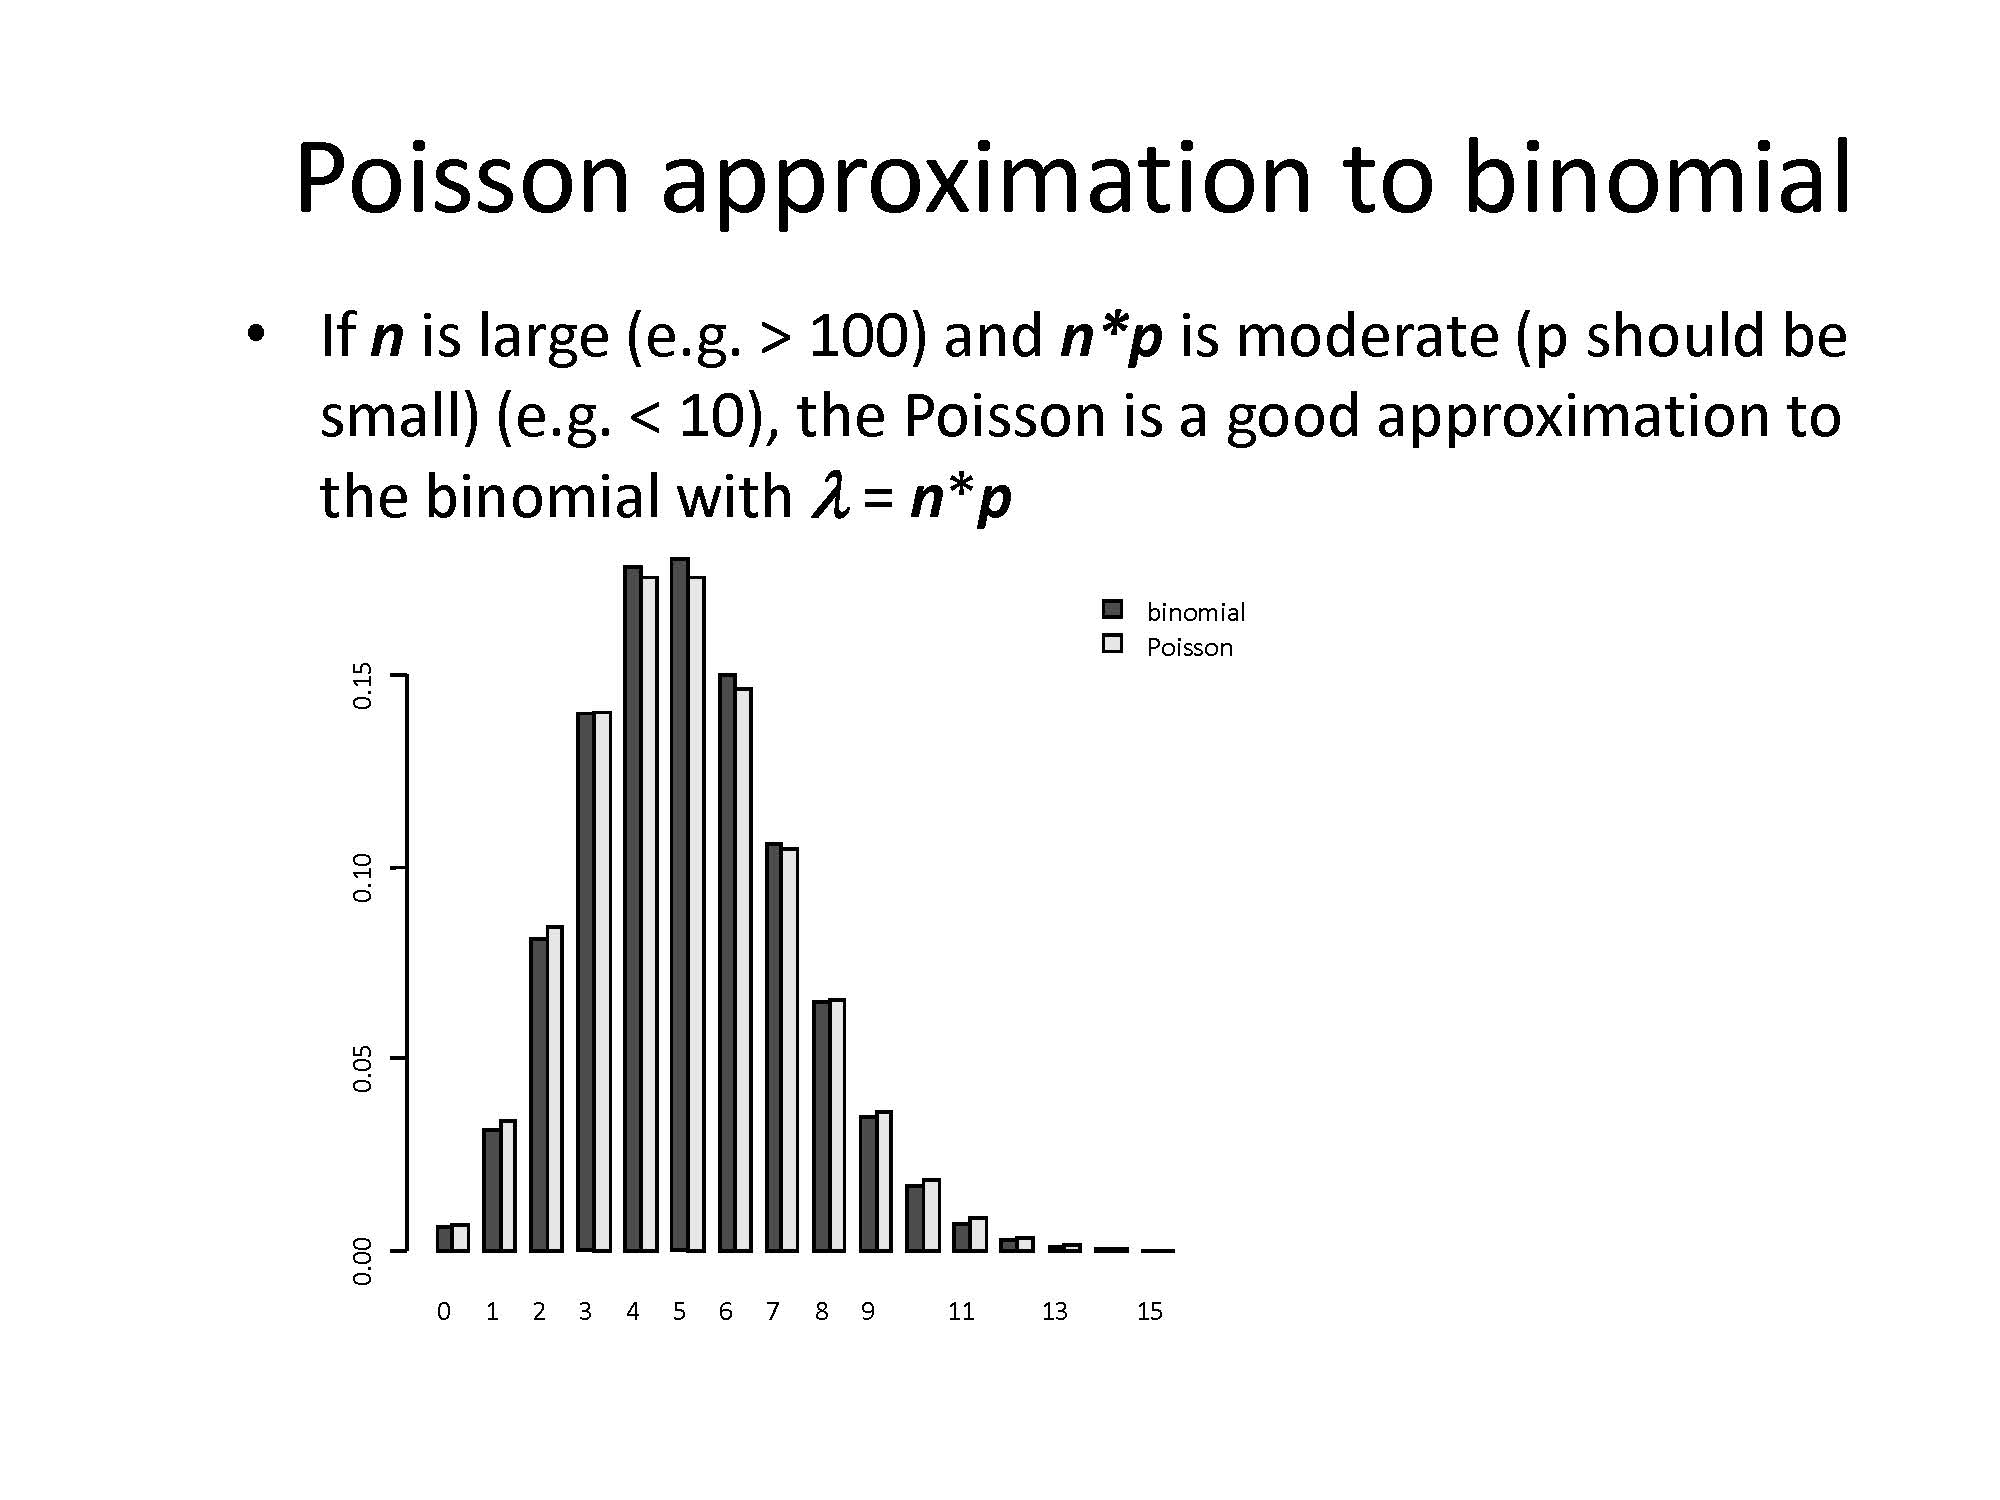
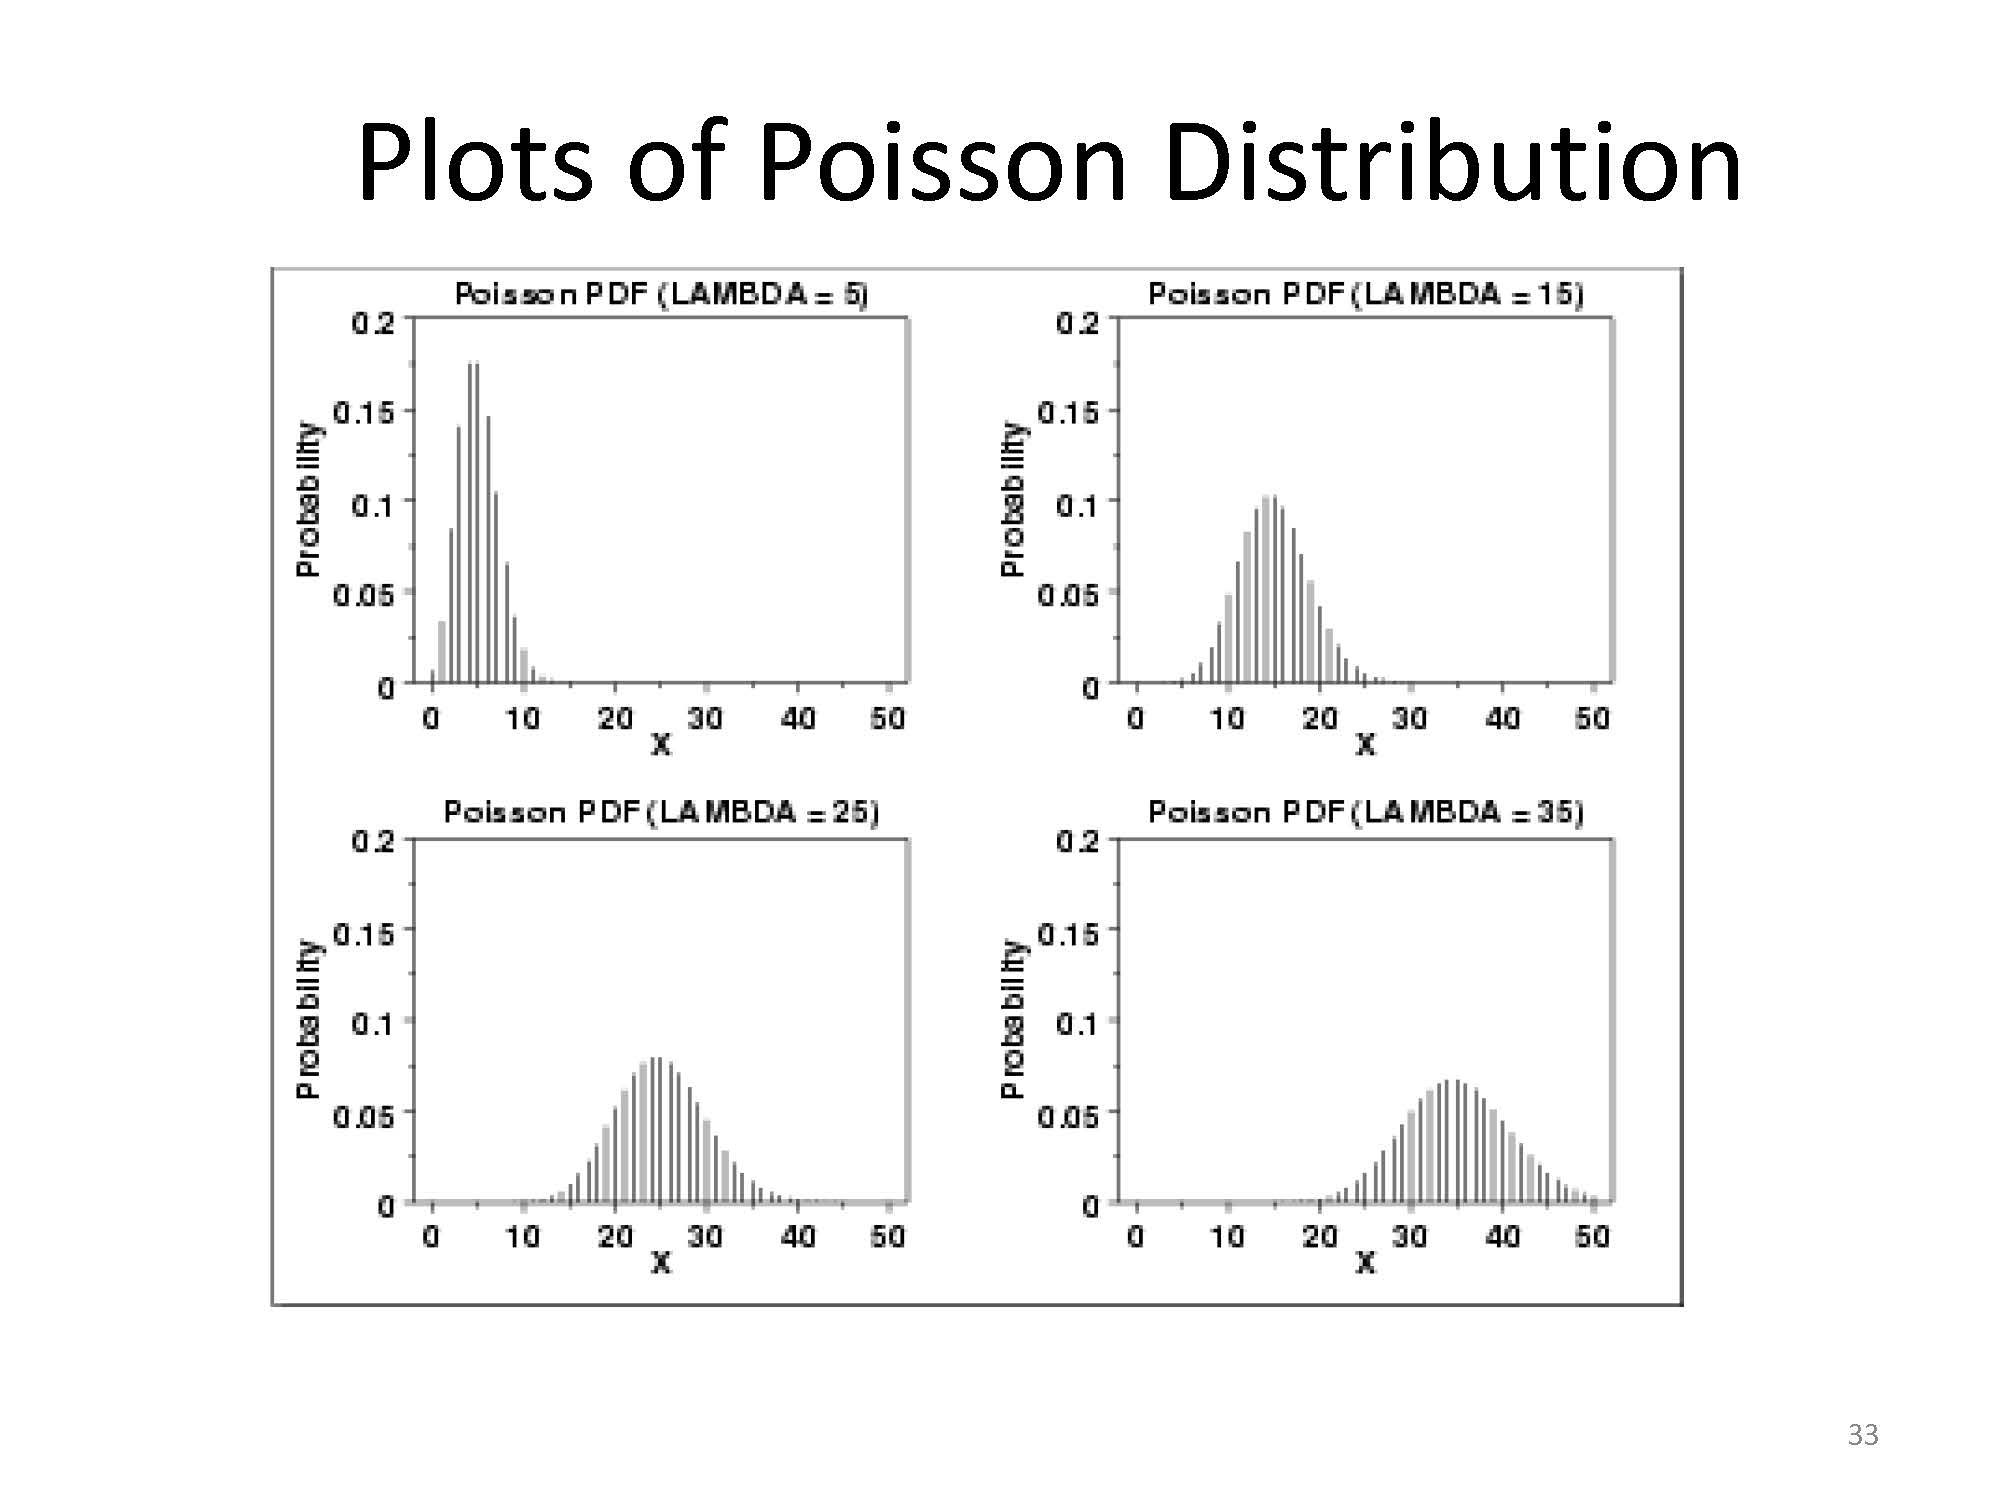
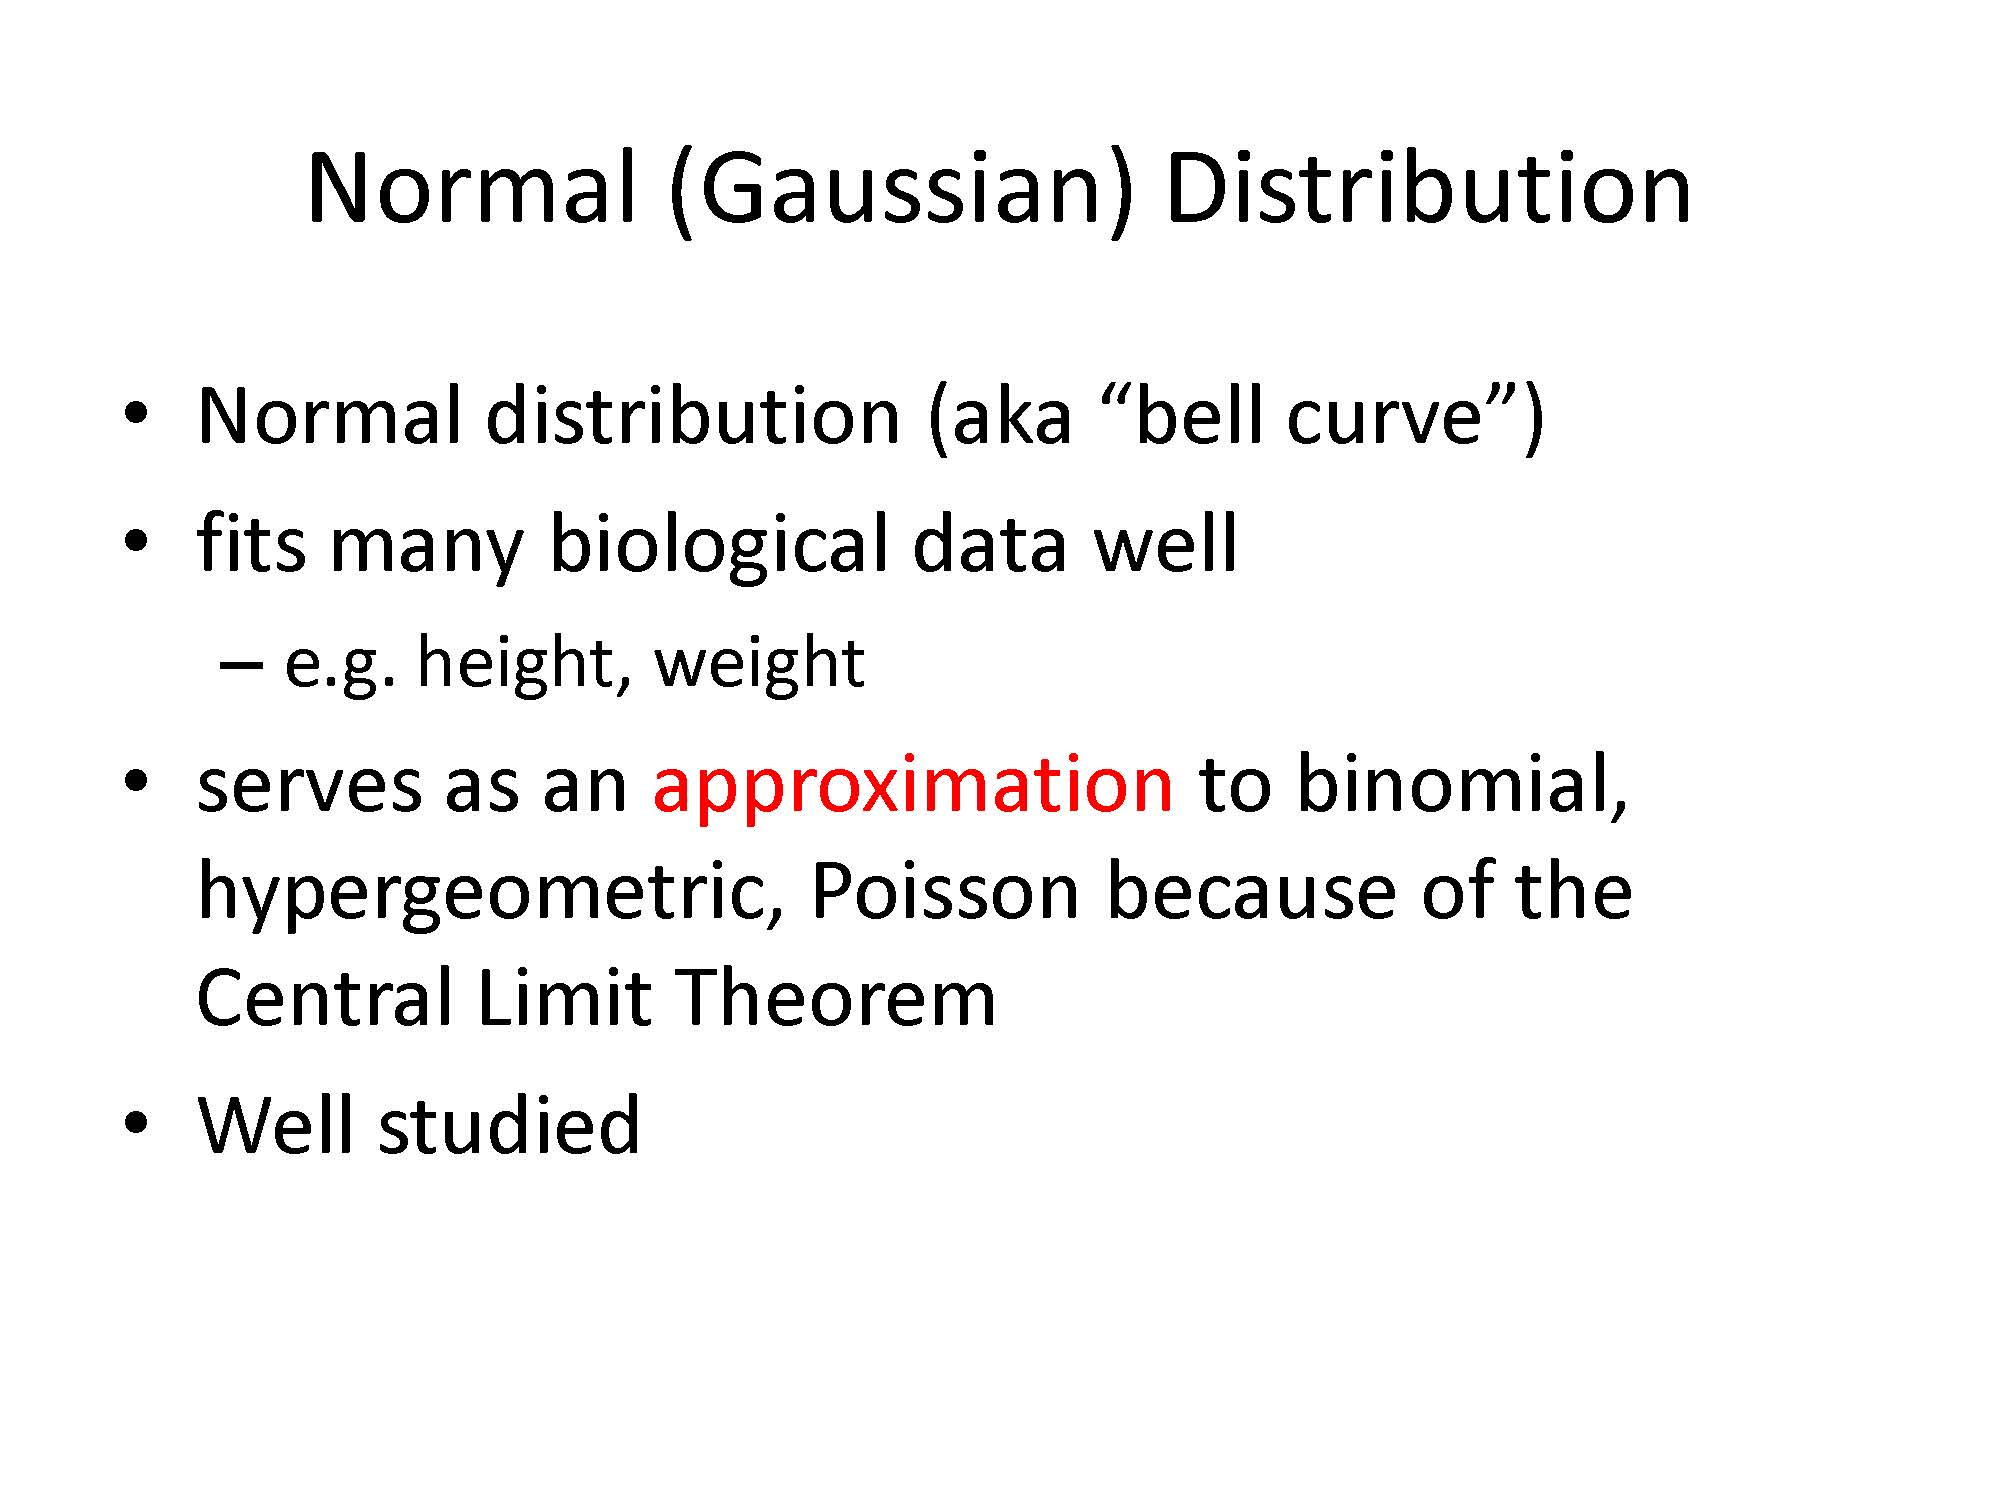
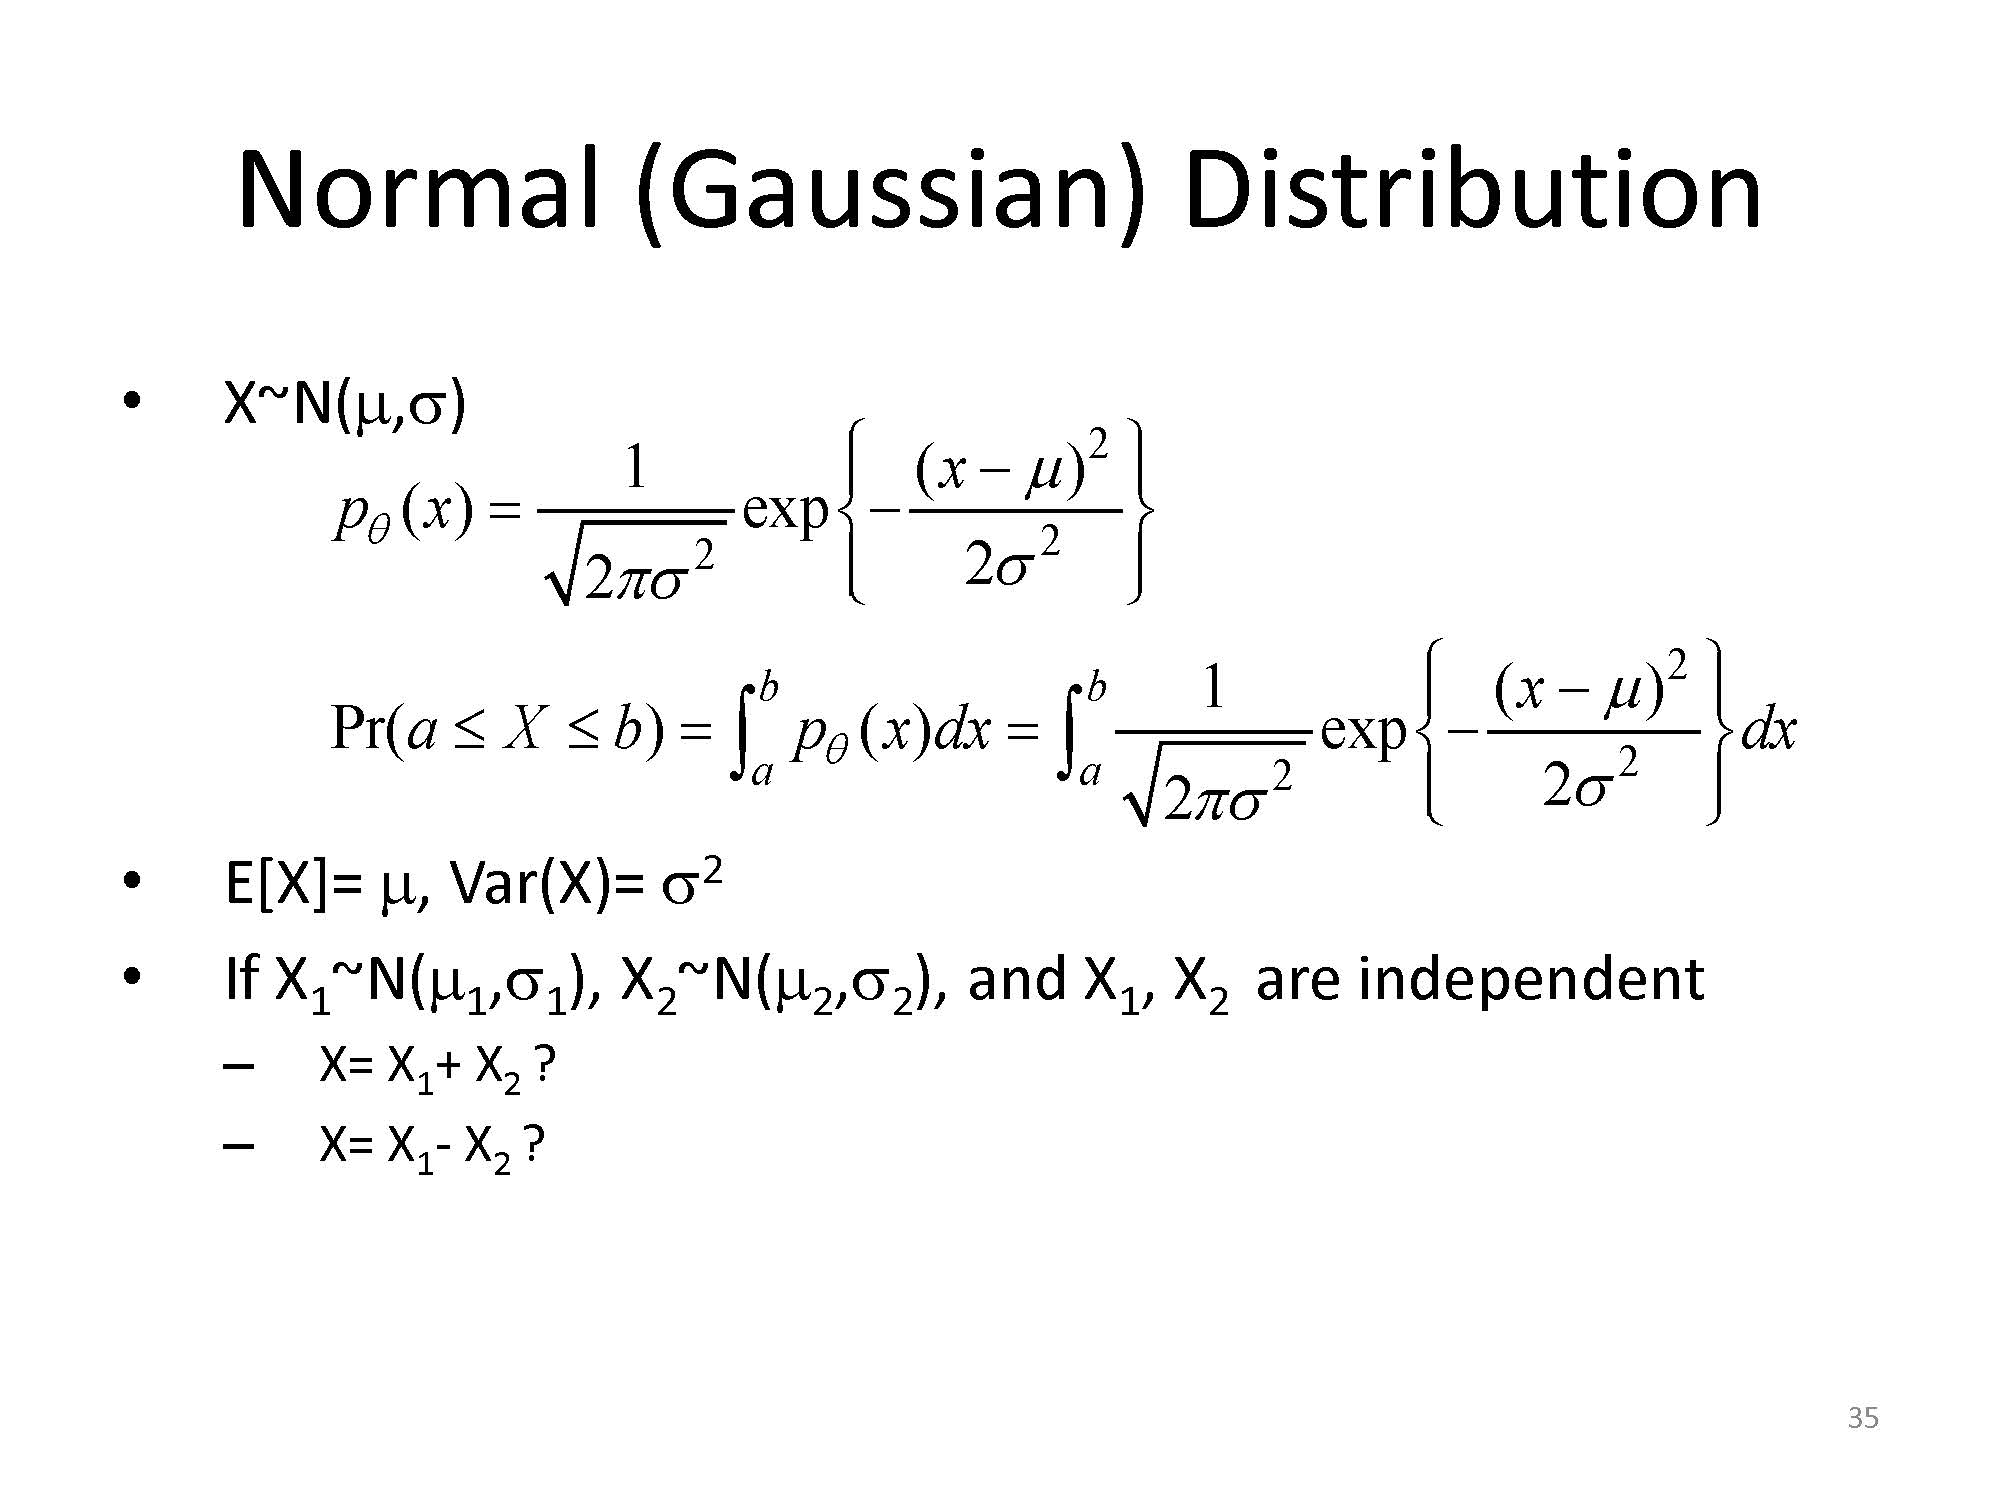

[Text(0.5, 0, 'Normal'), Text(0, 0.5, 'Probability')]

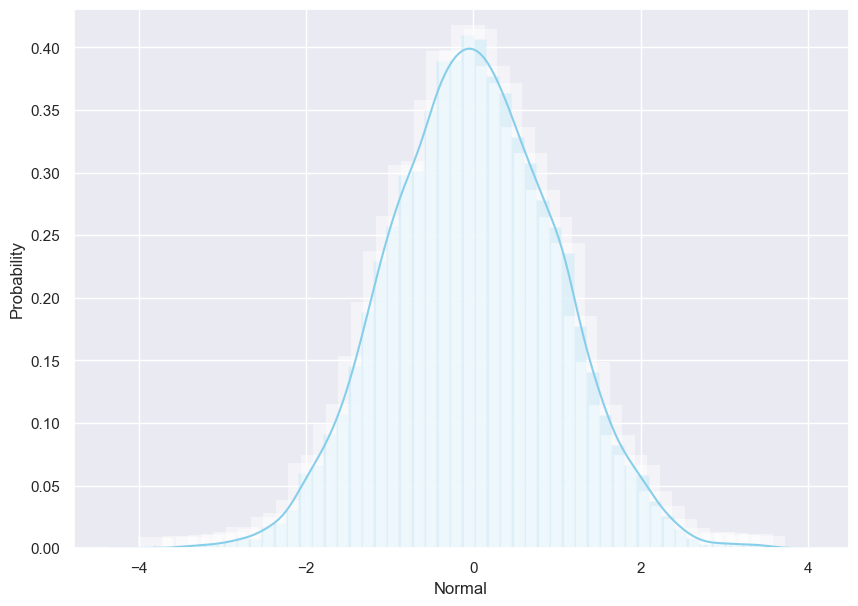

In [21]:
from scipy.stats import norm
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal,
                  bins=50,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0.5})
ax.set(xlabel='Normal', ylabel='Probability')

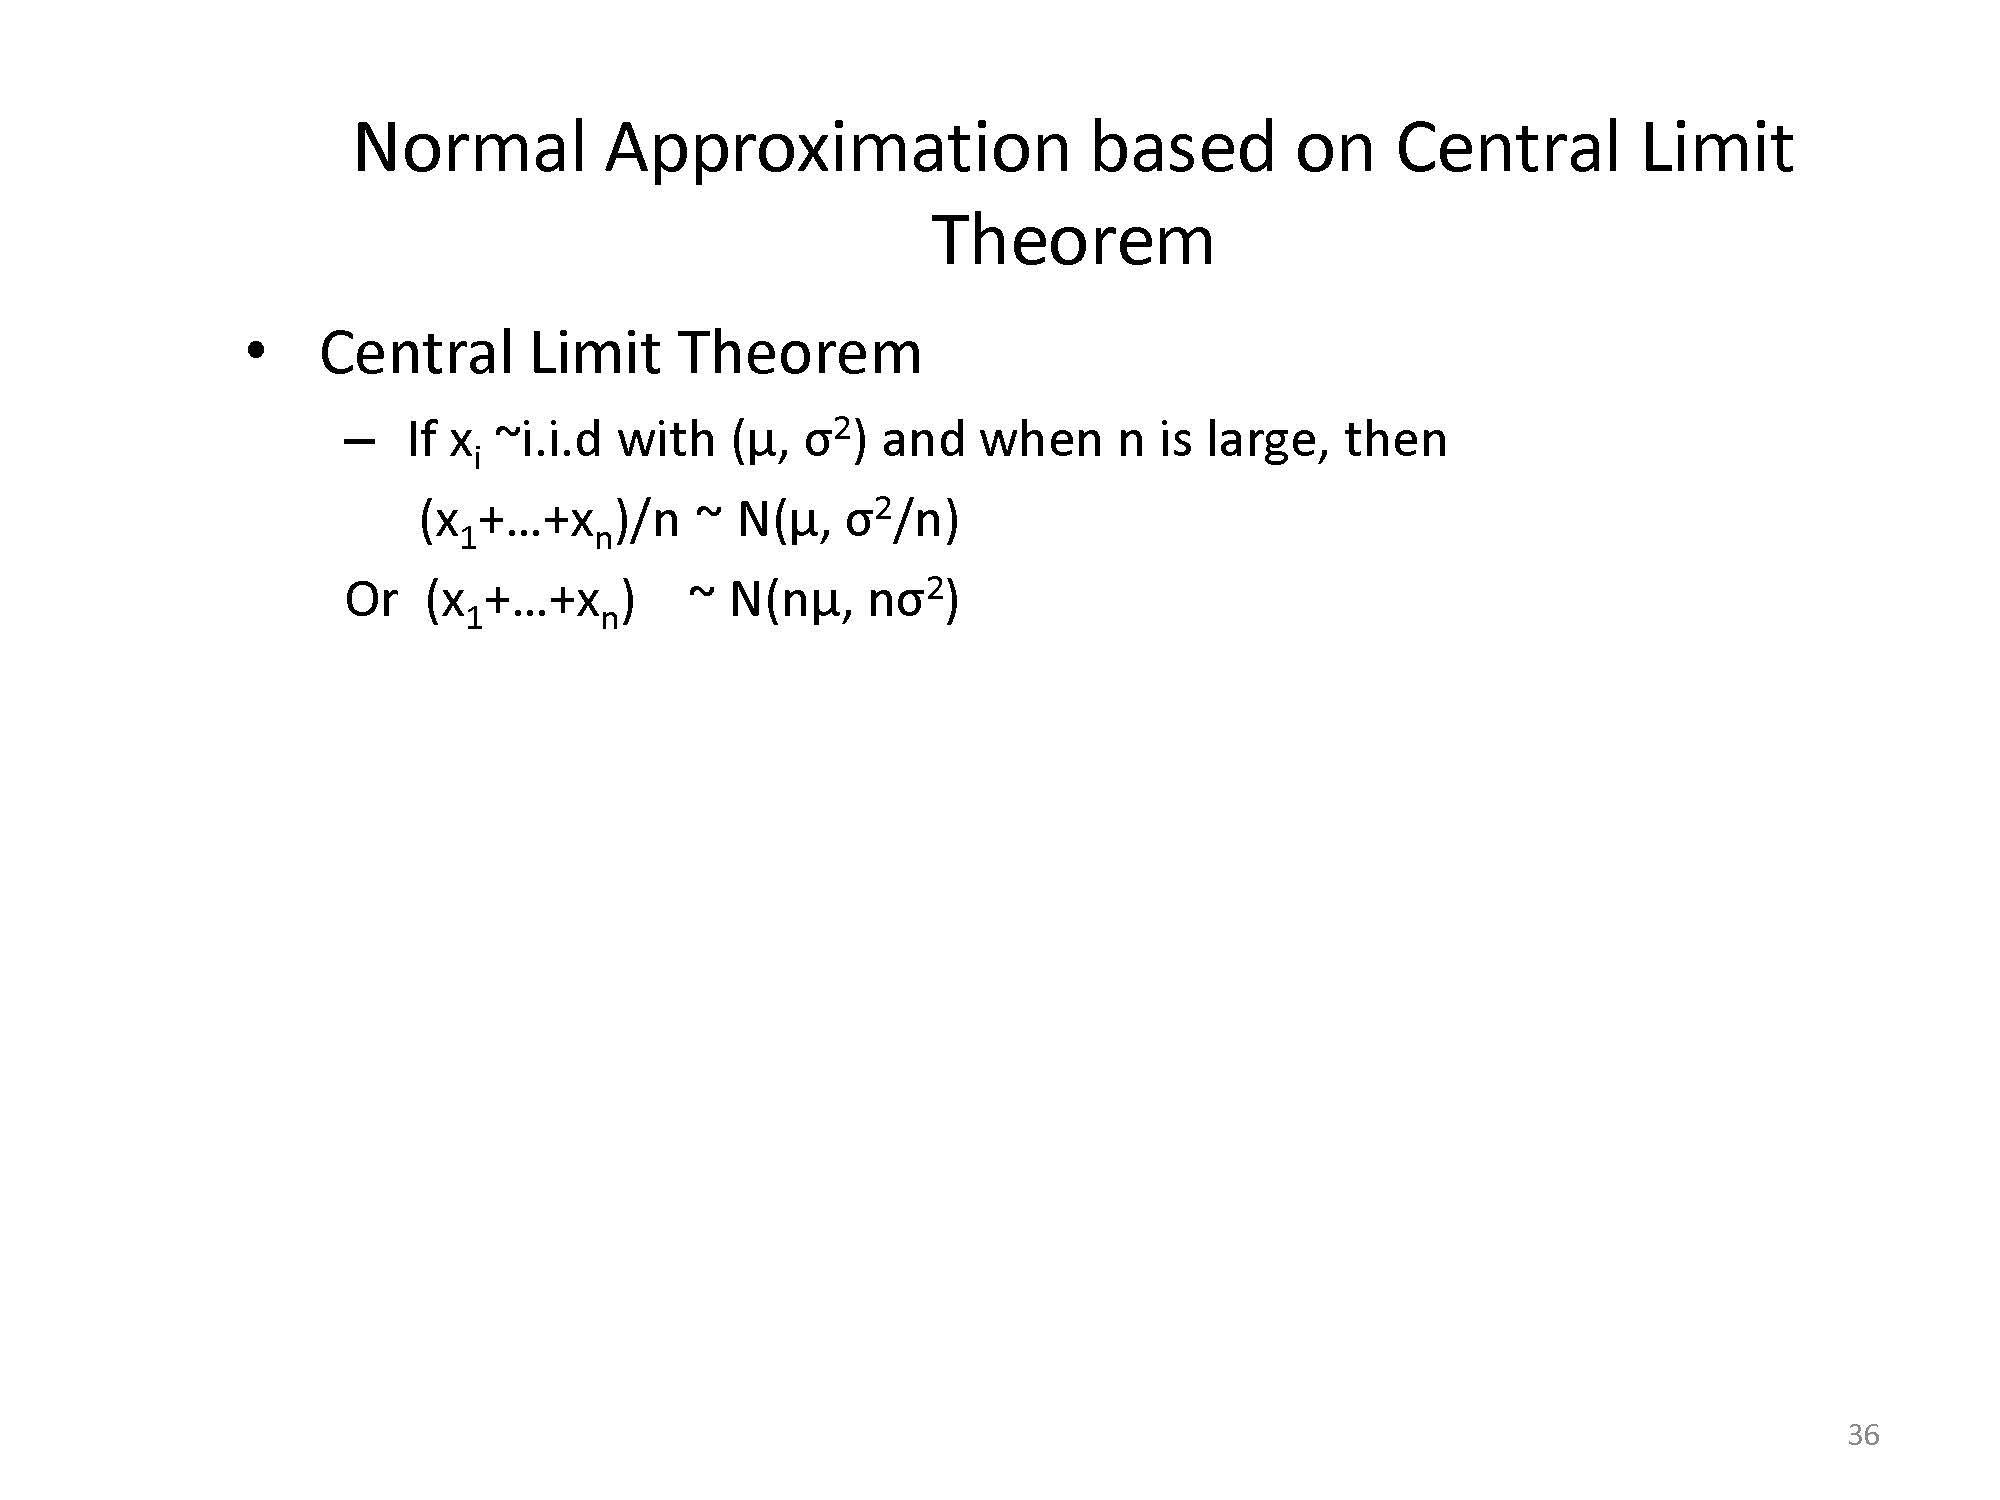
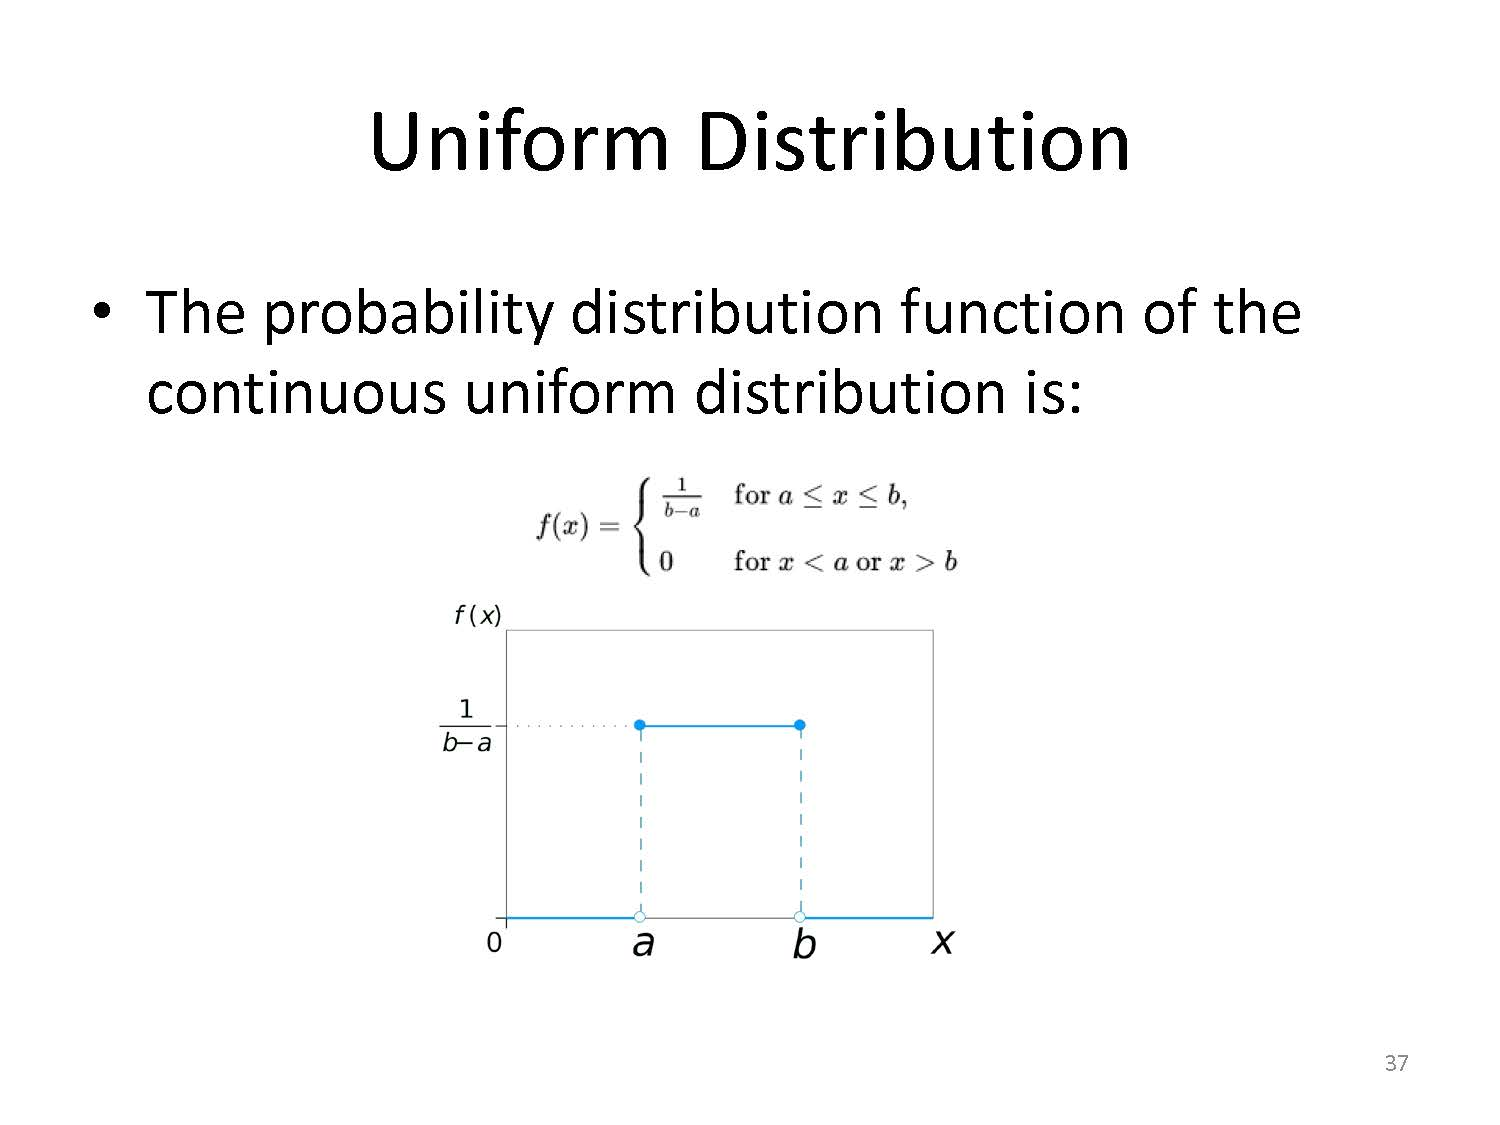

[Text(0.5, 0, 'Uniform '), Text(0, 0.5, 'Frequency')]

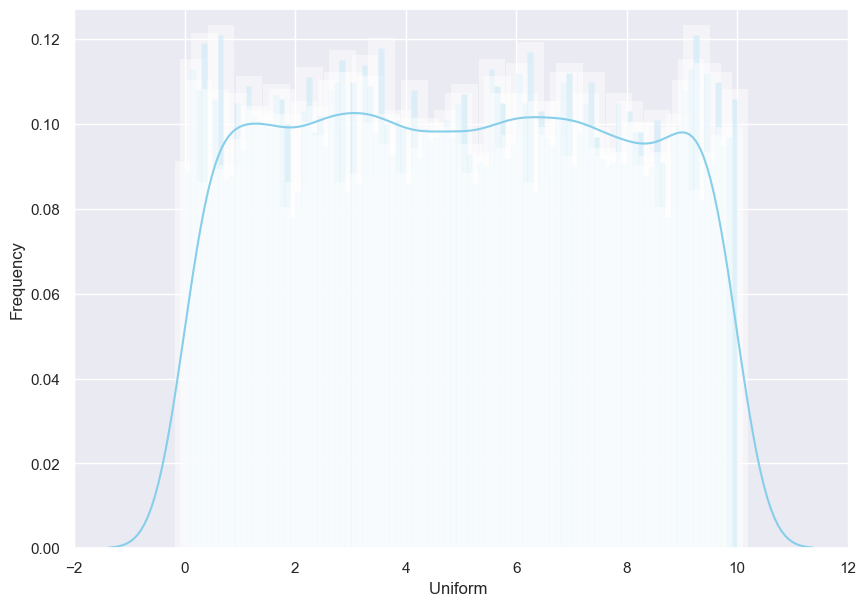

In [22]:
# import uniform distribution
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b) 
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0.5})
ax.set(xlabel='Uniform ', ylabel='Frequency')

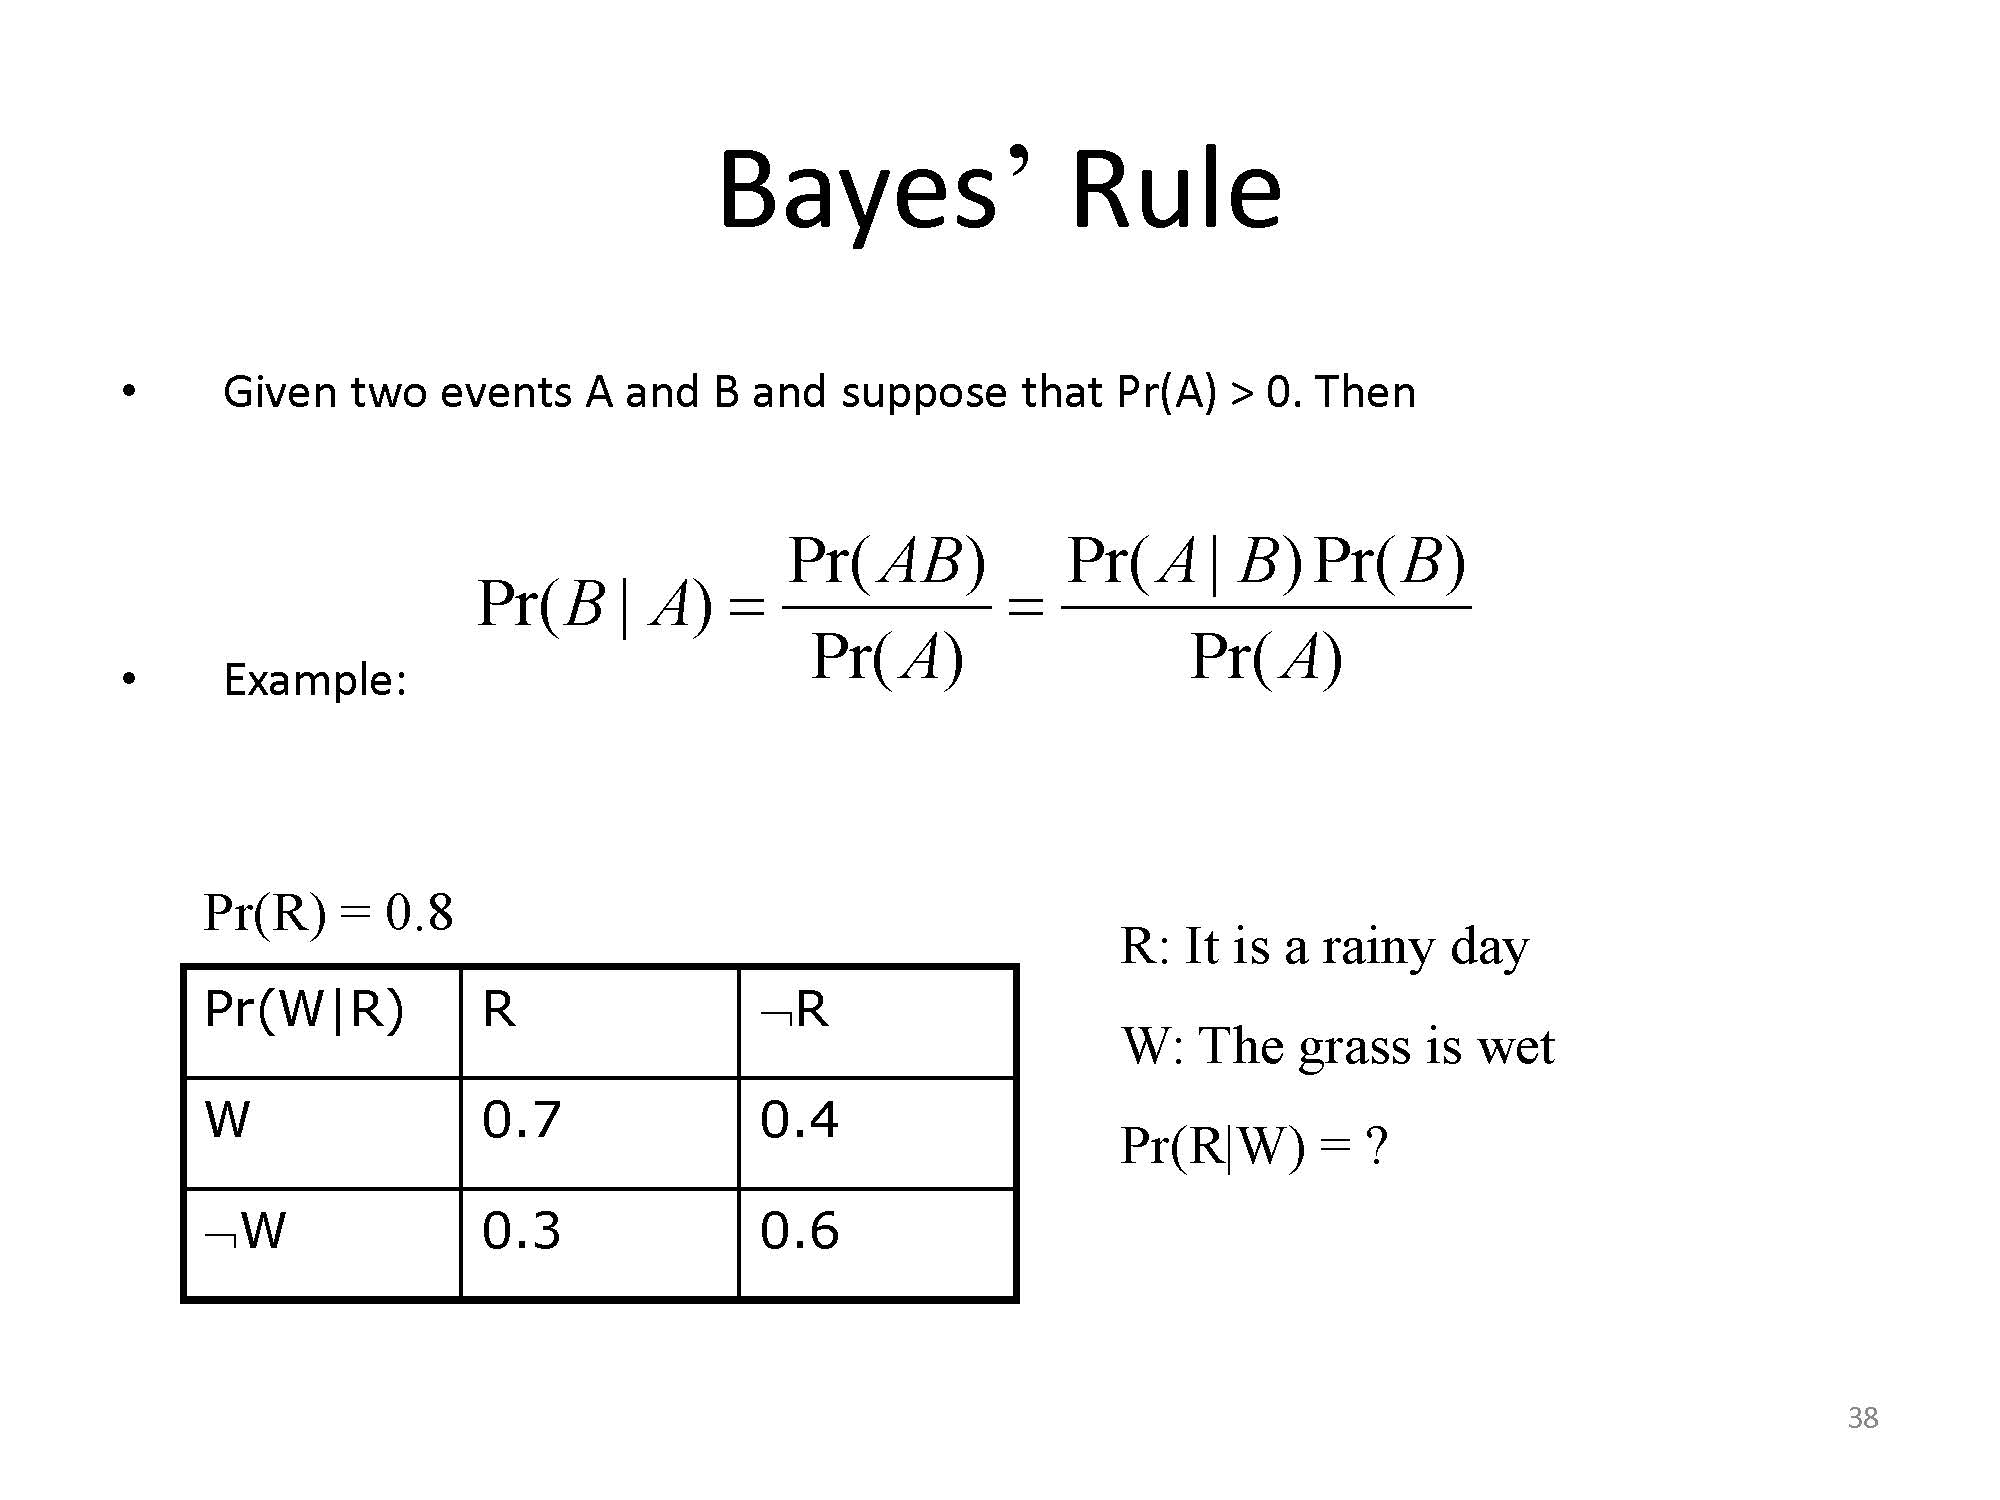
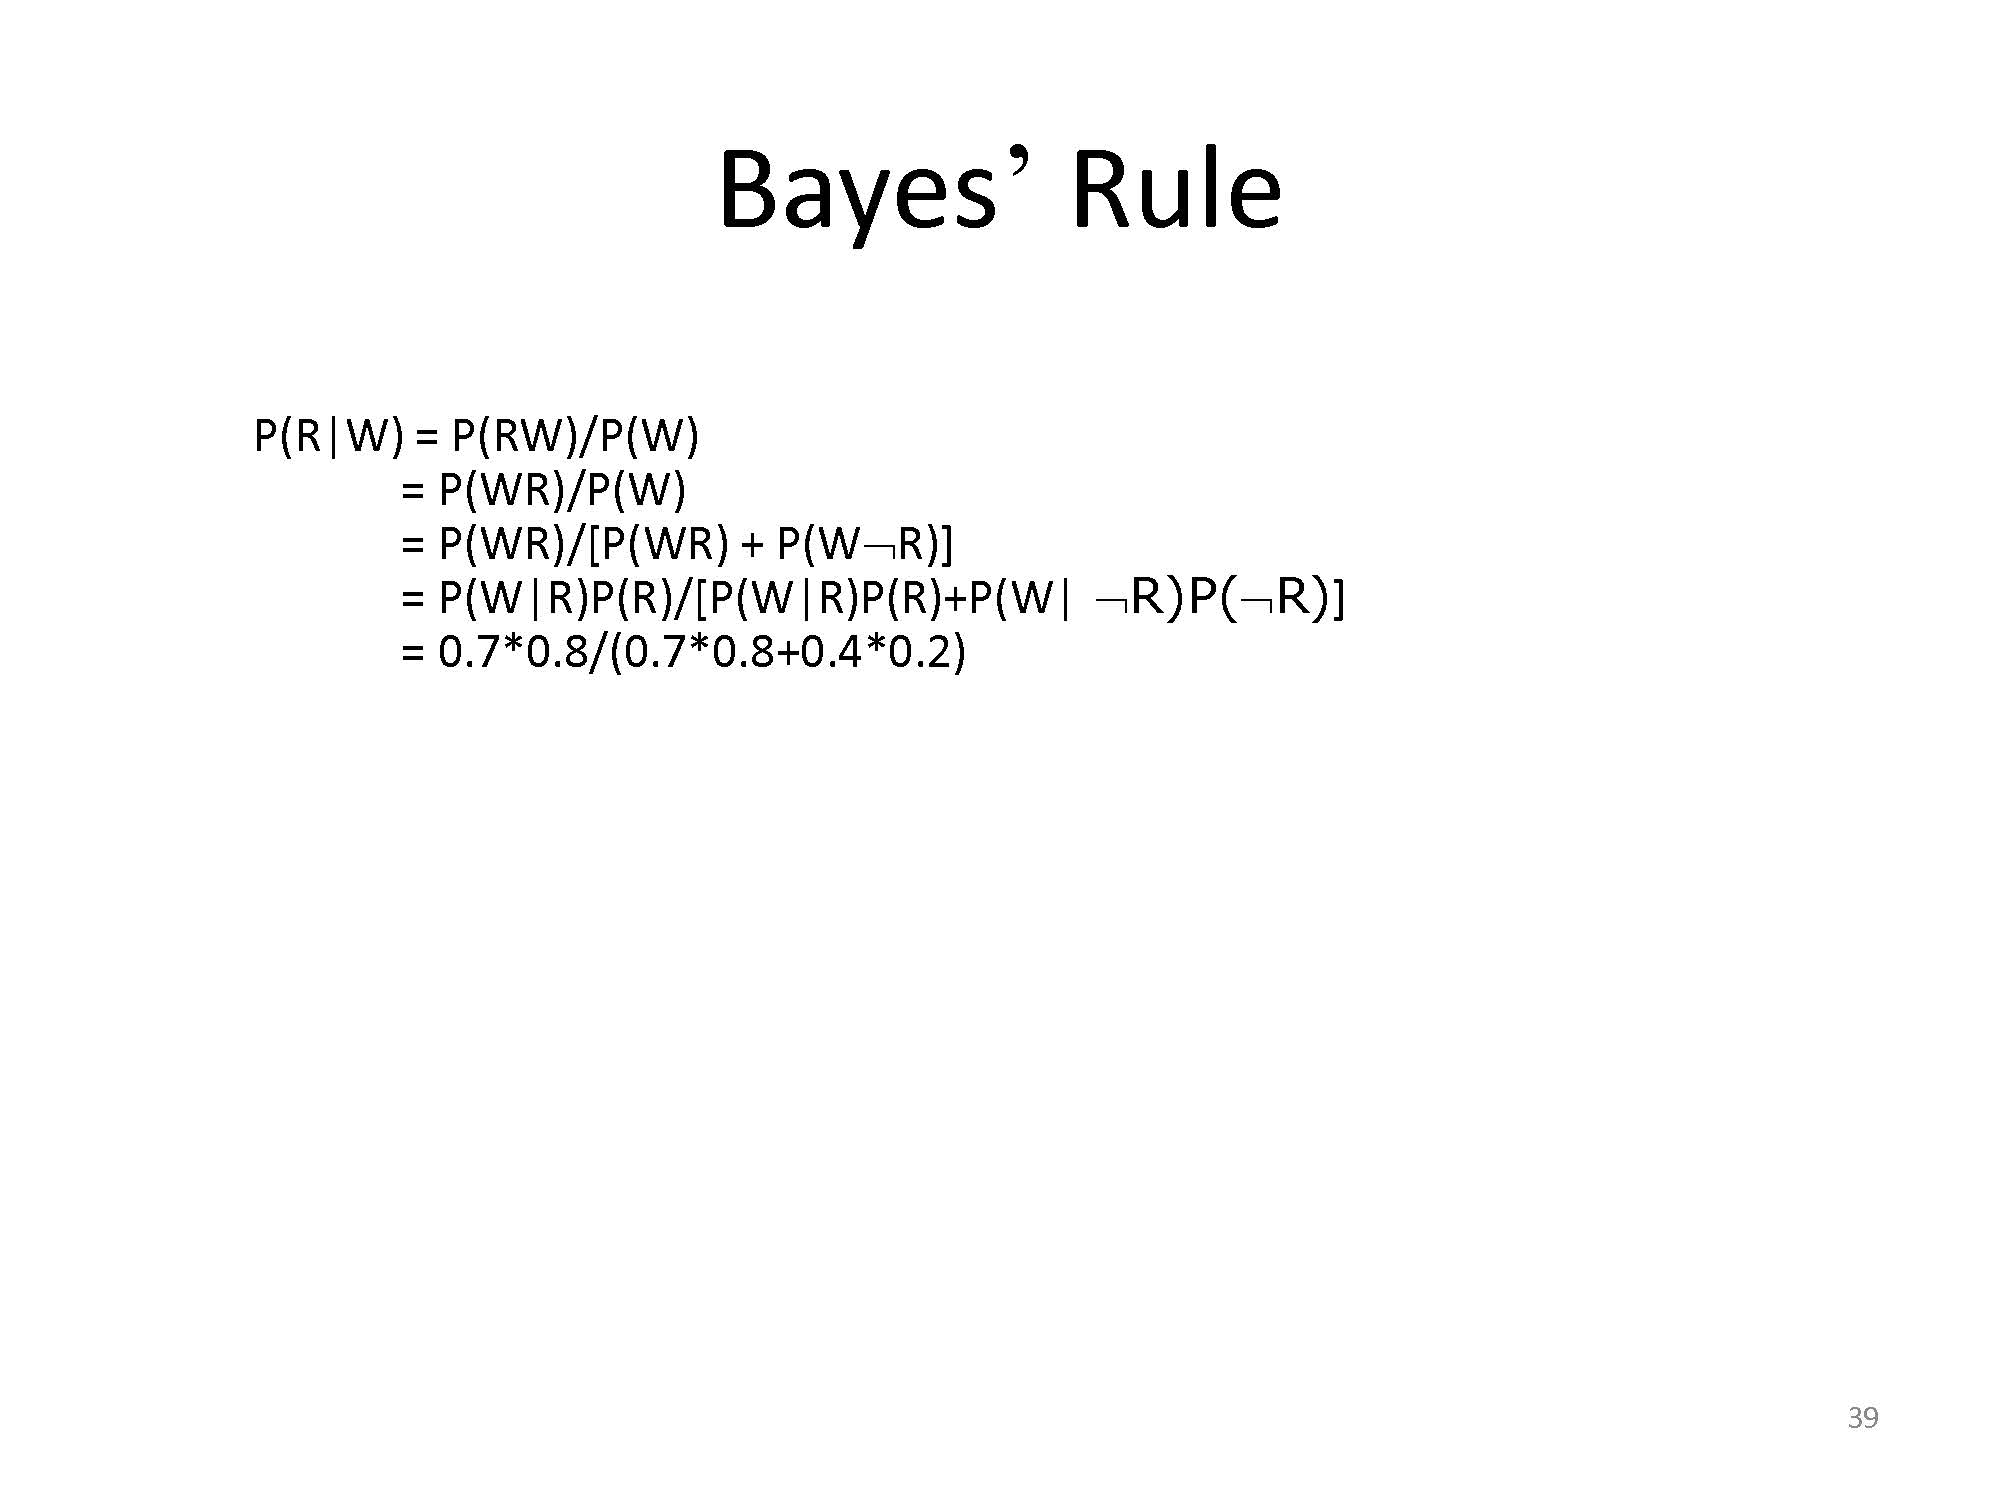

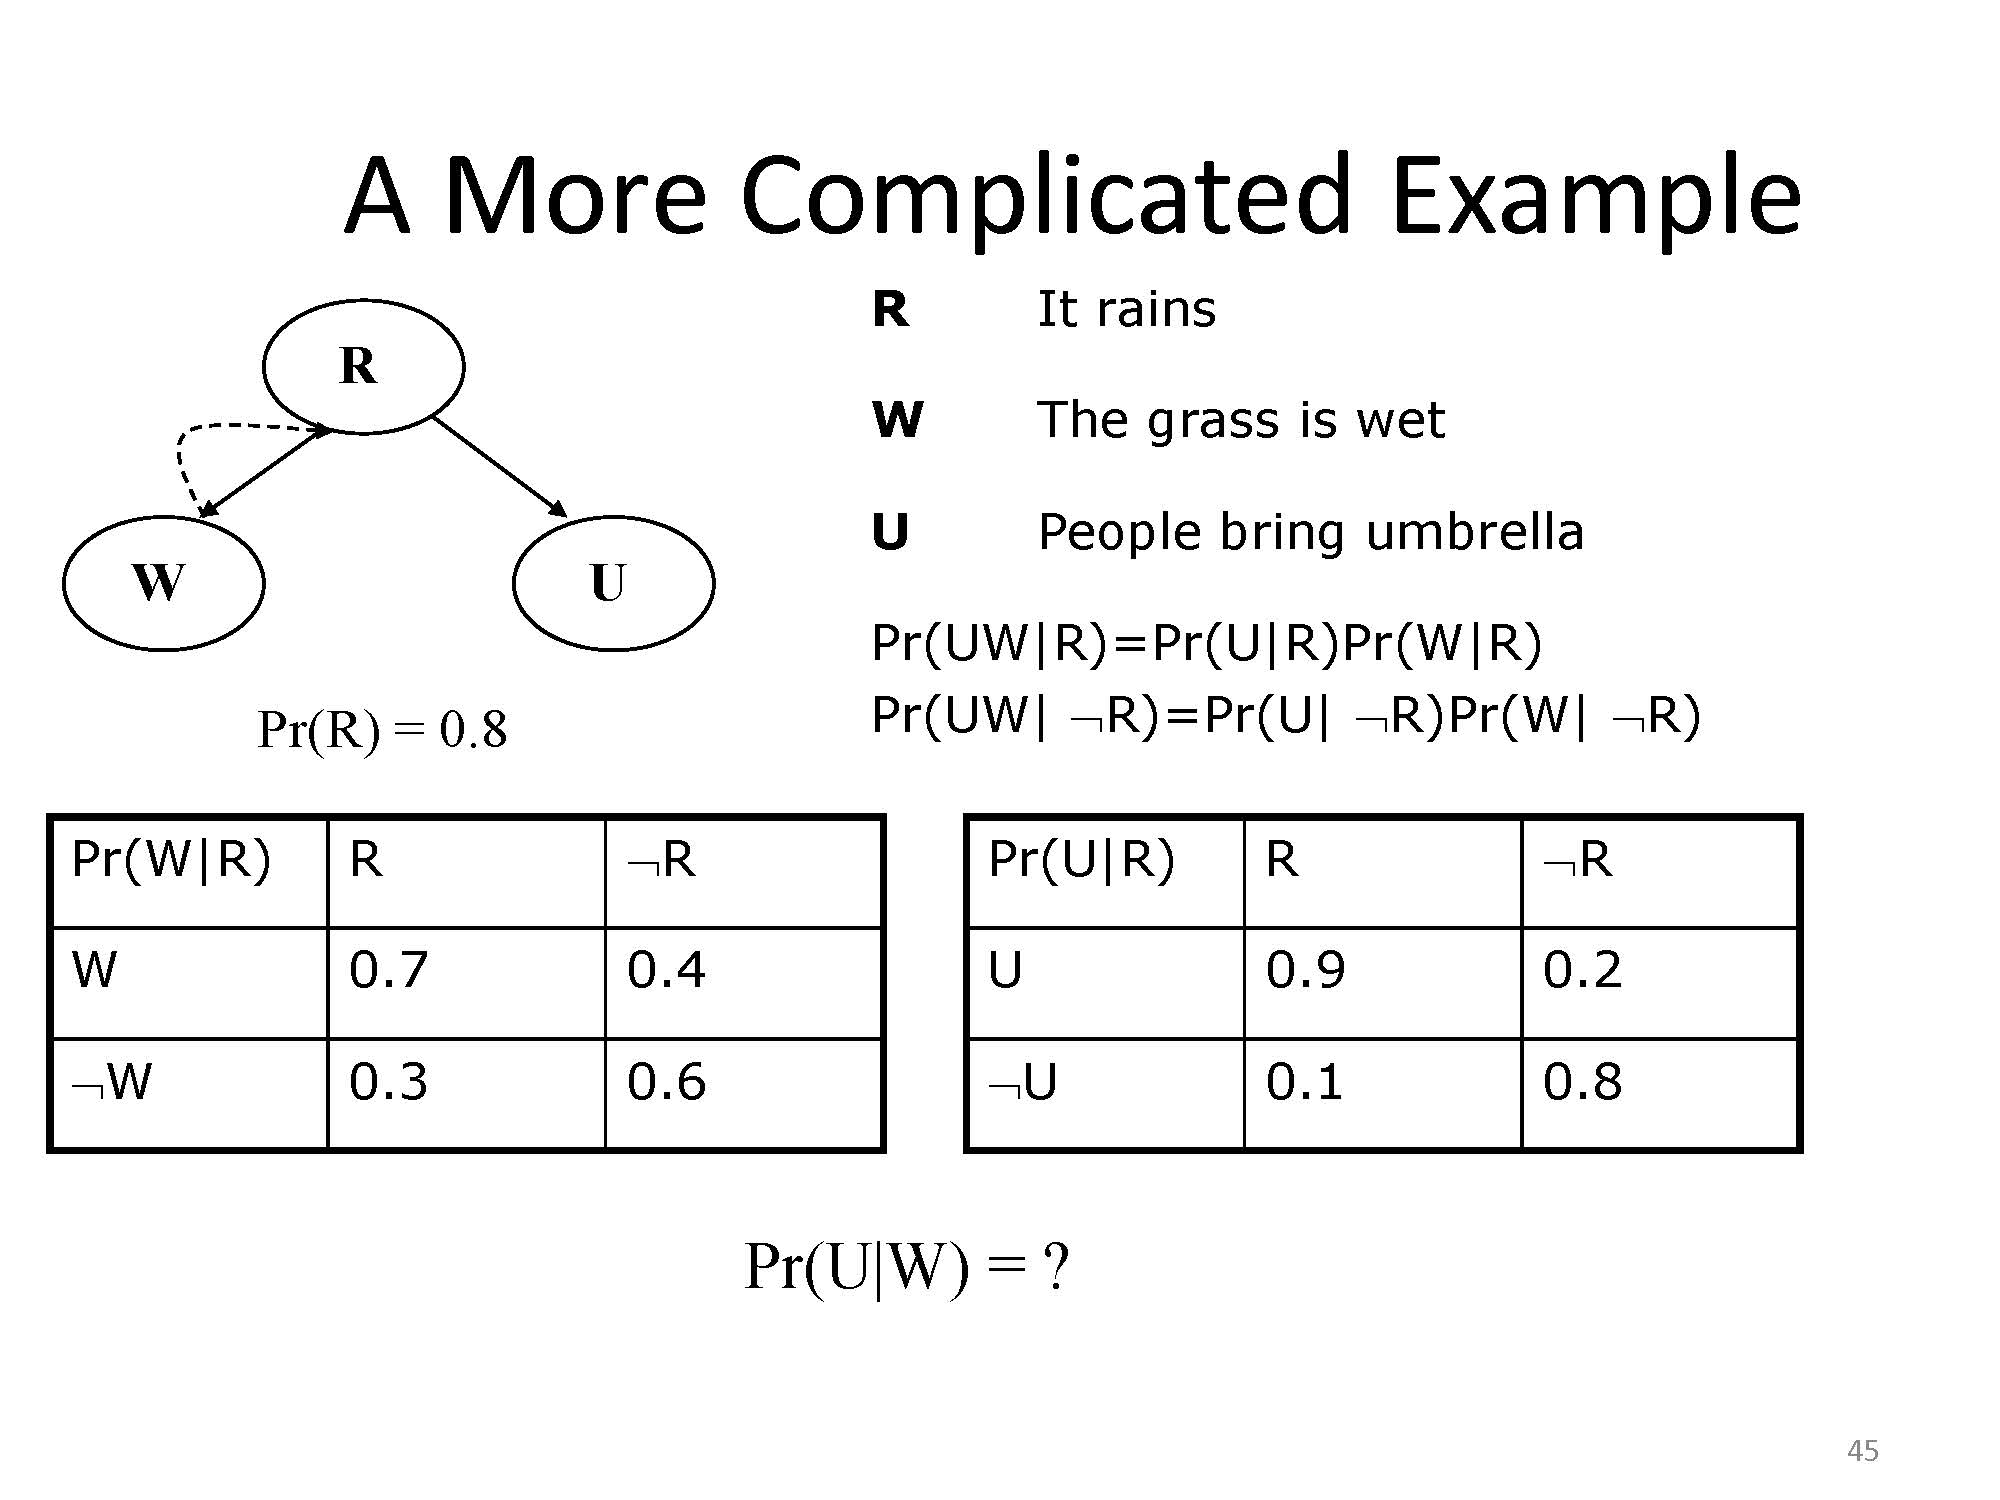
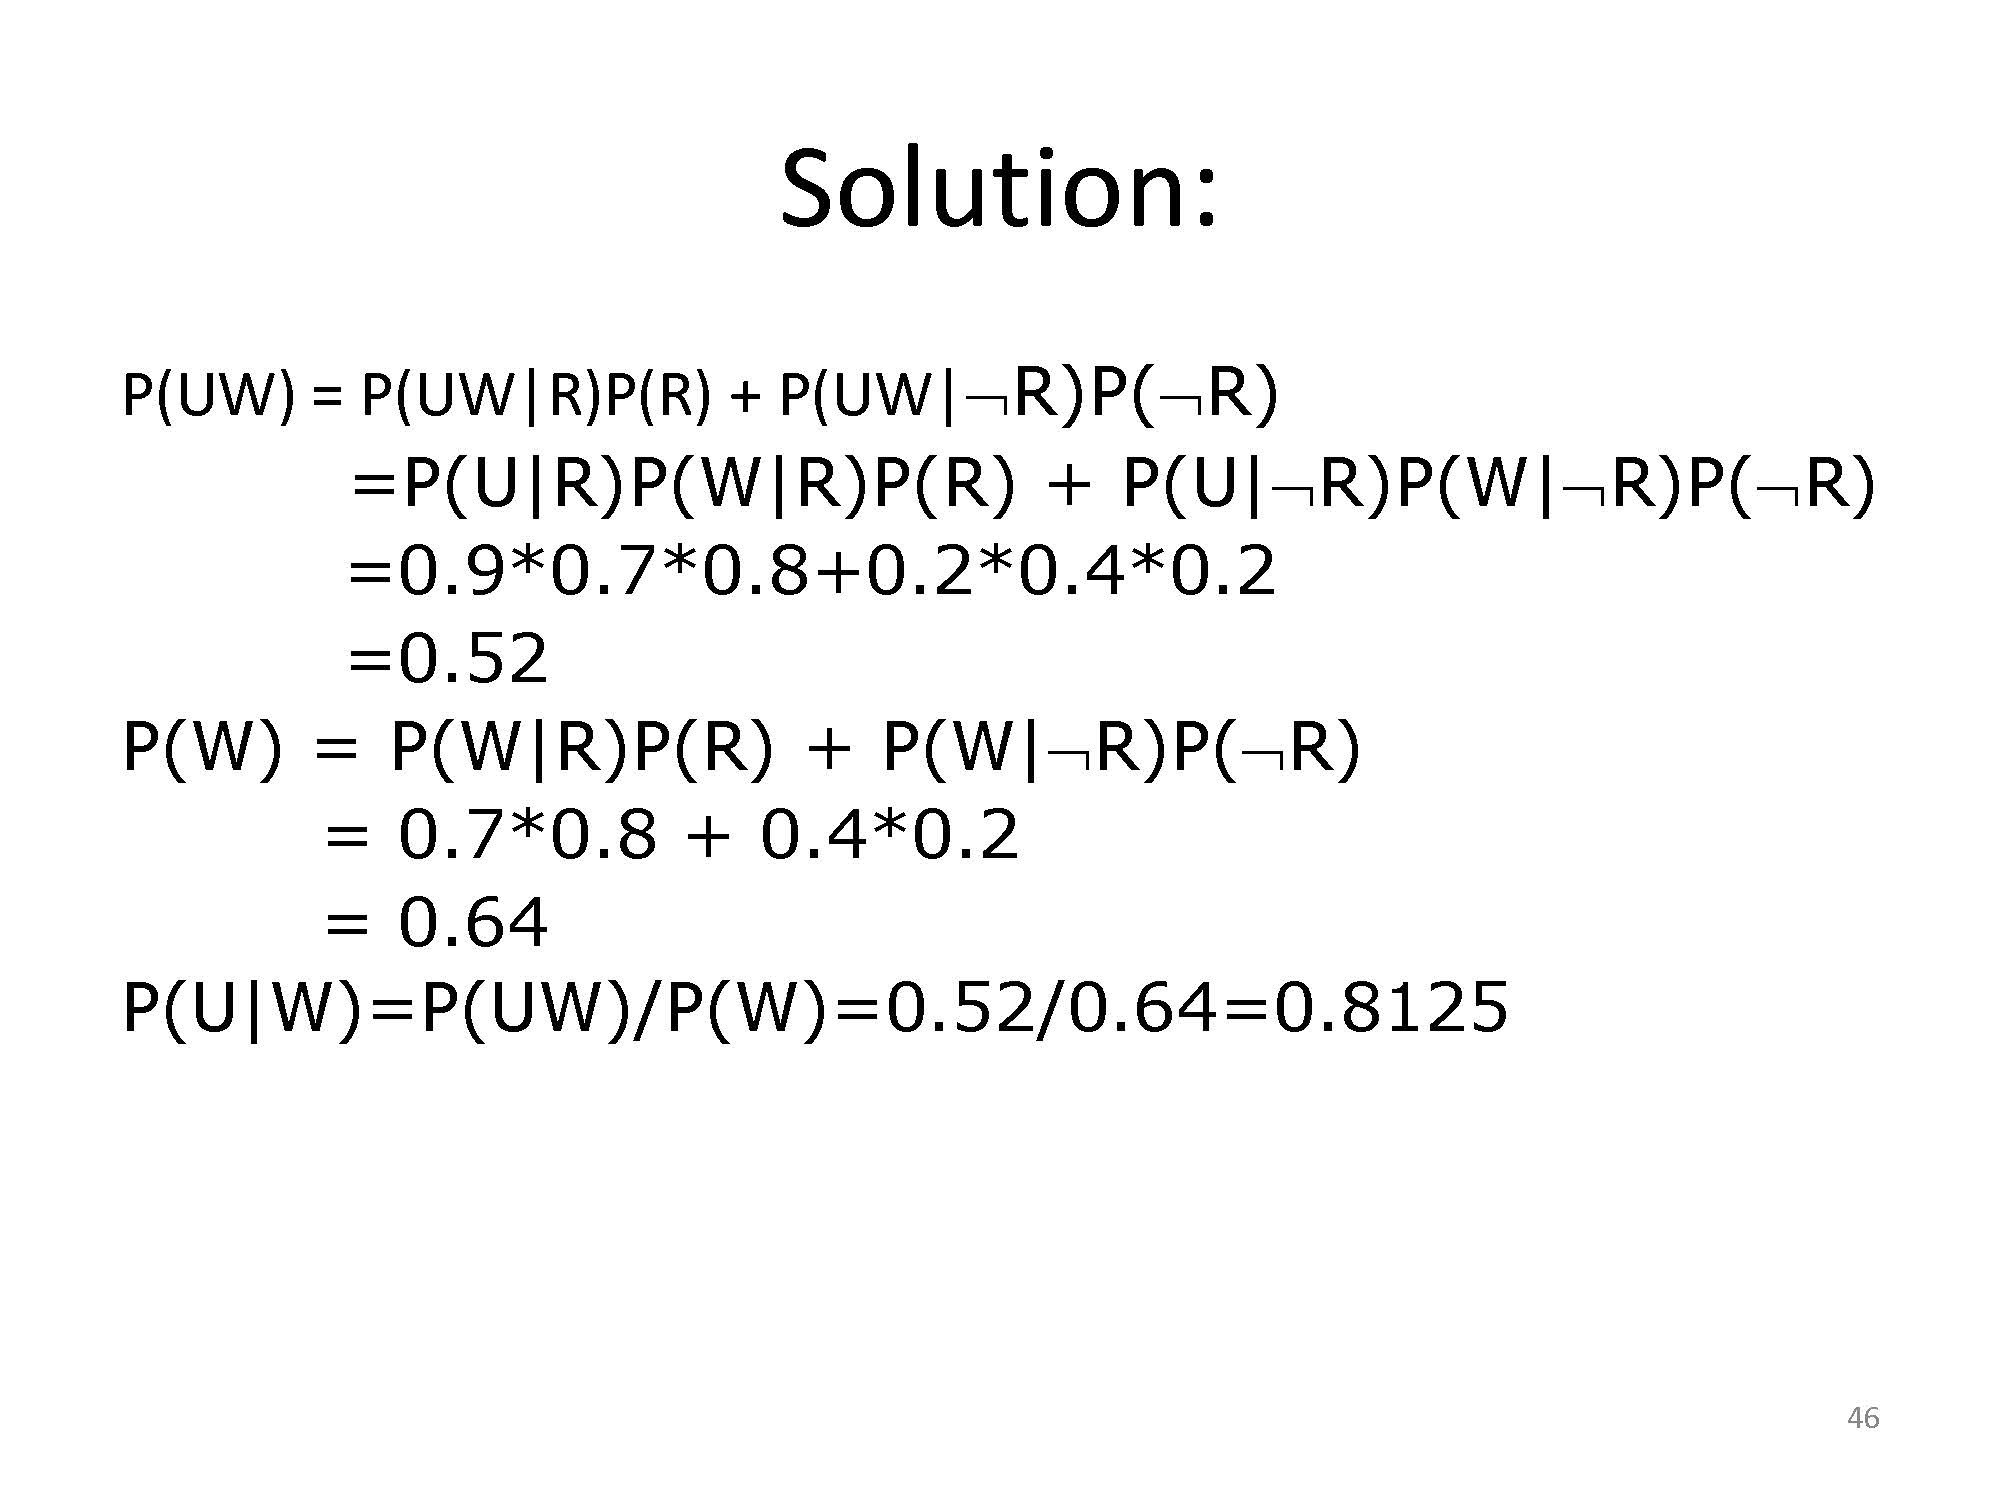

### Homework of today: 


#### Problem 1, Job Search

You are spamming resumes to apply jobs. Each resume you send out has 1% chance of getting a job offer. You have sent 100 resumes. What's your chance to get at least one job offer?

1. Please solve the problem by math. Use python mathematical expression to get the result.

2. Analytic solution. Use pmf function to solve the problem.

3. Answer by simulation. Use rvs function to simulate the process and estimate the answer.

4. How many resumes in total do you have to spam so that you will have 90% chance to get at least one job offer?

#### Problem 2, President Election Polls

Half of the population supports the president (i.e., p=0.5). For a random sample of size 1000, what is the probability of having ≥550 in support of the president?

1. Use binomial distribution

2. Use normal distribution as approximation.